In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [57]:
df = pd.read_csv('Churn_Modelling.csv')

In [285]:
df.Churn.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [9]:
# Look for categorical data
df.info()
# surname, geography, gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Will a customer churn?
0. COLUMNS TO KEEP/USE
1. credit score
2. geography
3. gender
4. age
5. tenure
6. balance
7. num of products
8. has credit card
9. active
10. estimateed salary
11. churn

# Data Preparation & Manipulation

In [5]:
# take a look at dataset
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Clean columns ,rename exited
df.columns = df.columns.str.strip('')
df.rename(columns={'Exited': 'Churn'}, inplace =True)

In [143]:
# Remove null values if any
df.isna().sum()
df.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [59]:
# Turn HasCrCard and IsActiveMember into a category
replace_bool_cols = ['HasCrCard', 'IsActiveMember']
for i in replace_bool_cols:
    df[i] = df[i].replace({1:'Yes', 0:'No'})

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,Yes,No,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,No,Yes,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,1


In [60]:
df.NumOfProducts = df.NumOfProducts.replace({1:'One', 2:'Two', 3:'Three', 4:'Four'})

In [73]:
df.head(5)

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,42,0.00,One,Yes,Yes,101348.88,1,Tenure 0-2 Years,Bad
1,Spain,Female,41,83807.86,One,No,Yes,112542.58,0,Tenure 0-2 Years,Bad
2,France,Female,42,159660.80,Three,Yes,No,113931.57,1,Tenure 7+ Years,Bad
3,France,Female,39,0.00,Two,No,No,93826.63,0,Tenure 0-2 Years,Good
4,Spain,Female,43,125510.82,One,Yes,Yes,79084.10,0,Tenure 0-2 Years,Excellent


In [153]:
# Check to see to change tenure to category or not
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [19]:
# Seperate churn and non churn customers
churn_df = df.query('Churn == "Yes"')
not_churn_df = df.query('Churn == "No"')

In [53]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [61]:
# Categorize tenure
def tenure_cat(df):
    if df.Tenure <= 2:
        return 'Tenure 0-2 Years'
    elif (df.Tenure > 2) & (df.Tenure <= 4):
        return 'Tenure 3-4 Years'
    elif (df.Tenure > 4) & (df.Tenure <= 6):
        return 'Tenure 5-6 Years'
    elif df.Tenure >7:
        return 'Tenure 7+ Years'
df['TenureGroup'] = df.apply(lambda df: tenure_cat(df), axis=1)

In [11]:
# Drop Non needed columns
df.drop(['RowNumber', 'Surname', 'CustomerId', 'Tenure'], axis=1, inplace=True)

In [117]:
df.drop(['Tenure'], axis=1, inplace=True)

In [12]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup
0,619,France,Female,42,0.00,One,Yes,Yes,101348.88,1,Tenure 0-2 Years
1,608,Spain,Female,41,83807.86,One,No,Yes,112542.58,0,Tenure 0-2 Years
2,502,France,Female,42,159660.80,Three,Yes,No,113931.57,1,Tenure 7+ Years
3,699,France,Female,39,0.00,Two,No,No,93826.63,0,Tenure 0-2 Years
4,850,Spain,Female,43,125510.82,One,Yes,Yes,79084.10,0,Tenure 0-2 Years
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,Two,Yes,No,96270.64,0,Tenure 5-6 Years
9996,516,France,Male,35,57369.61,One,Yes,Yes,101699.77,0,Tenure 7+ Years
9997,709,France,Female,36,0.00,One,No,Yes,42085.58,1,None
9998,772,Germany,Male,42,75075.31,Two,Yes,No,92888.52,1,Tenure 3-4 Years


In [62]:
# Categorize Credit Score L, M, High, Amazing
def credit_cat(df):
    if df.CreditScore <= 629:
        return 'Bad'
    elif (df.CreditScore > 630) & (df.CreditScore <= 689):
        return 'Fair'
    elif (df.CreditScore > 690) & (df.CreditScore <= 719):
        return 'Good'
    elif df.CreditScore > 720:
        return 'Excellent'
df['CreditScoreGroup'] = df.apply(lambda df: credit_cat(df), axis=1)

In [14]:
#df.drop(['CreditScore'], axis=1, inplace=True)

In [63]:
df.drop(['RowNumber', 'Surname', 'CustomerId', 'Tenure', 'CreditScore'], axis=1, inplace=True)

In [64]:
# Making a list of categorical and numerical columns
target = ['Churn']
cat_columns = df.nunique()[df.nunique() < 5].keys().tolist()
cat_columns = [i for i in cat_columns if i not in target]
num_columns = [i for i in df.columns if i not in cat_columns + target]

In [65]:
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,42,0.00,One,Yes,Yes,101348.88,1,Tenure 0-2 Years,Bad
1,Spain,Female,41,83807.86,One,No,Yes,112542.58,0,Tenure 0-2 Years,Bad
2,France,Female,42,159660.80,Three,Yes,No,113931.57,1,Tenure 7+ Years,Bad
3,France,Female,39,0.00,Two,No,No,93826.63,0,Tenure 0-2 Years,Good
4,Spain,Female,43,125510.82,One,Yes,Yes,79084.10,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,0.00,Two,Yes,No,96270.64,0,Tenure 5-6 Years,Excellent
9996,France,Male,35,57369.61,One,Yes,Yes,101699.77,0,Tenure 7+ Years,Bad
9997,France,Female,36,0.00,One,No,Yes,42085.58,1,None,Good
9998,Germany,Male,42,75075.31,Two,Yes,No,92888.52,1,Tenure 3-4 Years,Excellent


In [20]:
# Take a look at the data, outliers, max, min, avg for variables
df.describe().applymap(round)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
mean,651,39,5,76486,2,1,1,100090,0
std,97,10,3,62397,1,0,0,57510,0
min,350,18,0,0,1,0,0,12,0
25%,584,32,3,0,1,0,0,51002,0
50%,652,37,5,97199,1,1,1,100194,0
75%,718,44,7,127644,2,1,1,149388,0
max,850,92,10,250898,4,1,1,199992,1


# Exploratory Analysis

In [117]:
# Plot sum of churn and not churn in dataset

/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


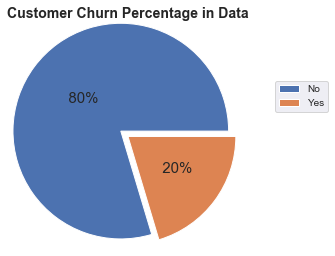

In [176]:
churn_pie = plt.pie(df.Churn.value_counts(), startangle=0, autopct='%5.0f%%', pctdistance=0.5, radius=1.2, explode=(0.1,0.0))
labels=df.Churn.unique()
plt.title('Customer Churn Percentage in Data', weight='bold', size=14)
plt.legend(churn_pie,labels = ['No', 'Yes'], bbox_to_anchor=(0.9,0.7), fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.rcParams.update({'font.size': 15})
plt.show()
plt.savefig('CustomerChurnPercentage', dpi=600)

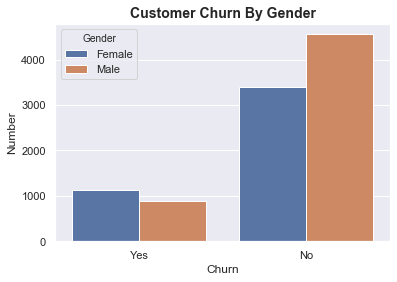

In [41]:
# Gender based on Churn
plt.title('Customer Churn By Gender', weight='bold', size=14)
ax = sns.countplot(x="Churn",hue='Gender',data=df)
ax.set(xlabel='Churn', ylabel='Number')
plt.show()

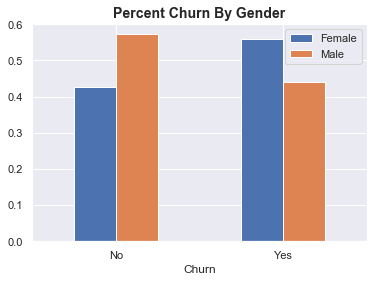

In [180]:
pd.crosstab(df.Churn,df.Gender, normalize='index').plot.bar(rot=0)
plt.title('Percent Churn By Gender', weight='bold', size=14)
plt.legend(loc='best')
plt.show()

In [108]:
def mean_churn_by_cat(ColumnName):
    pd.crosstab(df.Churn,df[i], normalize='index').plot.bar(rot=0)
    plt.title(f'Percent Churn By {i}', weight='bold', size=14)
    plt.legend(loc='best')
    return plt.show()

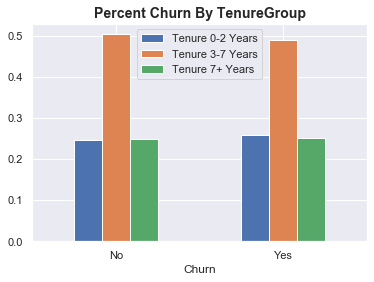

In [182]:
mean_churn_by_cat('IsActiveMember')

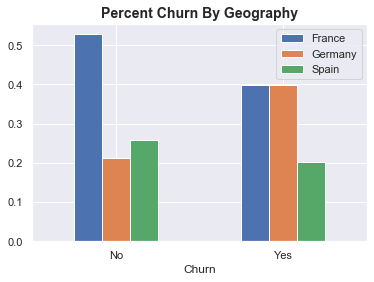

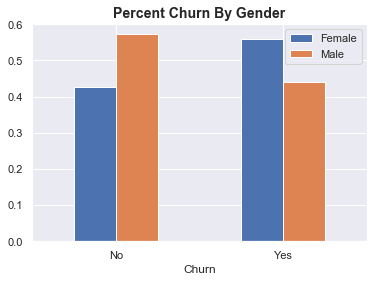

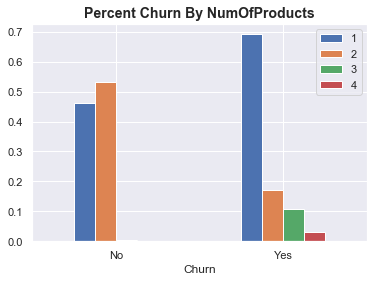

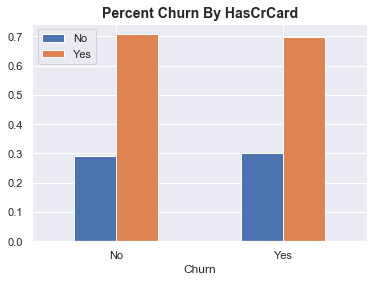

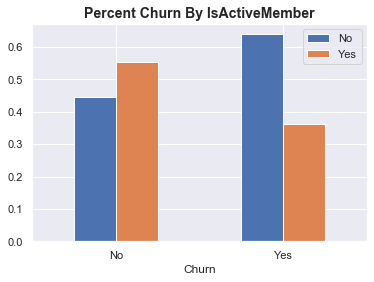

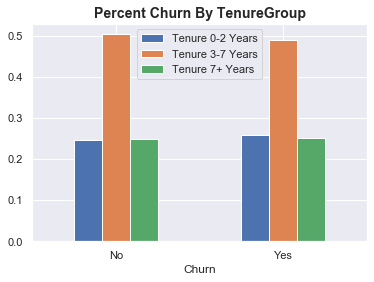

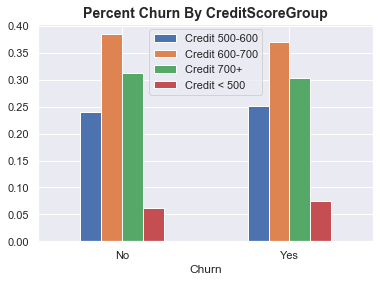

In [183]:
for i in cat_columns:
    mean_churn_by_cat(i)

In [40]:
df.query('NumOfProducts > 2')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
2,-1.536794,France,Female,0.324324,1.032908,0.636357,3,1,0,0.569654,1
7,-2.840488,Germany,Female,0.148649,-0.350204,0.458540,4,1,0,0.596733,1
30,-0.615931,Spain,Female,0.283784,-0.695982,0.000000,3,1,0,0.702356,1
70,0.905045,Germany,Male,0.540541,-1.041760,0.533067,4,1,0,0.141825,1
88,-0.046858,France,Female,0.378378,-0.350204,0.000000,3,1,0,0.466244,1
...,...,...,...,...,...,...,...,...,...,...,...
9737,0.615335,Spain,Male,0.054054,1.032908,0.000000,3,1,0,0.536458,0
9747,-0.419342,Germany,Female,0.689189,-0.004426,0.342921,3,0,0,0.963749,1
9800,1.153368,Spain,Female,0.229730,-0.695982,0.475690,3,1,1,0.235535,1
9877,-1.505754,Germany,Female,0.202703,-0.695982,0.424502,3,1,0,0.227193,1


ValueError: could not convert string to float: 'One'

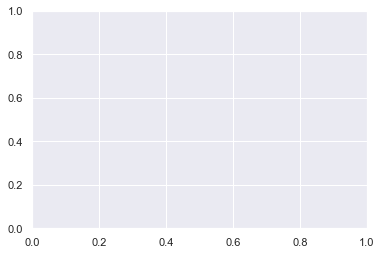

In [81]:
sns.distplot(df.NumOfProducts)

In [69]:
df.query('NumOfProducts > 2').NumOfProducts.value_counts()


3    266
4     60
Name: NumOfProducts, dtype: int64

In [49]:
def churn_by_cat(ColumnName):
        plt.title(f'Customer Churn By {ColumnName}', weight='bold', size=14)
        ax = sns.countplot(x="Churn",hue=f'{ColumnName}',data=df)
        ax.set(xlabel='Churn', ylabel='Number')
        return plt.show()

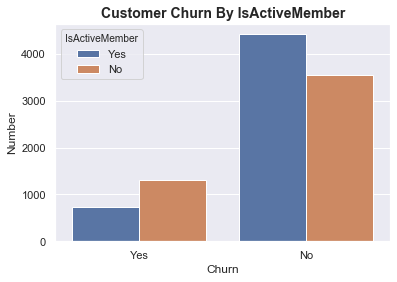

In [50]:
churn_by_cat('IsActiveMember')

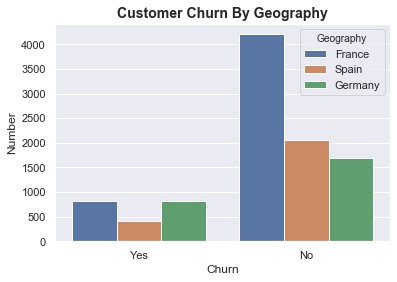

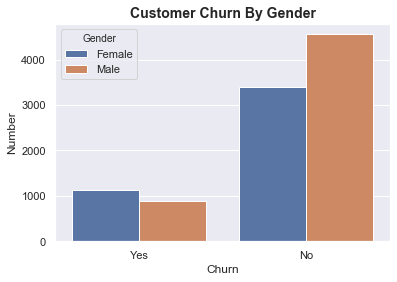

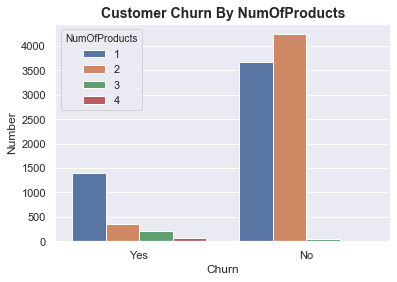

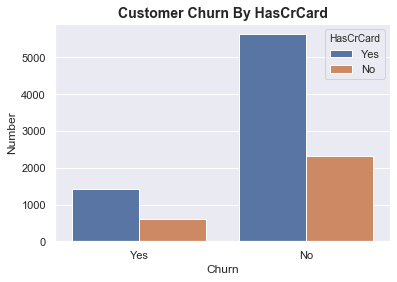

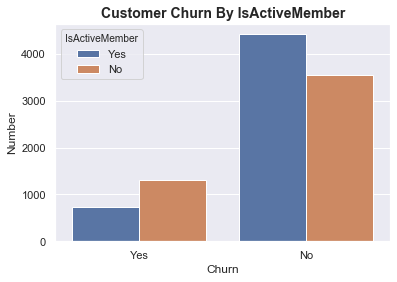

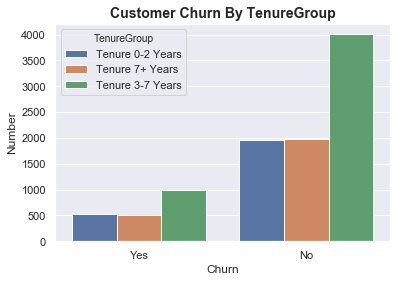

In [60]:
for i in cat_columns:
    plt.title(f'Customer Churn By {i}', weight='bold', size=14)
    ax = sns.countplot(x="Churn",hue=f'{i}',data=df)
    ax.set(xlabel='Churn', ylabel='Number')
    plt.show()

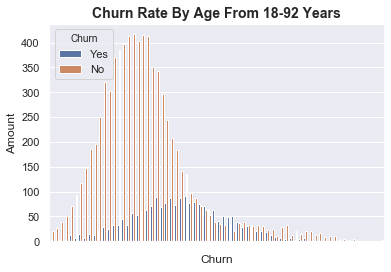

In [91]:
plt.title('Churn Rate By Age From 18-92 Years', weight='bold', size=14)
ax = sns.countplot(x="Age",hue='Churn',data=df)
ax.set(xlabel='Churn', ylabel='Amount')
ax.set(xticklabels=[])
plt.show()

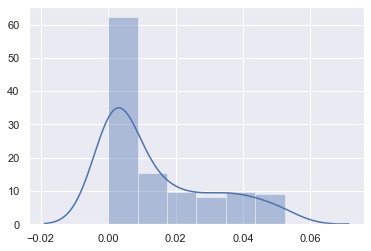

In [95]:
sns.distplot(pd.crosstab(df.Churn,df.Age, normalize='index'))

In [97]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Text(0.5, 1.0, 'Distribution of Age')

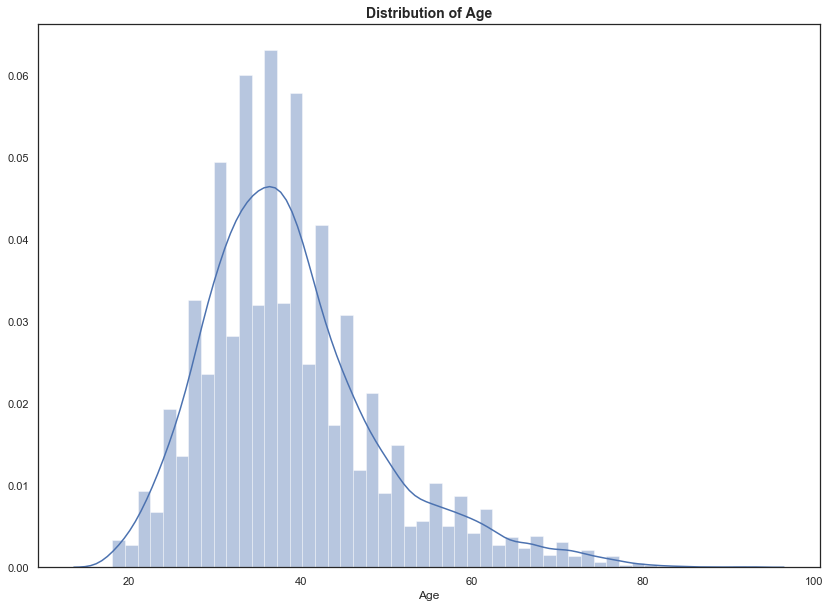

In [270]:
sns.distplot(df['Age'])
plt.title('Distribution of Age', weight='bold', size=14)
#sns.distplot(df['y'])

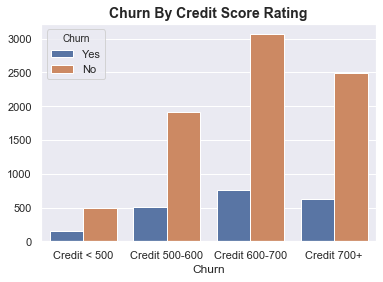

In [109]:
plt.title('Churn By Credit Score Rating', weight='bold', size=14)
ax = sns.countplot(x="CreditScoreGroup",hue='Churn',data=df, order=['Credit < 500',
                                                                   'Credit 500-600',
                                                                   'Credit 600-700',
                                                                   'Credit 700+'])
ax.set(xlabel='Churn', ylabel=None)
plt.show()

In [ ]:
plt.title('x', weight='bold', size=14)
ax = sns.countplot(x="Age",hue='Churn',data=df)
ax.set(xlabel='Churn', ylabel='Amount')
ax.set(xticklabels=[])
plt.show()

# Tenure

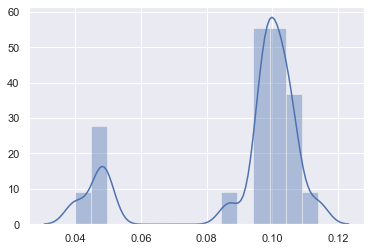

In [105]:
sns.distplot(pd.crosstab(df.Churn,df.Tenure, normalize='index'))

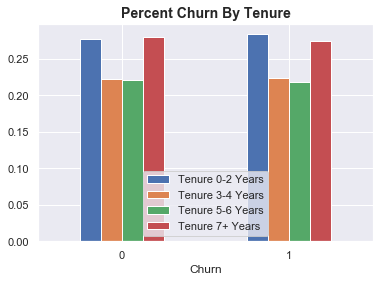

In [111]:
pd.crosstab(df.Churn,df.TenureGroup, normalize='index').plot.bar(rot=0)
plt.title('Percent Churn By Tenure', weight='bold', size=14)
plt.legend(loc='best')

In [112]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Tenure 0-2 Years
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Tenure 0-2 Years
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Tenure 7+ Years
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Tenure 0-2 Years
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Tenure 0-2 Years


# Data Normalization

# Credit Score

In [26]:
df.query('CreditScore < 350')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


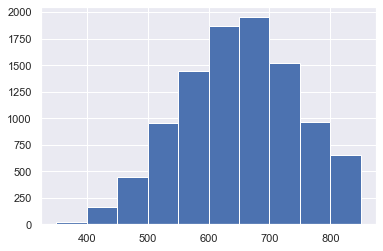

In [33]:
df.CreditScore.hist()

In [119]:
# Standardize
def standardize_CreditScore(df):
    scaler = StandardScaler()
    df = scaler.fit(df.values.reshape(-1, 1))
    return df
# Normalize 
def normalize_num_cols(df):
    scaler = StandardScaler()
    df = scaler.fit(df.values.reshape(-1, 1))
    return df

In [254]:
df.CreditScore

0      -0.326221
1      -0.440036
2      -1.536794
3       0.501521
4       2.063884
          ...   
9995    1.246488
9996   -1.391939
9997    0.604988
9998    1.256835
9999    1.463771
Name: CreditScore, Length: 10000, dtype: float64

In [120]:
scaler = StandardScaler()
scaler.fit(df.CreditScore.values.reshape(-1, 1))
df.CreditScore = scaler.fit_transform(df.CreditScore.values.reshape(-1, 1))

In [8]:
df.CreditScore.values.reshape(-1, 1)

array([[-0.32622142],
       [-0.44003595],
       [-1.53679418],
       ...,
       [ 0.60498839],
       [ 1.25683526],
       [ 1.46377078]])

In [9]:
df.CreditScore

0      -0.326221
1      -0.440036
2      -1.536794
3       0.501521
4       2.063884
          ...   
9995    1.246488
9996   -1.391939
9997    0.604988
9998    1.256835
9999    1.463771
Name: CreditScore, Length: 10000, dtype: float64

In [9]:
#df.CreditScore = scaler.fit_transform(df.CreditScore.values.reshape(-1, 1))

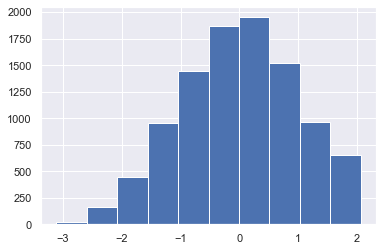

In [10]:
df.CreditScore.hist()

In [10]:
df.describe().applymap(round)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
mean,0,39,5,76486,2,1,1,100090,0
std,1,10,3,62397,1,0,0,57510,0
min,-3,18,0,0,1,0,0,12,0
25%,-1,32,3,0,1,0,0,51002,0
50%,0,37,5,97199,1,1,1,100194,0
75%,1,44,7,127644,2,1,1,149388,0
max,2,92,10,250898,4,1,1,199992,1


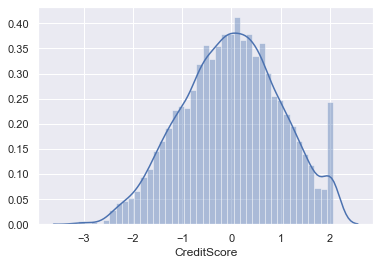

In [28]:
sns.distplot(df.CreditScore)

# Age

In [16]:
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,42,0.00,One,Yes,Yes,101348.88,1,Tenure 0-2 Years,Bad
1,Spain,Female,41,83807.86,One,No,Yes,112542.58,0,Tenure 0-2 Years,Bad
2,France,Female,42,159660.80,Three,Yes,No,113931.57,1,Tenure 7+ Years,Bad
3,France,Female,39,0.00,Two,No,No,93826.63,0,Tenure 0-2 Years,Good
4,Spain,Female,43,125510.82,One,Yes,Yes,79084.10,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,0.00,Two,Yes,No,96270.64,0,Tenure 5-6 Years,Excellent
9996,France,Male,35,57369.61,One,Yes,Yes,101699.77,0,Tenure 7+ Years,Bad
9997,France,Female,36,0.00,One,No,Yes,42085.58,1,None,Good
9998,Germany,Male,42,75075.31,Two,Yes,No,92888.52,1,Tenure 3-4 Years,Excellent


In [21]:
scaler = StandardScaler()
df.Age = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))

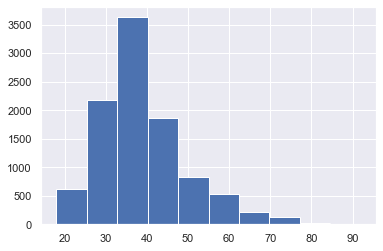

In [60]:
df.Age.hist()

In [121]:
# Min Max Scale Age
scaler=MinMaxScaler()
scaler.fit_transform(df.Age.values.reshape(-1, 1))
df.Age = scaler.fit_transform(df.Age.values.reshape(-1, 1))

In [122]:
def standardize_num_cols(df):
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df.values.reshape(-1, 1))
    return df

In [12]:
df.Age

0       0.324324
1       0.310811
2       0.324324
3       0.283784
4       0.337838
          ...   
9995    0.283784
9996    0.229730
9997    0.243243
9998    0.324324
9999    0.135135
Name: Age, Length: 10000, dtype: float64

In [123]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup
0,-0.326221,France,Female,0.324324,0.00,One,Yes,Yes,101348.88,1,Tenure 0-2 Years
1,-0.440036,Spain,Female,0.310811,83807.86,One,No,Yes,112542.58,0,Tenure 0-2 Years
2,-1.536794,France,Female,0.324324,159660.80,Three,Yes,No,113931.57,1,Tenure 7+ Years
3,0.501521,France,Female,0.283784,0.00,Two,No,No,93826.63,0,Tenure 0-2 Years
4,2.063884,Spain,Female,0.337838,125510.82,One,Yes,Yes,79084.10,0,Tenure 0-2 Years
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.283784,0.00,Two,Yes,No,96270.64,0,Tenure 5-6 Years
9996,-1.391939,France,Male,0.229730,57369.61,One,Yes,Yes,101699.77,0,Tenure 7+ Years
9997,0.604988,France,Female,0.243243,0.00,One,No,Yes,42085.58,1,None
9998,1.256835,Germany,Male,0.324324,75075.31,Two,Yes,No,92888.52,1,Tenure 3-4 Years


# Balance

In [124]:
#df.Balance = standardize_num_cols(df.Balance)

# Min Max Scale balance
scaler=MinMaxScaler()
scaler.fit_transform(df.Balance.values.reshape(-1, 1))
df.Balance = scaler.fit_transform(df.Balance.values.reshape(-1, 1))

In [22]:
scaler = StandardScaler()
df.Balance = StandardScaler().fit_transform(df.Balance.values.reshape(-1,1))

In [23]:
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,0.293517,-1.225848,One,Yes,Yes,101348.88,1,Tenure 0-2 Years,Bad
1,Spain,Female,0.198164,0.117350,One,No,Yes,112542.58,0,Tenure 0-2 Years,Bad
2,France,Female,0.293517,1.333053,Three,Yes,No,113931.57,1,Tenure 7+ Years,Bad
3,France,Female,0.007457,-1.225848,Two,No,No,93826.63,0,Tenure 0-2 Years,Good
4,Spain,Female,0.388871,0.785728,One,Yes,Yes,79084.10,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,0.007457,-1.225848,Two,Yes,No,96270.64,0,Tenure 5-6 Years,Excellent
9996,France,Male,-0.373958,-0.306379,One,Yes,Yes,101699.77,0,Tenure 7+ Years,Bad
9997,France,Female,-0.278604,-1.225848,One,No,Yes,42085.58,1,None,Good
9998,Germany,Male,0.293517,-0.022608,Two,Yes,No,92888.52,1,Tenure 3-4 Years,Excellent


# Salary

In [126]:
# df.EstimatedSalary = standardize_num_cols(df.EstimatedSalary)

# Min Max Scale Est Salary
scaler=MinMaxScaler()
scaler.fit_transform(df.EstimatedSalary.values.reshape(-1, 1))
df.EstimatedSalary = scaler.fit_transform(df.EstimatedSalary.values.reshape(-1, 1))

In [24]:
scaler = StandardScaler()
df.EstimatedSalary = StandardScaler().fit_transform(df.EstimatedSalary.values.reshape(-1,1))

In [25]:
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,0.293517,-1.225848,One,Yes,Yes,0.021886,1,Tenure 0-2 Years,Bad
1,Spain,Female,0.198164,0.117350,One,No,Yes,0.216534,0,Tenure 0-2 Years,Bad
2,France,Female,0.293517,1.333053,Three,Yes,No,0.240687,1,Tenure 7+ Years,Bad
3,France,Female,0.007457,-1.225848,Two,No,No,-0.108918,0,Tenure 0-2 Years,Good
4,Spain,Female,0.388871,0.785728,One,Yes,Yes,-0.365276,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,0.007457,-1.225848,Two,Yes,No,-0.066419,0,Tenure 5-6 Years,Excellent
9996,France,Male,-0.373958,-0.306379,One,Yes,Yes,0.027988,0,Tenure 7+ Years,Bad
9997,France,Female,-0.278604,-1.225848,One,No,Yes,-1.008643,1,None,Good
9998,Germany,Male,0.293517,-0.022608,Two,Yes,No,-0.125231,1,Tenure 3-4 Years,Excellent


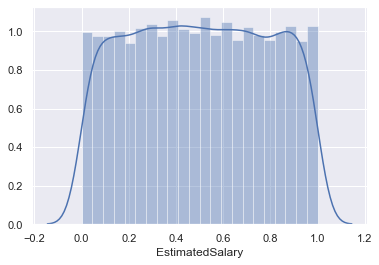

In [27]:
sns.distplot(df.EstimatedSalary)

# Tenure

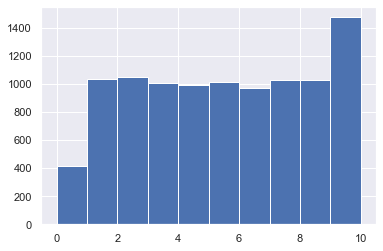

In [250]:
df.Tenure.hist()

In [21]:
scaler = StandardScaler()
#scaler.fit(df.Tenure.values.reshape(-1, 1))
#df.Tenure = scaler.fit_transform(df.Tenure.values.reshape(-1, 1))

ValueError: could not convert string to float: 'Tenure 0-2 Years'

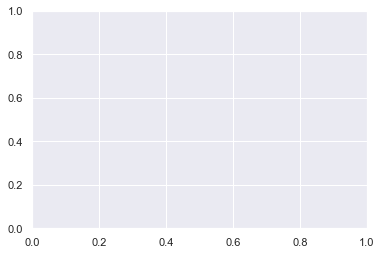

In [129]:
sns.distplot(df.TenureGroup)

In [70]:
def standardize_num_cols(df):
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df.values.reshape(-1, 1))
    return df

for i in num_columns:
    standardize_num_cols(df[i])
    
    

In [74]:
scaler=MinMaxScaler()
df.Age = scaler.fit_transform(df.Age.values.reshape(-1, 1))
df.Balance = scaler.fit_transform(df.Balance.values.reshape(-1, 1))
df.EstimatedSalary = scaler.fit_transform(df.EstimatedSalary.values.reshape(-1, 1))
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,0.324324,0.000000,One,Yes,Yes,0.506735,1,Tenure 0-2 Years,Bad
1,Spain,Female,0.310811,0.334031,One,No,Yes,0.562709,0,Tenure 0-2 Years,Bad
2,France,Female,0.324324,0.636357,Three,Yes,No,0.569654,1,Tenure 7+ Years,Bad
3,France,Female,0.283784,0.000000,Two,No,No,0.469120,0,Tenure 0-2 Years,Good
4,Spain,Female,0.337838,0.500246,One,Yes,Yes,0.395400,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,0.283784,0.000000,Two,Yes,No,0.481341,0,Tenure 5-6 Years,Excellent
9996,France,Male,0.229730,0.228657,One,Yes,Yes,0.508490,0,Tenure 7+ Years,Bad
9997,France,Female,0.243243,0.000000,One,No,Yes,0.210390,1,None,Good
9998,Germany,Male,0.324324,0.299226,Two,Yes,No,0.464429,1,Tenure 3-4 Years,Excellent


# Dummies 

In [207]:
def make_dummies(df,lst):
    for i in lst:
        pd.get_dummies(data = df,columns=lst, drop_first=True)     
    return df

In [69]:
for i in num_columns:
        print(pd.get_dummies(data = df,columns=[i], drop_first=True))

     Geography  Gender    Balance NumOfProducts HasCrCard IsActiveMember  \
0       France  Female       0.00           One       Yes            Yes   
1        Spain  Female   83807.86           One        No            Yes   
2       France  Female  159660.80         Three       Yes             No   
3       France  Female       0.00           Two        No             No   
4        Spain  Female  125510.82           One       Yes            Yes   
...        ...     ...        ...           ...       ...            ...   
9995    France    Male       0.00           Two       Yes             No   
9996    France    Male   57369.61           One       Yes            Yes   
9997    France  Female       0.00           One        No            Yes   
9998   Germany    Male   75075.31           Two       Yes             No   
9999    France  Female  130142.79           One       Yes             No   

      EstimatedSalary  Churn       TenureGroup CreditScoreGroup  ...  Age_78  \
0      

In [75]:
df = pd.get_dummies(data = df,columns=cat_columns, drop_first=True) 

,Age,Balance,EstimatedSalary,Churn,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_One,NumOfProducts_Three,NumOfProducts_Two,HasCrCard_Yes,IsActiveMember_Yes,TenureGroup_Tenure 3-4 Years,TenureGroup_Tenure 5-6 Years,TenureGroup_Tenure 7+ Years,CreditScoreGroup_Excellent,CreditScoreGroup_Fair,CreditScoreGroup_Good
0,0.324324,0.000000,0.506735,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1,0.310811,0.334031,0.562709,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,0.324324,0.636357,0.569654,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0.283784,0.000000,0.469120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.337838,0.500246,0.395400,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.283784,0.000000,0.481341,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0
9996,0.229730,0.228657,0.508490,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0
9997,0.243243,0.000000,0.210390,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
9998,0.324324,0.299226,0.464429,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0


In [130]:
def standardize_num_cols(df):
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df.values.reshape(-1, 1))
    return df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup
0,-0.326221,France,Female,0.324324,0.000000,One,Yes,Yes,0.506735,1,Tenure 0-2 Years
1,-0.440036,Spain,Female,0.310811,0.334031,One,No,Yes,0.562709,0,Tenure 0-2 Years
2,-1.536794,France,Female,0.324324,0.636357,Three,Yes,No,0.569654,1,Tenure 7+ Years
3,0.501521,France,Female,0.283784,0.000000,Two,No,No,0.469120,0,Tenure 0-2 Years
4,2.063884,Spain,Female,0.337838,0.500246,One,Yes,Yes,0.395400,0,Tenure 0-2 Years


In [132]:
df_dummies = pd.get_dummies(data=df, columns=['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'TenureGroup'], drop_first=True)

In [133]:
df_dummies

,CreditScore,Age,Balance,EstimatedSalary,Churn,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_One,NumOfProducts_Three,NumOfProducts_Two,HasCrCard_Yes,IsActiveMember_Yes,TenureGroup_Tenure 3-4 Years,TenureGroup_Tenure 5-6 Years,TenureGroup_Tenure 7+ Years
0,-0.326221,0.324324,0.000000,0.506735,1,0,0,0,1,0,0,1,1,0,0,0
1,-0.440036,0.310811,0.334031,0.562709,0,0,1,0,1,0,0,0,1,0,0,0
2,-1.536794,0.324324,0.636357,0.569654,1,0,0,0,0,1,0,1,0,0,0,1
3,0.501521,0.283784,0.000000,0.469120,0,0,0,0,0,0,1,0,0,0,0,0
4,2.063884,0.337838,0.500246,0.395400,0,0,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.283784,0.000000,0.481341,0,0,0,1,0,0,1,1,0,0,1,0
9996,-1.391939,0.229730,0.228657,0.508490,0,0,0,1,1,0,0,1,1,0,0,1
9997,0.604988,0.243243,0.000000,0.210390,1,0,0,0,1,0,0,0,1,0,0,0
9998,1.256835,0.324324,0.299226,0.464429,1,1,0,1,0,0,1,1,0,1,0,0


In [30]:
vif_df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,TenureGroup,CreditScoreGroup
0,France,Female,0.293517,-1.225848,One,Yes,Yes,0.021886,Tenure 0-2 Years,Bad
1,Spain,Female,0.198164,0.117350,One,No,Yes,0.216534,Tenure 0-2 Years,Bad
2,France,Female,0.293517,1.333053,Three,Yes,No,0.240687,Tenure 7+ Years,Bad
3,France,Female,0.007457,-1.225848,Two,No,No,-0.108918,Tenure 0-2 Years,Good
4,Spain,Female,0.388871,0.785728,One,Yes,Yes,-0.365276,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,0.007457,-1.225848,Two,Yes,No,-0.066419,Tenure 5-6 Years,Excellent
9996,France,Male,-0.373958,-0.306379,One,Yes,Yes,0.027988,Tenure 7+ Years,Bad
9997,France,Female,-0.278604,-1.225848,One,No,Yes,-1.008643,None,Good
9998,Germany,Male,0.293517,-0.022608,Two,Yes,No,-0.125231,Tenure 3-4 Years,Excellent


# Correlation Matrix

In [29]:
vif_df = df.drop(['Churn'], axis=1)

In [32]:
# cant run vif on categories
pd.Series([VIF(vif_df.values, i) for i in range(vif_df.shape[1])],index=vif_df.columns).sort_values(ascending=False)









TypeError: '>=' not supported between instances of 'str' and 'NoneType'

In [137]:
# Test VIF for mutltico
X = df_dummies.drop(['Churn','NumOfProducts_One'], axis=1)
pd.Series([VIF(X.values, i) for i in range(X.shape[1])],index=X.columns).sort_values(ascending=False)

Age                             3.966205
EstimatedSalary                 3.383194
Balance                         3.018990
HasCrCard_Yes                   2.953638
Gender_Male                     2.075848
IsActiveMember_Yes              2.009471
NumOfProducts_Two               1.925861
Geography_Germany               1.791260
TenureGroup_Tenure 7+ Years     1.613641
TenureGroup_Tenure 5-6 Years    1.481551
TenureGroup_Tenure 3-4 Years    1.479715
Geography_Spain                 1.451756
NumOfProducts_Three             1.060019
CreditScore                     1.001141
dtype: float64

In [138]:
#correlation
correlation = df_dummies.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [278]:
# Pearson's Correlation Coeficient
# Measure of linear corr between two variables
# 1 = total positive linear corr
# 0 = no linear corr
# -1 = neg linear corr

# First Test Logistic Regression Model

In [38]:
# Make train test model
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import auc,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1),
                                                   df.Churn, test_size=1/3)

In [34]:
X_train.shape

(6666, 10)

In [35]:
y_train.value_counts()

0    5325
1    1341
Name: Churn, dtype: int64

In [39]:
model_LR = LogisticRegression(class_weight='balanced')
res_LR = model_LR.fit(X_train,y_train)
pred_LR = model_LR.predict(X_test)

ValueError: could not convert string to float: 'Bad'

In [148]:
conf_LR = confusion_matrix(y_test,pred_LR)
conf_LR

array([[2540,  111],
       [ 431,  252]])

<function matplotlib.pyplot.show(*args, **kw)>

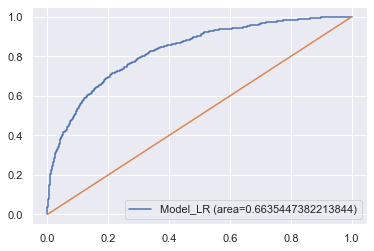

In [151]:
# test all the thresholds to define what is yes and what is no, false pos and false neg
# want to be close to 1
# want to be far away from orange line ( orange is 50/50 chance to predict)
model_LR_roc = roc_auc_score(y_test,pred_LR)
fpr,tpr,thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_LR (area={model_LR_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

In [152]:
# Larger number of non churn to churn
df_dummies.Churn.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

# Imbalanced Data

In [153]:
# repeat with class_weight='balanced'

model_LR = LogisticRegression(class_weight='balanced')
res_LR = model_LR.fit(X_train,y_train)
pred_LR = model_LR.predict(X_test)

conf_LR = confusion_matrix(y_test,pred_LR)
conf_LR

array([[1970,  681],
       [ 173,  510]])

<function matplotlib.pyplot.show(*args, **kw)>

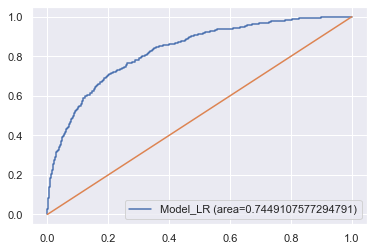

In [154]:
model_LR_roc = roc_auc_score(y_test,pred_LR)
fpr,tpr,thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_LR (area={model_LR_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

# Metrics - LR Model

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [186]:
print(accuracy_score(y_test,pred_LR))
print(recall_score(y_test,pred_LR))
print(precision_score(y_test,pred_LR))
print(f1_score(y_test,pred_LR))
print(log_loss(y_test, pred_LR))

0.7438512297540492
0.746705710102489
0.4282115869017632
0.544290288153682
8.847228424446216


# K Nearest Neighbors Model

[[2485  166]
 [ 501  182]]


<function matplotlib.pyplot.show(*args, **kw)>

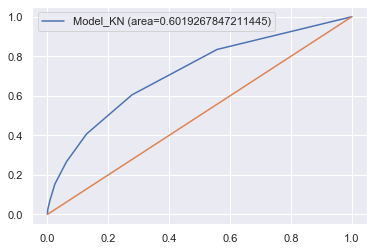

In [164]:
model_KN = KNeighborsClassifier(n_neighbors=7)
res_KN = model_KN.fit(X_train,y_train)
pred_KN = model_KN.predict(X_test)

conf_KN = confusion_matrix(y_test,pred_KN)
print(conf_KN)

model_KN_roc = roc_auc_score(y_test,pred_KN)
fpr,tpr,thresholds = roc_curve(y_test, model_KN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_KN (area={model_KN_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

# Metrics - KN Model

In [185]:
print(accuracy_score(y_test,pred_KN))
print(recall_score(y_test,pred_KN))
print(precision_score(y_test,pred_KN))
print(f1_score(y_test,pred_KN))
print(log_loss(y_test, pred_KN))

0.7999400119976005
0.2664714494875549
0.5229885057471264
0.3530552861299709
6.909867003173017


In [41]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [171]:
model_list=[KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), CatBoostClassifier()]

In [172]:
l_acc = []
l_cm = []
for model in model_list:
    model2=model.fit(X=X_train, y=y_train)
    y_pred2 = model2.predict(X_test)
    l_acc.append(accuracy_score(y_test,y_pred2))
    l_cm.append(confusion_matrix(y_test,y_pred2))
    print(type(model2).__name__, ' is done')

KNeighborsClassifier  is done
GaussianNB  is done
DecisionTreeClassifier  is done
RandomForestClassifier  is done
Learning rate set to 0.023159
0:	learn: 0.6740660	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.6572951	total: 75.8ms	remaining: 37.8s
2:	learn: 0.6409332	total: 78.8ms	remaining: 26.2s
3:	learn: 0.6239347	total: 81.4ms	remaining: 20.3s
4:	learn: 0.6119488	total: 83.9ms	remaining: 16.7s
5:	learn: 0.5974691	total: 86.6ms	remaining: 14.3s
6:	learn: 0.5842232	total: 89.2ms	remaining: 12.7s
7:	learn: 0.5713710	total: 91.8ms	remaining: 11.4s
8:	learn: 0.5617266	total: 94.3ms	remaining: 10.4s
9:	learn: 0.5500831	total: 97ms	remaining: 9.6s
10:	learn: 0.5397148	total: 99.5ms	remaining: 8.95s
11:	learn: 0.5317724	total: 102ms	remaining: 8.42s
12:	learn: 0.5224089	total: 105ms	remaining: 7.96s
13:	learn: 0.5123069	total: 108ms	remaining: 7.59s
14:	learn: 0.5026737	total: 111ms	remaining: 7.26s
15:	learn: 0.4943165	total: 113ms	remaining: 6.96s
16:	learn: 0.4862587	total: 116ms	remaini

165:	learn: 0.3130217	total: 732ms	remaining: 3.68s
166:	learn: 0.3127638	total: 735ms	remaining: 3.67s
167:	learn: 0.3125853	total: 738ms	remaining: 3.65s
168:	learn: 0.3123593	total: 745ms	remaining: 3.66s
169:	learn: 0.3122031	total: 750ms	remaining: 3.66s
170:	learn: 0.3121141	total: 755ms	remaining: 3.66s
171:	learn: 0.3119191	total: 762ms	remaining: 3.67s
172:	learn: 0.3117737	total: 766ms	remaining: 3.66s
173:	learn: 0.3115068	total: 771ms	remaining: 3.66s
174:	learn: 0.3112240	total: 776ms	remaining: 3.66s
175:	learn: 0.3111057	total: 781ms	remaining: 3.65s
176:	learn: 0.3108907	total: 784ms	remaining: 3.64s
177:	learn: 0.3107190	total: 787ms	remaining: 3.63s
178:	learn: 0.3105547	total: 790ms	remaining: 3.62s
179:	learn: 0.3104076	total: 793ms	remaining: 3.61s
180:	learn: 0.3102392	total: 796ms	remaining: 3.6s
181:	learn: 0.3101004	total: 799ms	remaining: 3.59s
182:	learn: 0.3099431	total: 802ms	remaining: 3.58s
183:	learn: 0.3097296	total: 805ms	remaining: 3.57s
184:	learn: 0

340:	learn: 0.2894787	total: 1.31s	remaining: 2.53s
341:	learn: 0.2894017	total: 1.31s	remaining: 2.53s
342:	learn: 0.2891890	total: 1.32s	remaining: 2.53s
343:	learn: 0.2890629	total: 1.33s	remaining: 2.53s
344:	learn: 0.2889418	total: 1.33s	remaining: 2.53s
345:	learn: 0.2888694	total: 1.34s	remaining: 2.53s
346:	learn: 0.2887828	total: 1.34s	remaining: 2.52s
347:	learn: 0.2886537	total: 1.35s	remaining: 2.52s
348:	learn: 0.2885401	total: 1.35s	remaining: 2.52s
349:	learn: 0.2884356	total: 1.36s	remaining: 2.52s
350:	learn: 0.2883551	total: 1.36s	remaining: 2.52s
351:	learn: 0.2882385	total: 1.36s	remaining: 2.51s
352:	learn: 0.2881780	total: 1.37s	remaining: 2.51s
353:	learn: 0.2880540	total: 1.37s	remaining: 2.5s
354:	learn: 0.2879500	total: 1.37s	remaining: 2.5s
355:	learn: 0.2878330	total: 1.38s	remaining: 2.49s
356:	learn: 0.2877376	total: 1.38s	remaining: 2.48s
357:	learn: 0.2875542	total: 1.38s	remaining: 2.48s
358:	learn: 0.2874478	total: 1.38s	remaining: 2.47s
359:	learn: 0.

520:	learn: 0.2701880	total: 1.87s	remaining: 1.72s
521:	learn: 0.2700983	total: 1.88s	remaining: 1.72s
522:	learn: 0.2699922	total: 1.88s	remaining: 1.72s
523:	learn: 0.2699278	total: 1.89s	remaining: 1.72s
524:	learn: 0.2698273	total: 1.89s	remaining: 1.71s
525:	learn: 0.2697742	total: 1.9s	remaining: 1.71s
526:	learn: 0.2696467	total: 1.91s	remaining: 1.71s
527:	learn: 0.2695816	total: 1.91s	remaining: 1.71s
528:	learn: 0.2694758	total: 1.92s	remaining: 1.71s
529:	learn: 0.2693781	total: 1.92s	remaining: 1.7s
530:	learn: 0.2692303	total: 1.92s	remaining: 1.7s
531:	learn: 0.2691023	total: 1.93s	remaining: 1.7s
532:	learn: 0.2690112	total: 1.93s	remaining: 1.69s
533:	learn: 0.2689485	total: 1.93s	remaining: 1.69s
534:	learn: 0.2687718	total: 1.94s	remaining: 1.68s
535:	learn: 0.2686955	total: 1.94s	remaining: 1.68s
536:	learn: 0.2685771	total: 1.94s	remaining: 1.67s
537:	learn: 0.2684055	total: 1.94s	remaining: 1.67s
538:	learn: 0.2683473	total: 1.95s	remaining: 1.66s
539:	learn: 0.26

704:	learn: 0.2523909	total: 2.45s	remaining: 1.03s
705:	learn: 0.2522634	total: 2.46s	remaining: 1.02s
706:	learn: 0.2521818	total: 2.46s	remaining: 1.02s
707:	learn: 0.2521403	total: 2.47s	remaining: 1.02s
708:	learn: 0.2520457	total: 2.48s	remaining: 1.02s
709:	learn: 0.2519599	total: 2.48s	remaining: 1.01s
710:	learn: 0.2518922	total: 2.49s	remaining: 1.01s
711:	learn: 0.2517986	total: 2.49s	remaining: 1.01s
712:	learn: 0.2516562	total: 2.5s	remaining: 1s
713:	learn: 0.2515782	total: 2.5s	remaining: 1s
714:	learn: 0.2514938	total: 2.5s	remaining: 998ms
715:	learn: 0.2514020	total: 2.51s	remaining: 994ms
716:	learn: 0.2513209	total: 2.51s	remaining: 991ms
717:	learn: 0.2512365	total: 2.51s	remaining: 987ms
718:	learn: 0.2510888	total: 2.52s	remaining: 983ms
719:	learn: 0.2509762	total: 2.52s	remaining: 979ms
720:	learn: 0.2509258	total: 2.52s	remaining: 976ms
721:	learn: 0.2508002	total: 2.52s	remaining: 972ms
722:	learn: 0.2507086	total: 2.53s	remaining: 968ms
723:	learn: 0.2506466

891:	learn: 0.2359416	total: 3.04s	remaining: 368ms
892:	learn: 0.2358741	total: 3.04s	remaining: 365ms
893:	learn: 0.2358025	total: 3.05s	remaining: 361ms
894:	learn: 0.2357328	total: 3.05s	remaining: 358ms
895:	learn: 0.2356881	total: 3.06s	remaining: 355ms
896:	learn: 0.2356382	total: 3.06s	remaining: 352ms
897:	learn: 0.2355720	total: 3.07s	remaining: 349ms
898:	learn: 0.2354954	total: 3.07s	remaining: 345ms
899:	learn: 0.2354408	total: 3.08s	remaining: 342ms
900:	learn: 0.2353559	total: 3.08s	remaining: 339ms
901:	learn: 0.2352330	total: 3.09s	remaining: 336ms
902:	learn: 0.2351562	total: 3.09s	remaining: 332ms
903:	learn: 0.2350882	total: 3.09s	remaining: 329ms
904:	learn: 0.2350164	total: 3.1s	remaining: 325ms
905:	learn: 0.2349515	total: 3.1s	remaining: 322ms
906:	learn: 0.2348624	total: 3.1s	remaining: 318ms
907:	learn: 0.2348366	total: 3.1s	remaining: 315ms
908:	learn: 0.2347608	total: 3.11s	remaining: 311ms
909:	learn: 0.2346548	total: 3.11s	remaining: 308ms
910:	learn: 0.23

In [173]:
pd.DataFrame([[type(i).__name__ for i in model_list],l_acc]).T.sort_values(by=1)

,0,1
2,DecisionTreeClassifier,0.796341
0,KNeighborsClassifier,0.80084
1,GaussianNB,0.826935
3,RandomForestClassifier,0.853929
4,CatBoostClassifier,0.854229


# Random Forest Model

In [278]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,0.00,One,Yes,Yes,101348.88,1
1,608,Spain,Female,41,83807.86,One,No,Yes,112542.58,0
2,502,France,Female,42,159660.80,Three,Yes,No,113931.57,1
3,699,France,Female,39,0.00,Two,No,No,93826.63,0
4,850,Spain,Female,43,125510.82,One,Yes,Yes,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,Two,Yes,No,96270.64,0
9996,516,France,Male,35,57369.61,One,Yes,Yes,101699.77,0
9997,709,France,Female,36,0.00,One,No,Yes,42085.58,1
9998,772,Germany,Male,42,75075.31,Two,Yes,No,92888.52,1


In [42]:
model_RF = RandomForestClassifier()
res_RF = model_RF.fit(X_train,y_train)
pred_RF = model_RF.predict(X_test)

conf_RF = confusion_matrix(y_test,pred_RF)
print(conf_RF)

model_RF_roc = roc_auc_score(y_test,pred_RF)
print(model_RF_roc)
fpr,tpr,thresholds = roc_curve(y_test, model_RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_RF (area={model_RF_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show


ValueError: could not convert string to float: 'France'

[[2574   91]
 [ 383  286]]
0.6966786977286813


<function matplotlib.pyplot.show(*args, **kw)>

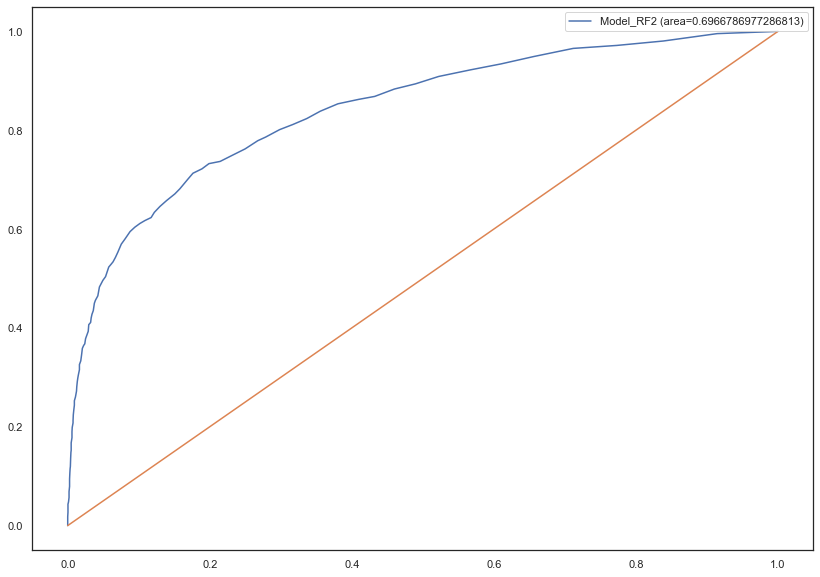

In [283]:

model_RF2 = RandomForestClassifier(class_weight='balanced')
res_RF2 = model_RF2.fit(X_train,y_train)
pred_RF2 = model_RF2.predict(X_test)

labels_RF2 =['']
conf_RF2 = confusion_matrix(y_test,pred_RF2)
print(conf_RF2)

model_RF2_roc = roc_auc_score(y_test,pred_RF2)
print(model_RF2_roc)
fpr,tpr,thresholds = roc_curve(y_test, model_RF2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_RF2 (area={model_RF2_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

In [280]:
print(accuracy_score(y_test,pred_RF))
print(recall_score(y_test,pred_RF))
print(precision_score(y_test,pred_RF))
print(f1_score(y_test,pred_RF))

0.8617276544691062
0.45440956651718983
0.76
0.5687558465855941


In [188]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_RF)

4.9622577822620135

# UMAP

In [189]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [190]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [199]:

import umap.umap_ as umap
reducer = umap.UMAP()

In [ ]:
df_dummies.drop('Churn') 

In [200]:
embedding = reducer.fit_transform(df_dummies)
embedding.shape

/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^


/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../opt/anaconda3/lib/python3.7/site-packages/

(10000, 2)

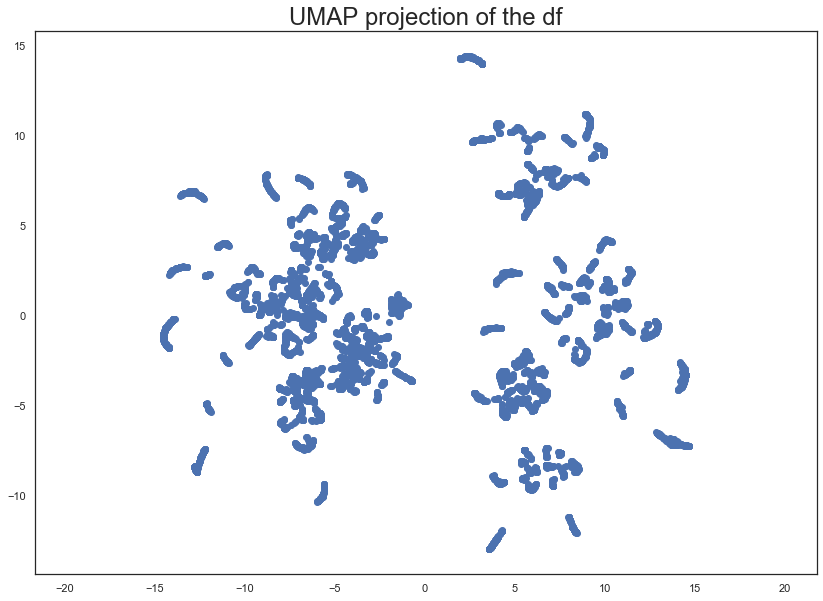

In [203]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the df', fontsize=24);

# PCA

In [209]:
x = df_dummies.drop('Churn', axis=1)

In [210]:
x

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_One,NumOfProducts_Three,NumOfProducts_Two,HasCrCard_Yes,IsActiveMember_Yes,TenureGroup_Tenure 3-4 Years,TenureGroup_Tenure 5-6 Years,TenureGroup_Tenure 7+ Years
0,-0.326221,0.324324,0.000000,0.506735,0,0,0,1,0,0,1,1,0,0,0
1,-0.440036,0.310811,0.334031,0.562709,0,1,0,1,0,0,0,1,0,0,0
2,-1.536794,0.324324,0.636357,0.569654,0,0,0,0,1,0,1,0,0,0,1
3,0.501521,0.283784,0.000000,0.469120,0,0,0,0,0,1,0,0,0,0,0
4,2.063884,0.337838,0.500246,0.395400,0,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.283784,0.000000,0.481341,0,0,1,0,0,1,1,0,0,1,0
9996,-1.391939,0.229730,0.228657,0.508490,0,0,1,1,0,0,1,1,0,0,1
9997,0.604988,0.243243,0.000000,0.210390,0,0,0,1,0,0,0,1,0,0,0
9998,1.256835,0.324324,0.299226,0.464429,1,0,1,0,0,1,1,0,1,0,0


In [211]:
from sklearn.decomposition import PCA
pca_churn = PCA(n_components=2)
principalComponents_churn = pca_churn.fit_transform(x)

In [212]:
np.mean(x),np.std(x)

(CreditScore                    -4.870326e-16
 Age                             2.827270e-01
 Balance                         3.048484e-01
 EstimatedSalary                 5.004411e-01
 Geography_Germany               2.509000e-01
 Geography_Spain                 2.477000e-01
 Gender_Male                     5.457000e-01
 NumOfProducts_One               5.084000e-01
 NumOfProducts_Three             2.660000e-02
 NumOfProducts_Two               4.590000e-01
 HasCrCard_Yes                   7.055000e-01
 IsActiveMember_Yes              5.151000e-01
 TenureGroup_Tenure 3-4 Years    1.998000e-01
 TenureGroup_Tenure 5-6 Years    1.979000e-01
 TenureGroup_Tenure 7+ Years     2.499000e-01
 dtype: float64, CreditScore                     1.000000
 Age                             0.141720
 Balance                         0.248684
 EstimatedSalary                 0.287566
 Geography_Germany               0.433531
 Geography_Spain                 0.431677
 Gender_Male                     0.497907


In [213]:
principal_churn_Df = pd.DataFrame(data = principalComponents_churn
             , columns = ['principal component 1', 'principal component 2'])

In [214]:
principal_churn_Df.tail()

,principal component 1,principal component 2
9995,-1.245791,0.749252
9996,1.397784,-0.587322
9997,-0.600965,-0.605203
9998,-1.263586,0.611660
9999,-1.440279,-0.746910


In [216]:
print('Explained variation per principal component: {}'.format(pca_churn.explained_variance_ratio_))
# P1 has 30%, P2 has 15%, and 55% was dropped

Explained variation per principal component: [0.30553301 0.15085553]


<Figure size 1008x720 with 0 Axes>

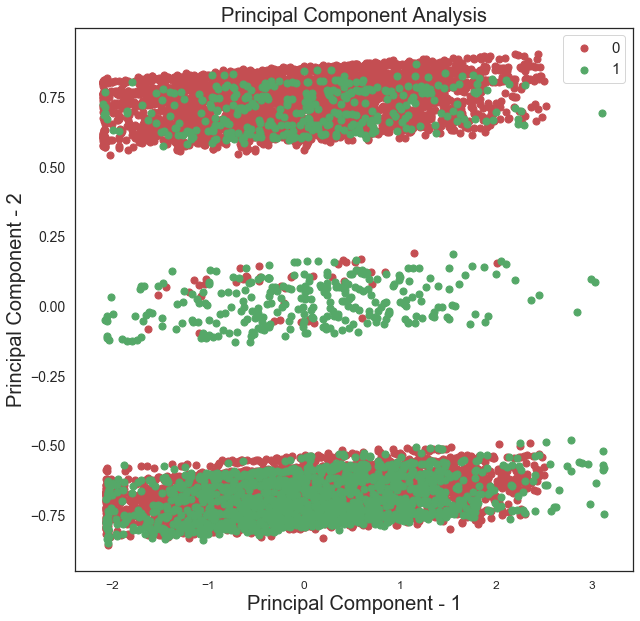

In [219]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_dummies['Churn'] == target
    plt.scatter(principal_churn_Df.loc[indicesToKeep, 'principal component 1']
               , principal_churn_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [204]:
# PCA - Principle Components
pca = PCA(0.9)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [205]:
pca.n_components_
# reduced to 9 components

9

# RF Model 2

In [220]:
train_img_pca = pca.transform(X_train)
test_img_pca = pca.transform(X_test)

[[2444  207]
 [ 440  243]]
0.6388497834735145


<function matplotlib.pyplot.show(*args, **kw)>

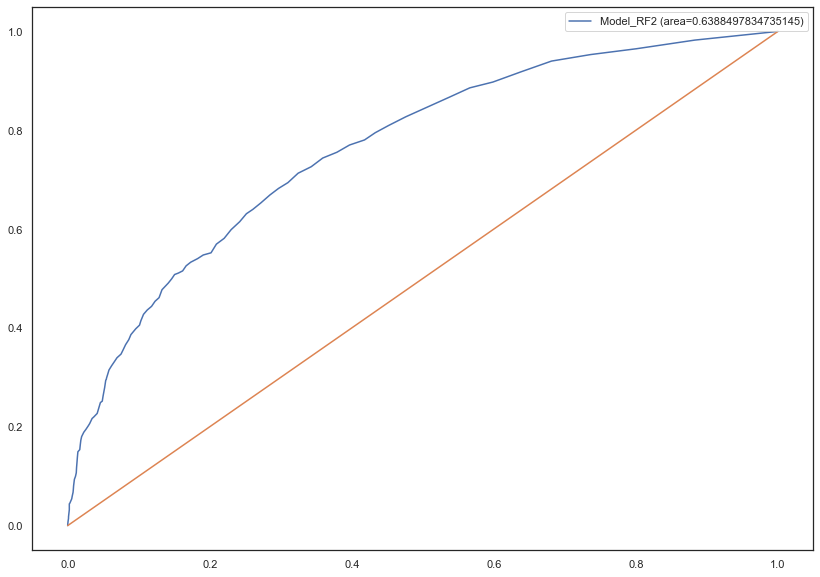

In [221]:
model_RF2 = RandomForestClassifier()
res_RF2 = model_RF2.fit(train_img_pca,y_train)
pred_RF2 = model_RF2.predict(test_img_pca)

conf_RF2 = confusion_matrix(y_test,pred_RF2)
print(conf_RF2)

model_RF2_roc = roc_auc_score(y_test,pred_RF2)
print(model_RF2_roc)
fpr,tpr,thresholds = roc_curve(y_test, model_RF2.predict_proba(test_img_pca)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_RF2 (area={model_RF2_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

In [222]:
print(accuracy_score(y_test,pred_RF2))
print(recall_score(y_test,pred_RF2))
print(precision_score(y_test,pred_RF2))
print(f1_score(y_test,pred_RF2))

0.8059388122375525
0.3557833089311859
0.54
0.42894969108561337


# RF Model 3 UMAP

In [223]:
import umap.umap_ as umap
reducer = umap.UMAP()


train_img_umap = reducer.fit_transform(X_train)
test_img_umap = reducer.fit_transform(X_test)

/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^




[[2359  292]
 [ 575  108]]
0.5239894003920175


<function matplotlib.pyplot.show(*args, **kw)>

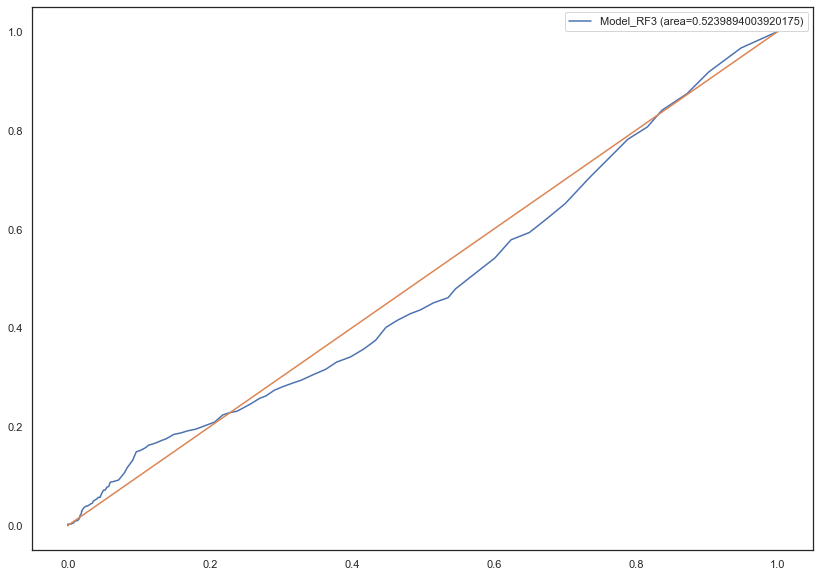

In [224]:
model_RF3 = RandomForestClassifier()
res_RF3 = model_RF3.fit(train_img_umap,y_train)
pred_RF3 = model_RF3.predict(test_img_umap)

conf_RF3 = confusion_matrix(y_test,pred_RF3)
print(conf_RF3)

model_RF3_roc = roc_auc_score(y_test,pred_RF3)
print(model_RF3_roc)
fpr,tpr,thresholds = roc_curve(y_test, model_RF3.predict_proba(test_img_umap)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_RF3 (area={model_RF3_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

In [225]:
print(accuracy_score(y_test,pred_RF2))
print(recall_score(y_test,pred_RF2))
print(precision_score(y_test,pred_RF2))
print(f1_score(y_test,pred_RF2))

0.8059388122375525
0.3557833089311859
0.54
0.42894969108561337


# Cat Boost

In [53]:
X = df.drop('Churn', axis=1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
# Initialize data for catboost
dummies = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'TenureGroup', 'CreditScoreGroup']
cat_features = dummies
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500, # more iterations to learn from
                          eval_metric='F1-score') # optimize F1 score

model.fit(X_train, y_train, cat_features)
# Get predicted classes
preds_class = model.predict(X_test)

TypeError: must be real number, not NoneType

In [52]:
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,0.293517,-1.225848,One,Yes,Yes,0.021886,1,Tenure 0-2 Years,Bad
1,Spain,Female,0.198164,0.117350,One,No,Yes,0.216534,0,Tenure 0-2 Years,Bad
2,France,Female,0.293517,1.333053,Three,Yes,No,0.240687,1,Tenure 7+ Years,Bad
3,France,Female,0.007457,-1.225848,Two,No,No,-0.108918,0,Tenure 0-2 Years,Good
4,Spain,Female,0.388871,0.785728,One,Yes,Yes,-0.365276,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,0.007457,-1.225848,Two,Yes,No,-0.066419,0,Tenure 5-6 Years,Excellent
9996,France,Male,-0.373958,-0.306379,One,Yes,Yes,0.027988,0,Tenure 7+ Years,Bad
9997,France,Female,-0.278604,-1.225848,One,No,Yes,-1.008643,1,None,Good
9998,Germany,Male,0.293517,-0.022608,Two,Yes,No,-0.125231,1,Tenure 3-4 Years,Excellent


In [43]:
df

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,TenureGroup,CreditScoreGroup
0,France,Female,0.293517,-1.225848,One,Yes,Yes,0.021886,1,Tenure 0-2 Years,Bad
1,Spain,Female,0.198164,0.117350,One,No,Yes,0.216534,0,Tenure 0-2 Years,Bad
2,France,Female,0.293517,1.333053,Three,Yes,No,0.240687,1,Tenure 7+ Years,Bad
3,France,Female,0.007457,-1.225848,Two,No,No,-0.108918,0,Tenure 0-2 Years,Good
4,Spain,Female,0.388871,0.785728,One,Yes,Yes,-0.365276,0,Tenure 0-2 Years,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,0.007457,-1.225848,Two,Yes,No,-0.066419,0,Tenure 5-6 Years,Excellent
9996,France,Male,-0.373958,-0.306379,One,Yes,Yes,0.027988,0,Tenure 7+ Years,Bad
9997,France,Female,-0.278604,-1.225848,One,No,Yes,-1.008643,1,None,Good
9998,Germany,Male,0.293517,-0.022608,Two,Yes,No,-0.125231,1,Tenure 3-4 Years,Excellent


In [296]:
df.drop('Churn', axis=1)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,0.00,One,Yes,Yes,101348.88
1,608,Spain,Female,41,83807.86,One,No,Yes,112542.58
2,502,France,Female,42,159660.80,Three,Yes,No,113931.57
3,699,France,Female,39,0.00,Two,No,No,93826.63
4,850,Spain,Female,43,125510.82,One,Yes,Yes,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,Two,Yes,No,96270.64
9996,516,France,Male,35,57369.61,One,Yes,Yes,101699.77
9997,709,France,Female,36,0.00,One,No,Yes,42085.58
9998,772,Germany,Male,42,75075.31,Two,Yes,No,92888.52


In [297]:
# remake X and y values WITHOUT dummies for cat boost
X = df.drop('Churn', axis=1).copy()
y = df.Churn.copy()

In [298]:
X

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,0.00,One,Yes,Yes,101348.88
1,608,Spain,Female,41,83807.86,One,No,Yes,112542.58
2,502,France,Female,42,159660.80,Three,Yes,No,113931.57
3,699,France,Female,39,0.00,Two,No,No,93826.63
4,850,Spain,Female,43,125510.82,One,Yes,Yes,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,Two,Yes,No,96270.64
9996,516,France,Male,35,57369.61,One,Yes,Yes,101699.77
9997,709,France,Female,36,0.00,One,No,Yes,42085.58
9998,772,Germany,Male,42,75075.31,Two,Yes,No,92888.52


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)

In [259]:
# Initialize data for catboost
dummies = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
cat_features = dummies
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10000, # more iterations to learn from
                          eval_metric='F1') # optimize F1 score

model.fit(X_train, y_train, cat_features)
# Get predicted classes
preds_class = model.predict(X_test)


Learning rate set to 0.00281
0:	learn: 0.5312209	total: 11ms	remaining: 1m 49s
1:	learn: 0.5378229	total: 21.8ms	remaining: 1m 49s
2:	learn: 0.5275251	total: 32.6ms	remaining: 1m 48s
3:	learn: 0.5125969	total: 38.9ms	remaining: 1m 37s
4:	learn: 0.5002476	total: 48ms	remaining: 1m 36s
5:	learn: 0.5092502	total: 56.3ms	remaining: 1m 33s
6:	learn: 0.5116505	total: 63.8ms	remaining: 1m 31s
7:	learn: 0.5262655	total: 71.7ms	remaining: 1m 29s
8:	learn: 0.5135135	total: 77.6ms	remaining: 1m 26s
9:	learn: 0.5202258	total: 84.8ms	remaining: 1m 24s
10:	learn: 0.5154836	total: 92ms	remaining: 1m 23s
11:	learn: 0.5197740	total: 100ms	remaining: 1m 23s
12:	learn: 0.5199812	total: 108ms	remaining: 1m 23s
13:	learn: 0.5199812	total: 115ms	remaining: 1m 22s
14:	learn: 0.5173232	total: 122ms	remaining: 1m 21s
15:	learn: 0.5197740	total: 128ms	remaining: 1m 20s
16:	learn: 0.5176358	total: 135ms	remaining: 1m 19s
17:	learn: 0.5178827	total: 145ms	remaining: 1m 20s
18:	learn: 0.5178486	total: 158ms	remain

165:	learn: 0.5081562	total: 995ms	remaining: 58.9s
166:	learn: 0.5088933	total: 1s	remaining: 59.1s
167:	learn: 0.5076695	total: 1.01s	remaining: 59.4s
168:	learn: 0.5084075	total: 1.03s	remaining: 59.7s
169:	learn: 0.5084075	total: 1.03s	remaining: 59.9s
170:	learn: 0.5084075	total: 1.04s	remaining: 1m
171:	learn: 0.5079208	total: 1.05s	remaining: 1m
172:	learn: 0.5069307	total: 1.06s	remaining: 1m
173:	learn: 0.5064420	total: 1.07s	remaining: 1m
174:	learn: 0.5061912	total: 1.08s	remaining: 1m
175:	learn: 0.5061912	total: 1.09s	remaining: 1m
176:	learn: 0.5071818	total: 1.1s	remaining: 1m
177:	learn: 0.5074331	total: 1.11s	remaining: 1m 1s
178:	learn: 0.5074331	total: 1.11s	remaining: 1m 1s
179:	learn: 0.5074331	total: 1.12s	remaining: 1m 1s
180:	learn: 0.5066931	total: 1.13s	remaining: 1m 1s
181:	learn: 0.5066931	total: 1.14s	remaining: 1m 1s
182:	learn: 0.5064420	total: 1.14s	remaining: 1m 1s
183:	learn: 0.5064420	total: 1.15s	remaining: 1m 1s
184:	learn: 0.5061912	total: 1.16s	re

346:	learn: 0.5346341	total: 1.97s	remaining: 54.9s
347:	learn: 0.5346341	total: 1.98s	remaining: 55s
348:	learn: 0.5346341	total: 1.99s	remaining: 55.1s
349:	learn: 0.5339190	total: 2s	remaining: 55.2s
350:	learn: 0.5339190	total: 2.01s	remaining: 55.2s
351:	learn: 0.5353486	total: 2.02s	remaining: 55.3s
352:	learn: 0.5372263	total: 2.02s	remaining: 55.3s
353:	learn: 0.5379377	total: 2.03s	remaining: 55.4s
354:	learn: 0.5372263	total: 2.04s	remaining: 55.4s
355:	learn: 0.5383868	total: 2.05s	remaining: 55.4s
356:	learn: 0.5383868	total: 2.05s	remaining: 55.5s
357:	learn: 0.5390966	total: 2.06s	remaining: 55.5s
358:	learn: 0.5376762	total: 2.06s	remaining: 55.4s
359:	learn: 0.5390966	total: 2.07s	remaining: 55.4s
360:	learn: 0.5383868	total: 2.07s	remaining: 55.3s
361:	learn: 0.5376762	total: 2.07s	remaining: 55.2s
362:	learn: 0.5383868	total: 2.08s	remaining: 55.2s
363:	learn: 0.5374878	total: 2.08s	remaining: 55.1s
364:	learn: 0.5379377	total: 2.08s	remaining: 55s
365:	learn: 0.53767

525:	learn: 0.5462428	total: 2.76s	remaining: 49.8s
526:	learn: 0.5462428	total: 2.77s	remaining: 49.9s
527:	learn: 0.5464165	total: 2.78s	remaining: 49.9s
528:	learn: 0.5468525	total: 2.79s	remaining: 50s
529:	learn: 0.5476420	total: 2.8s	remaining: 50s
530:	learn: 0.5485110	total: 2.81s	remaining: 50.1s
531:	learn: 0.5487746	total: 2.81s	remaining: 50.1s
532:	learn: 0.5485110	total: 2.82s	remaining: 50.1s
533:	learn: 0.5485110	total: 2.83s	remaining: 50.1s
534:	learn: 0.5487746	total: 2.83s	remaining: 50.1s
535:	learn: 0.5487746	total: 2.84s	remaining: 50.2s
536:	learn: 0.5487746	total: 2.85s	remaining: 50.3s
537:	learn: 0.5485110	total: 2.86s	remaining: 50.4s
538:	learn: 0.5485110	total: 2.87s	remaining: 50.4s
539:	learn: 0.5485110	total: 2.88s	remaining: 50.4s
540:	learn: 0.5485110	total: 2.89s	remaining: 50.6s
541:	learn: 0.5485110	total: 2.9s	remaining: 50.7s
542:	learn: 0.5485110	total: 2.91s	remaining: 50.7s
543:	learn: 0.5485110	total: 2.92s	remaining: 50.7s
544:	learn: 0.5482

708:	learn: 0.5549188	total: 4.37s	remaining: 57.3s
709:	learn: 0.5549188	total: 4.38s	remaining: 57.3s
710:	learn: 0.5549188	total: 4.38s	remaining: 57.3s
711:	learn: 0.5549188	total: 4.39s	remaining: 57.3s
712:	learn: 0.5549188	total: 4.4s	remaining: 57.3s
713:	learn: 0.5549188	total: 4.41s	remaining: 57.4s
714:	learn: 0.5549188	total: 4.42s	remaining: 57.4s
715:	learn: 0.5549188	total: 4.42s	remaining: 57.3s
716:	learn: 0.5549188	total: 4.43s	remaining: 57.4s
717:	learn: 0.5549188	total: 4.43s	remaining: 57.3s
718:	learn: 0.5549188	total: 4.44s	remaining: 57.4s
719:	learn: 0.5549188	total: 4.45s	remaining: 57.4s
720:	learn: 0.5549188	total: 4.46s	remaining: 57.4s
721:	learn: 0.5551839	total: 4.46s	remaining: 57.4s
722:	learn: 0.5551839	total: 4.47s	remaining: 57.4s
723:	learn: 0.5549188	total: 4.48s	remaining: 57.4s
724:	learn: 0.5551839	total: 4.49s	remaining: 57.4s
725:	learn: 0.5551839	total: 4.49s	remaining: 57.4s
726:	learn: 0.5551839	total: 4.5s	remaining: 57.4s
727:	learn: 0.

881:	learn: 0.5576102	total: 5.57s	remaining: 57.6s
882:	learn: 0.5576102	total: 5.58s	remaining: 57.6s
883:	learn: 0.5576102	total: 5.59s	remaining: 57.6s
884:	learn: 0.5582938	total: 5.59s	remaining: 57.6s
885:	learn: 0.5576102	total: 5.6s	remaining: 57.6s
886:	learn: 0.5576102	total: 5.61s	remaining: 57.6s
887:	learn: 0.5576102	total: 5.62s	remaining: 57.7s
888:	learn: 0.5576102	total: 5.63s	remaining: 57.7s
889:	learn: 0.5582938	total: 5.64s	remaining: 57.7s
890:	learn: 0.5576102	total: 5.64s	remaining: 57.7s
891:	learn: 0.5582938	total: 5.65s	remaining: 57.7s
892:	learn: 0.5589768	total: 5.66s	remaining: 57.7s
893:	learn: 0.5589768	total: 5.66s	remaining: 57.7s
894:	learn: 0.5589768	total: 5.67s	remaining: 57.6s
895:	learn: 0.5589768	total: 5.67s	remaining: 57.6s
896:	learn: 0.5582938	total: 5.68s	remaining: 57.6s
897:	learn: 0.5589768	total: 5.68s	remaining: 57.6s
898:	learn: 0.5596591	total: 5.69s	remaining: 57.6s
899:	learn: 0.5596591	total: 5.7s	remaining: 57.6s
900:	learn: 0.

1041:	learn: 0.5657521	total: 6.56s	remaining: 56.4s
1042:	learn: 0.5657521	total: 6.57s	remaining: 56.4s
1043:	learn: 0.5657521	total: 6.57s	remaining: 56.4s
1044:	learn: 0.5657521	total: 6.58s	remaining: 56.4s
1045:	learn: 0.5657521	total: 6.59s	remaining: 56.4s
1046:	learn: 0.5654846	total: 6.6s	remaining: 56.4s
1047:	learn: 0.5654846	total: 6.6s	remaining: 56.4s
1048:	learn: 0.5654846	total: 6.61s	remaining: 56.4s
1049:	learn: 0.5654846	total: 6.62s	remaining: 56.4s
1050:	learn: 0.5654846	total: 6.63s	remaining: 56.4s
1051:	learn: 0.5654846	total: 6.64s	remaining: 56.4s
1052:	learn: 0.5654846	total: 6.65s	remaining: 56.5s
1053:	learn: 0.5654846	total: 6.65s	remaining: 56.5s
1054:	learn: 0.5654846	total: 6.66s	remaining: 56.5s
1055:	learn: 0.5657521	total: 6.67s	remaining: 56.5s
1056:	learn: 0.5654846	total: 6.67s	remaining: 56.5s
1057:	learn: 0.5654846	total: 6.68s	remaining: 56.5s
1058:	learn: 0.5654846	total: 6.69s	remaining: 56.5s
1059:	learn: 0.5654846	total: 6.69s	remaining: 5

1212:	learn: 0.5716981	total: 7.75s	remaining: 56.1s
1213:	learn: 0.5716981	total: 7.75s	remaining: 56.1s
1214:	learn: 0.5716981	total: 7.76s	remaining: 56.1s
1215:	learn: 0.5710241	total: 7.77s	remaining: 56.1s
1216:	learn: 0.5710241	total: 7.77s	remaining: 56.1s
1217:	learn: 0.5710241	total: 7.78s	remaining: 56.1s
1218:	learn: 0.5710241	total: 7.79s	remaining: 56.1s
1219:	learn: 0.5710241	total: 7.79s	remaining: 56.1s
1220:	learn: 0.5710241	total: 7.8s	remaining: 56.1s
1221:	learn: 0.5710241	total: 7.81s	remaining: 56.1s
1222:	learn: 0.5710241	total: 7.82s	remaining: 56.1s
1223:	learn: 0.5710241	total: 7.82s	remaining: 56.1s
1224:	learn: 0.5710241	total: 7.83s	remaining: 56.1s
1225:	learn: 0.5710241	total: 7.84s	remaining: 56.1s
1226:	learn: 0.5710241	total: 7.84s	remaining: 56.1s
1227:	learn: 0.5710241	total: 7.85s	remaining: 56.1s
1228:	learn: 0.5710241	total: 7.86s	remaining: 56.1s
1229:	learn: 0.5710241	total: 7.87s	remaining: 56.1s
1230:	learn: 0.5710241	total: 7.88s	remaining: 

1388:	learn: 0.5747773	total: 8.94s	remaining: 55.4s
1389:	learn: 0.5747773	total: 8.95s	remaining: 55.4s
1390:	learn: 0.5747773	total: 8.96s	remaining: 55.4s
1391:	learn: 0.5747773	total: 8.96s	remaining: 55.4s
1392:	learn: 0.5747773	total: 8.97s	remaining: 55.4s
1393:	learn: 0.5747773	total: 8.98s	remaining: 55.4s
1394:	learn: 0.5747773	total: 8.98s	remaining: 55.4s
1395:	learn: 0.5747773	total: 8.99s	remaining: 55.4s
1396:	learn: 0.5747773	total: 9s	remaining: 55.4s
1397:	learn: 0.5747773	total: 9.01s	remaining: 55.4s
1398:	learn: 0.5747773	total: 9.01s	remaining: 55.4s
1399:	learn: 0.5747773	total: 9.02s	remaining: 55.4s
1400:	learn: 0.5747773	total: 9.02s	remaining: 55.4s
1401:	learn: 0.5747773	total: 9.03s	remaining: 55.4s
1402:	learn: 0.5747773	total: 9.04s	remaining: 55.4s
1403:	learn: 0.5754452	total: 9.04s	remaining: 55.4s
1404:	learn: 0.5747773	total: 9.05s	remaining: 55.4s
1405:	learn: 0.5750469	total: 9.06s	remaining: 55.4s
1406:	learn: 0.5750469	total: 9.07s	remaining: 55

1560:	learn: 0.5823612	total: 10.1s	remaining: 54.8s
1561:	learn: 0.5823612	total: 10.1s	remaining: 54.8s
1562:	learn: 0.5823612	total: 10.1s	remaining: 54.7s
1563:	learn: 0.5823612	total: 10.1s	remaining: 54.7s
1564:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1565:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1566:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1567:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1568:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1569:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1570:	learn: 0.5830224	total: 10.2s	remaining: 54.7s
1571:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1572:	learn: 0.5823612	total: 10.2s	remaining: 54.7s
1573:	learn: 0.5830224	total: 10.2s	remaining: 54.7s
1574:	learn: 0.5830224	total: 10.2s	remaining: 54.7s
1575:	learn: 0.5830224	total: 10.2s	remaining: 54.7s
1576:	learn: 0.5830224	total: 10.3s	remaining: 54.8s
1577:	learn: 0.5830224	total: 10.3s	remaining: 54.8s
1578:	learn: 0.5830224	total: 10.3s	remaining:

1745:	learn: 0.5855019	total: 11.3s	remaining: 53.5s
1746:	learn: 0.5855019	total: 11.3s	remaining: 53.5s
1747:	learn: 0.5855019	total: 11.3s	remaining: 53.5s
1748:	learn: 0.5855019	total: 11.3s	remaining: 53.5s
1749:	learn: 0.5855019	total: 11.3s	remaining: 53.5s
1750:	learn: 0.5855019	total: 11.4s	remaining: 53.5s
1751:	learn: 0.5855019	total: 11.4s	remaining: 53.5s
1752:	learn: 0.5857741	total: 11.4s	remaining: 53.6s
1753:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1754:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1755:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1756:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1757:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1758:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1759:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1760:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1761:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1762:	learn: 0.5857741	total: 11.4s	remaining: 53.5s
1763:	learn: 0.5857741	total: 11.5s	remaining:

1937:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1938:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1939:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1940:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1941:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1942:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1943:	learn: 0.5863826	total: 12.5s	remaining: 51.8s
1944:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1945:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1946:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1947:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1948:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1949:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1950:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1951:	learn: 0.5863826	total: 12.5s	remaining: 51.7s
1952:	learn: 0.5863826	total: 12.5s	remaining: 51.6s
1953:	learn: 0.5863826	total: 12.5s	remaining: 51.6s
1954:	learn: 0.5863826	total: 12.5s	remaining: 51.6s
1955:	learn: 0.5863826	total: 12.5s	remaining:

2109:	learn: 0.5893764	total: 13.7s	remaining: 51.1s
2110:	learn: 0.5893764	total: 13.7s	remaining: 51.1s
2111:	learn: 0.5893764	total: 13.7s	remaining: 51.1s
2112:	learn: 0.5893764	total: 13.7s	remaining: 51.1s
2113:	learn: 0.5900277	total: 13.7s	remaining: 51s
2114:	learn: 0.5900277	total: 13.7s	remaining: 51s
2115:	learn: 0.5900277	total: 13.7s	remaining: 51s
2116:	learn: 0.5900277	total: 13.7s	remaining: 51s
2117:	learn: 0.5900277	total: 13.7s	remaining: 51s
2118:	learn: 0.5900277	total: 13.7s	remaining: 51s
2119:	learn: 0.5900277	total: 13.7s	remaining: 51s
2120:	learn: 0.5900277	total: 13.7s	remaining: 51s
2121:	learn: 0.5900277	total: 13.7s	remaining: 51s
2122:	learn: 0.5900277	total: 13.7s	remaining: 51s
2123:	learn: 0.5900277	total: 13.7s	remaining: 51s
2124:	learn: 0.5900277	total: 13.8s	remaining: 51s
2125:	learn: 0.5903002	total: 13.8s	remaining: 51s
2126:	learn: 0.5906784	total: 13.8s	remaining: 51s
2127:	learn: 0.5906784	total: 13.8s	remaining: 50.9s
2128:	learn: 0.590951

2286:	learn: 0.5942962	total: 14.8s	remaining: 50.1s
2287:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2288:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2289:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2290:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2291:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2292:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2293:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2294:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2295:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2296:	learn: 0.5942962	total: 14.9s	remaining: 50.1s
2297:	learn: 0.5942962	total: 15s	remaining: 50.1s
2298:	learn: 0.5942962	total: 15s	remaining: 50.2s
2299:	learn: 0.5942962	total: 15s	remaining: 50.2s
2300:	learn: 0.5942962	total: 15s	remaining: 50.2s
2301:	learn: 0.5942962	total: 15s	remaining: 50.2s
2302:	learn: 0.5942962	total: 15s	remaining: 50.2s
2303:	learn: 0.5940230	total: 15s	remaining: 50.2s
2304:	learn: 0.5940230	total: 15s	remaining: 50.2s
2305:	lea

2465:	learn: 0.5959596	total: 16s	remaining: 49s
2466:	learn: 0.5959596	total: 16s	remaining: 49s
2467:	learn: 0.5959596	total: 16s	remaining: 49s
2468:	learn: 0.5959596	total: 16.1s	remaining: 49s
2469:	learn: 0.5959596	total: 16.1s	remaining: 49s
2470:	learn: 0.5959596	total: 16.1s	remaining: 49s
2471:	learn: 0.5959596	total: 16.1s	remaining: 49s
2472:	learn: 0.5959596	total: 16.1s	remaining: 49s
2473:	learn: 0.5959596	total: 16.1s	remaining: 49s
2474:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2475:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2476:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2477:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2478:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2479:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2480:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2481:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2482:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2483:	learn: 0.5959596	total: 16.1s	remaining: 48.9s
2484:	learn: 0.59

2646:	learn: 0.5989894	total: 17s	remaining: 47.3s
2647:	learn: 0.5989894	total: 17s	remaining: 47.3s
2648:	learn: 0.5996327	total: 17s	remaining: 47.3s
2649:	learn: 0.5996327	total: 17s	remaining: 47.3s
2650:	learn: 0.5996327	total: 17.1s	remaining: 47.3s
2651:	learn: 0.5996327	total: 17.1s	remaining: 47.3s
2652:	learn: 0.5996327	total: 17.1s	remaining: 47.3s
2653:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2654:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2655:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2656:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2657:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2658:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2659:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2660:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2661:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2662:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2663:	learn: 0.5996327	total: 17.1s	remaining: 47.2s
2664:	learn: 0.5996327	total: 17.1s	remaining: 47.1s
2

2807:	learn: 0.6050343	total: 17.8s	remaining: 45.6s
2808:	learn: 0.6050343	total: 17.8s	remaining: 45.6s
2809:	learn: 0.6050343	total: 17.8s	remaining: 45.6s
2810:	learn: 0.6050343	total: 17.8s	remaining: 45.6s
2811:	learn: 0.6050343	total: 17.8s	remaining: 45.6s
2812:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2813:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2814:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2815:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2816:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2817:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2818:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2819:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2820:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2821:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2822:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2823:	learn: 0.6050343	total: 17.9s	remaining: 45.6s
2824:	learn: 0.6050343	total: 17.9s	remaining: 45.5s
2825:	learn: 0.6050343	total: 17.9s	remaining:

3005:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3006:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3007:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3008:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3009:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3010:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3011:	learn: 0.6050343	total: 18.8s	remaining: 43.7s
3012:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3013:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3014:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3015:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3016:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3017:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3018:	learn: 0.6050343	total: 18.9s	remaining: 43.7s
3019:	learn: 0.6053114	total: 18.9s	remaining: 43.7s
3020:	learn: 0.6053114	total: 18.9s	remaining: 43.6s
3021:	learn: 0.6053114	total: 18.9s	remaining: 43.6s
3022:	learn: 0.6053114	total: 18.9s	remaining: 43.6s
3023:	learn: 0.6050343	total: 18.9s	remaining:

3184:	learn: 0.6082192	total: 20s	remaining: 42.8s
3185:	learn: 0.6082192	total: 20s	remaining: 42.8s
3186:	learn: 0.6082192	total: 20s	remaining: 42.8s
3187:	learn: 0.6088544	total: 20s	remaining: 42.8s
3188:	learn: 0.6088544	total: 20s	remaining: 42.7s
3189:	learn: 0.6088544	total: 20s	remaining: 42.7s
3190:	learn: 0.6088544	total: 20s	remaining: 42.7s
3191:	learn: 0.6088544	total: 20s	remaining: 42.7s
3192:	learn: 0.6088544	total: 20s	remaining: 42.7s
3193:	learn: 0.6088544	total: 20.1s	remaining: 42.7s
3194:	learn: 0.6088544	total: 20.1s	remaining: 42.7s
3195:	learn: 0.6088544	total: 20.1s	remaining: 42.7s
3196:	learn: 0.6088544	total: 20.1s	remaining: 42.8s
3197:	learn: 0.6088544	total: 20.1s	remaining: 42.8s
3198:	learn: 0.6088544	total: 20.1s	remaining: 42.8s
3199:	learn: 0.6088544	total: 20.1s	remaining: 42.8s
3200:	learn: 0.6088544	total: 20.1s	remaining: 42.7s
3201:	learn: 0.6088544	total: 20.1s	remaining: 42.7s
3202:	learn: 0.6094891	total: 20.1s	remaining: 42.7s
3203:	learn

3340:	learn: 0.6123007	total: 21.2s	remaining: 42.3s
3341:	learn: 0.6123007	total: 21.2s	remaining: 42.3s
3342:	learn: 0.6123007	total: 21.2s	remaining: 42.2s
3343:	learn: 0.6123007	total: 21.2s	remaining: 42.2s
3344:	learn: 0.6123007	total: 21.2s	remaining: 42.2s
3345:	learn: 0.6123007	total: 21.2s	remaining: 42.2s
3346:	learn: 0.6123007	total: 21.2s	remaining: 42.2s
3347:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3348:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3349:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3350:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3351:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3352:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3353:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3354:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3355:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3356:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3357:	learn: 0.6123007	total: 21.3s	remaining: 42.2s
3358:	learn: 0.6123007	total: 21.3s	remaining:

3517:	learn: 0.6181818	total: 22.6s	remaining: 41.6s
3518:	learn: 0.6181818	total: 22.6s	remaining: 41.6s
3519:	learn: 0.6181818	total: 22.6s	remaining: 41.6s
3520:	learn: 0.6181818	total: 22.6s	remaining: 41.6s
3521:	learn: 0.6181818	total: 22.6s	remaining: 41.6s
3522:	learn: 0.6181818	total: 22.6s	remaining: 41.6s
3523:	learn: 0.6184629	total: 22.6s	remaining: 41.6s
3524:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3525:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3526:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3527:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3528:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3529:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3530:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3531:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3532:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3533:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3534:	learn: 0.6184629	total: 22.7s	remaining: 41.6s
3535:	learn: 0.6184629	total: 22.7s	remaining:

3683:	learn: 0.6213152	total: 24s	remaining: 41.1s
3684:	learn: 0.6213152	total: 24s	remaining: 41.1s
3685:	learn: 0.6213152	total: 24s	remaining: 41.1s
3686:	learn: 0.6210335	total: 24s	remaining: 41.1s
3687:	learn: 0.6210335	total: 24s	remaining: 41.1s
3688:	learn: 0.6210335	total: 24s	remaining: 41.1s
3689:	learn: 0.6210335	total: 24s	remaining: 41.1s
3690:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3691:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3692:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3693:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3694:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3695:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3696:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3697:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3698:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3699:	learn: 0.6210335	total: 24.1s	remaining: 41.1s
3700:	learn: 0.6213152	total: 24.2s	remaining: 41.1s
3701:	learn: 0.6213152	total: 24.2s	remaining: 41.1s
3702:	l

3869:	learn: 0.6244344	total: 25.4s	remaining: 40.2s
3870:	learn: 0.6244344	total: 25.4s	remaining: 40.2s
3871:	learn: 0.6244344	total: 25.4s	remaining: 40.2s
3872:	learn: 0.6244344	total: 25.4s	remaining: 40.2s
3873:	learn: 0.6247171	total: 25.4s	remaining: 40.2s
3874:	learn: 0.6247171	total: 25.4s	remaining: 40.2s
3875:	learn: 0.6247171	total: 25.4s	remaining: 40.2s
3876:	learn: 0.6247171	total: 25.4s	remaining: 40.2s
3877:	learn: 0.6247171	total: 25.4s	remaining: 40.2s
3878:	learn: 0.6247171	total: 25.5s	remaining: 40.2s
3879:	learn: 0.6244344	total: 25.5s	remaining: 40.2s
3880:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3881:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3882:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3883:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3884:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3885:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3886:	learn: 0.6247171	total: 25.5s	remaining: 40.1s
3887:	learn: 0.6247171	total: 25.5s	remaining:

4035:	learn: 0.6274864	total: 26.6s	remaining: 39.3s
4036:	learn: 0.6274864	total: 26.6s	remaining: 39.3s
4037:	learn: 0.6274864	total: 26.6s	remaining: 39.3s
4038:	learn: 0.6274864	total: 26.6s	remaining: 39.3s
4039:	learn: 0.6274864	total: 26.6s	remaining: 39.3s
4040:	learn: 0.6274864	total: 26.6s	remaining: 39.3s
4041:	learn: 0.6274864	total: 26.6s	remaining: 39.2s
4042:	learn: 0.6274864	total: 26.6s	remaining: 39.2s
4043:	learn: 0.6274864	total: 26.6s	remaining: 39.2s
4044:	learn: 0.6274864	total: 26.6s	remaining: 39.2s
4045:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4046:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4047:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4048:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4049:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4050:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4051:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4052:	learn: 0.6274864	total: 26.7s	remaining: 39.2s
4053:	learn: 0.6274864	total: 26.7s	remaining:

4196:	learn: 0.6311512	total: 27.8s	remaining: 38.4s
4197:	learn: 0.6311512	total: 27.8s	remaining: 38.4s
4198:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4199:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4200:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4201:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4202:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4203:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4204:	learn: 0.6317690	total: 27.8s	remaining: 38.4s
4205:	learn: 0.6317690	total: 27.9s	remaining: 38.4s
4206:	learn: 0.6317690	total: 27.9s	remaining: 38.4s
4207:	learn: 0.6317690	total: 27.9s	remaining: 38.4s
4208:	learn: 0.6317690	total: 27.9s	remaining: 38.3s
4209:	learn: 0.6311512	total: 27.9s	remaining: 38.3s
4210:	learn: 0.6311512	total: 27.9s	remaining: 38.3s
4211:	learn: 0.6311512	total: 27.9s	remaining: 38.3s
4212:	learn: 0.6311512	total: 27.9s	remaining: 38.3s
4213:	learn: 0.6317690	total: 27.9s	remaining: 38.3s
4214:	learn: 0.6317690	total: 27.9s	remaining:

4364:	learn: 0.6345635	total: 29s	remaining: 37.4s
4365:	learn: 0.6345635	total: 29s	remaining: 37.4s
4366:	learn: 0.6345635	total: 29s	remaining: 37.4s
4367:	learn: 0.6345635	total: 29s	remaining: 37.4s
4368:	learn: 0.6345635	total: 29s	remaining: 37.4s
4369:	learn: 0.6345635	total: 29s	remaining: 37.4s
4370:	learn: 0.6345635	total: 29s	remaining: 37.4s
4371:	learn: 0.6345635	total: 29s	remaining: 37.4s
4372:	learn: 0.6345635	total: 29s	remaining: 37.4s
4373:	learn: 0.6348492	total: 29s	remaining: 37.4s
4374:	learn: 0.6348492	total: 29.1s	remaining: 37.4s
4375:	learn: 0.6348492	total: 29.1s	remaining: 37.3s
4376:	learn: 0.6354635	total: 29.1s	remaining: 37.3s
4377:	learn: 0.6348492	total: 29.1s	remaining: 37.3s
4378:	learn: 0.6354635	total: 29.1s	remaining: 37.3s
4379:	learn: 0.6348492	total: 29.1s	remaining: 37.3s
4380:	learn: 0.6348492	total: 29.1s	remaining: 37.3s
4381:	learn: 0.6348492	total: 29.1s	remaining: 37.3s
4382:	learn: 0.6354635	total: 29.1s	remaining: 37.3s
4383:	learn: 

4531:	learn: 0.6357914	total: 30.2s	remaining: 36.4s
4532:	learn: 0.6357914	total: 30.2s	remaining: 36.4s
4533:	learn: 0.6357914	total: 30.2s	remaining: 36.4s
4534:	learn: 0.6357914	total: 30.2s	remaining: 36.4s
4535:	learn: 0.6357914	total: 30.2s	remaining: 36.4s
4536:	learn: 0.6364045	total: 30.2s	remaining: 36.4s
4537:	learn: 0.6364045	total: 30.2s	remaining: 36.4s
4538:	learn: 0.6364045	total: 30.2s	remaining: 36.4s
4539:	learn: 0.6370171	total: 30.2s	remaining: 36.4s
4540:	learn: 0.6370171	total: 30.2s	remaining: 36.4s
4541:	learn: 0.6370171	total: 30.2s	remaining: 36.3s
4542:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4543:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4544:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4545:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4546:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4547:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4548:	learn: 0.6370171	total: 30.3s	remaining: 36.3s
4549:	learn: 0.6370171	total: 30.3s	remaining:

4710:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4711:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4712:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4713:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4714:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4715:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4716:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4717:	learn: 0.6406460	total: 31.4s	remaining: 35.2s
4718:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4719:	learn: 0.6403587	total: 31.4s	remaining: 35.2s
4720:	learn: 0.6406460	total: 31.4s	remaining: 35.2s
4721:	learn: 0.6406460	total: 31.5s	remaining: 35.2s
4722:	learn: 0.6406460	total: 31.5s	remaining: 35.1s
4723:	learn: 0.6406460	total: 31.5s	remaining: 35.1s
4724:	learn: 0.6406460	total: 31.5s	remaining: 35.1s
4725:	learn: 0.6406460	total: 31.5s	remaining: 35.1s
4726:	learn: 0.6406460	total: 31.5s	remaining: 35.1s
4727:	learn: 0.6406460	total: 31.5s	remaining: 35.1s
4728:	learn: 0.6406460	total: 31.5s	remaining:

4884:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4885:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4886:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4887:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4888:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4889:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4890:	learn: 0.6433378	total: 32.4s	remaining: 33.9s
4891:	learn: 0.6433378	total: 32.4s	remaining: 33.8s
4892:	learn: 0.6433378	total: 32.4s	remaining: 33.8s
4893:	learn: 0.6433378	total: 32.4s	remaining: 33.8s
4894:	learn: 0.6439462	total: 32.4s	remaining: 33.8s
4895:	learn: 0.6439462	total: 32.4s	remaining: 33.8s
4896:	learn: 0.6439462	total: 32.4s	remaining: 33.8s
4897:	learn: 0.6439462	total: 32.4s	remaining: 33.8s
4898:	learn: 0.6439462	total: 32.5s	remaining: 33.8s
4899:	learn: 0.6439462	total: 32.5s	remaining: 33.8s
4900:	learn: 0.6439462	total: 32.5s	remaining: 33.8s
4901:	learn: 0.6439462	total: 32.5s	remaining: 33.8s
4902:	learn: 0.6439462	total: 32.5s	remaining:

5058:	learn: 0.6481398	total: 33.8s	remaining: 33s
5059:	learn: 0.6481398	total: 33.8s	remaining: 33s
5060:	learn: 0.6481398	total: 33.8s	remaining: 33s
5061:	learn: 0.6481398	total: 33.8s	remaining: 33s
5062:	learn: 0.6487455	total: 33.8s	remaining: 33s
5063:	learn: 0.6487455	total: 33.8s	remaining: 33s
5064:	learn: 0.6487455	total: 33.8s	remaining: 33s
5065:	learn: 0.6487455	total: 33.8s	remaining: 33s
5066:	learn: 0.6487455	total: 33.8s	remaining: 33s
5067:	learn: 0.6487455	total: 33.9s	remaining: 33s
5068:	learn: 0.6487455	total: 33.9s	remaining: 33s
5069:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5070:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5071:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5072:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5073:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5074:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5075:	learn: 0.6487455	total: 33.9s	remaining: 32.9s
5076:	learn: 0.6487455	total: 34s	remaining: 32.9s
5077:	learn: 0.64

5220:	learn: 0.6523490	total: 35.2s	remaining: 32.2s
5221:	learn: 0.6523490	total: 35.2s	remaining: 32.2s
5222:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5223:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5224:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5225:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5226:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5227:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5228:	learn: 0.6526410	total: 35.2s	remaining: 32.2s
5229:	learn: 0.6526410	total: 35.3s	remaining: 32.1s
5230:	learn: 0.6532438	total: 35.3s	remaining: 32.1s
5231:	learn: 0.6532438	total: 35.3s	remaining: 32.1s
5232:	learn: 0.6523490	total: 35.3s	remaining: 32.1s
5233:	learn: 0.6529517	total: 35.3s	remaining: 32.1s
5234:	learn: 0.6529517	total: 35.3s	remaining: 32.1s
5235:	learn: 0.6532438	total: 35.3s	remaining: 32.1s
5236:	learn: 0.6532438	total: 35.3s	remaining: 32.1s
5237:	learn: 0.6532438	total: 35.3s	remaining: 32.1s
5238:	learn: 0.6532438	total: 35.3s	remaining:

5377:	learn: 0.6541555	total: 36.4s	remaining: 31.3s
5378:	learn: 0.6541555	total: 36.4s	remaining: 31.3s
5379:	learn: 0.6541555	total: 36.4s	remaining: 31.3s
5380:	learn: 0.6541555	total: 36.4s	remaining: 31.3s
5381:	learn: 0.6541555	total: 36.4s	remaining: 31.2s
5382:	learn: 0.6541555	total: 36.4s	remaining: 31.2s
5383:	learn: 0.6541555	total: 36.4s	remaining: 31.2s
5384:	learn: 0.6541555	total: 36.4s	remaining: 31.2s
5385:	learn: 0.6538633	total: 36.4s	remaining: 31.2s
5386:	learn: 0.6538633	total: 36.5s	remaining: 31.2s
5387:	learn: 0.6541555	total: 36.5s	remaining: 31.2s
5388:	learn: 0.6538633	total: 36.5s	remaining: 31.2s
5389:	learn: 0.6538633	total: 36.5s	remaining: 31.2s
5390:	learn: 0.6538633	total: 36.5s	remaining: 31.2s
5391:	learn: 0.6538633	total: 36.5s	remaining: 31.2s
5392:	learn: 0.6538633	total: 36.5s	remaining: 31.2s
5393:	learn: 0.6541555	total: 36.5s	remaining: 31.2s
5394:	learn: 0.6541555	total: 36.5s	remaining: 31.2s
5395:	learn: 0.6544643	total: 36.5s	remaining:

5535:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5536:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5537:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5538:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5539:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5540:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5541:	learn: 0.6562500	total: 37.4s	remaining: 30.1s
5542:	learn: 0.6559572	total: 37.4s	remaining: 30.1s
5543:	learn: 0.6559572	total: 37.4s	remaining: 30.1s
5544:	learn: 0.6559572	total: 37.4s	remaining: 30.1s
5545:	learn: 0.6559572	total: 37.4s	remaining: 30s
5546:	learn: 0.6559572	total: 37.4s	remaining: 30s
5547:	learn: 0.6559572	total: 37.4s	remaining: 30s
5548:	learn: 0.6559572	total: 37.4s	remaining: 30s
5549:	learn: 0.6559572	total: 37.4s	remaining: 30s
5550:	learn: 0.6559572	total: 37.4s	remaining: 30s
5551:	learn: 0.6559572	total: 37.4s	remaining: 30s
5552:	learn: 0.6559572	total: 37.4s	remaining: 30s
5553:	learn: 0.6559572	total: 37.4s	remaining: 30s
5554:	learn

5705:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5706:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5707:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5708:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5709:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5710:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5711:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5712:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5713:	learn: 0.6586345	total: 38.2s	remaining: 28.7s
5714:	learn: 0.6592328	total: 38.2s	remaining: 28.7s
5715:	learn: 0.6592328	total: 38.3s	remaining: 28.7s
5716:	learn: 0.6592328	total: 38.3s	remaining: 28.7s
5717:	learn: 0.6592328	total: 38.3s	remaining: 28.7s
5718:	learn: 0.6592328	total: 38.3s	remaining: 28.6s
5719:	learn: 0.6592328	total: 38.3s	remaining: 28.6s
5720:	learn: 0.6592328	total: 38.3s	remaining: 28.6s
5721:	learn: 0.6592328	total: 38.3s	remaining: 28.6s
5722:	learn: 0.6592328	total: 38.3s	remaining: 28.6s
5723:	learn: 0.6592328	total: 38.3s	remaining:

5870:	learn: 0.6601249	total: 39.4s	remaining: 27.7s
5871:	learn: 0.6601249	total: 39.4s	remaining: 27.7s
5872:	learn: 0.6601249	total: 39.4s	remaining: 27.7s
5873:	learn: 0.6601249	total: 39.4s	remaining: 27.7s
5874:	learn: 0.6601249	total: 39.4s	remaining: 27.7s
5875:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5876:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5877:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5878:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5879:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5880:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5881:	learn: 0.6607222	total: 39.4s	remaining: 27.6s
5882:	learn: 0.6607222	total: 39.5s	remaining: 27.6s
5883:	learn: 0.6601249	total: 39.5s	remaining: 27.6s
5884:	learn: 0.6607222	total: 39.5s	remaining: 27.6s
5885:	learn: 0.6601249	total: 39.5s	remaining: 27.6s
5886:	learn: 0.6601249	total: 39.5s	remaining: 27.6s
5887:	learn: 0.6601249	total: 39.5s	remaining: 27.6s
5888:	learn: 0.6601249	total: 39.5s	remaining:

6026:	learn: 0.6619154	total: 40.6s	remaining: 26.7s
6027:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6028:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6029:	learn: 0.6619154	total: 40.6s	remaining: 26.7s
6030:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6031:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6032:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6033:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6034:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6035:	learn: 0.6613191	total: 40.6s	remaining: 26.7s
6036:	learn: 0.6619154	total: 40.6s	remaining: 26.7s
6037:	learn: 0.6625111	total: 40.7s	remaining: 26.7s
6038:	learn: 0.6625111	total: 40.7s	remaining: 26.7s
6039:	learn: 0.6625111	total: 40.7s	remaining: 26.7s
6040:	learn: 0.6625111	total: 40.7s	remaining: 26.7s
6041:	learn: 0.6625111	total: 40.7s	remaining: 26.6s
6042:	learn: 0.6625111	total: 40.7s	remaining: 26.6s
6043:	learn: 0.6625111	total: 40.7s	remaining: 26.6s
6044:	learn: 0.6625111	total: 40.7s	remaining:

6187:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6188:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6189:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6190:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6191:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6192:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6193:	learn: 0.6636971	total: 41.8s	remaining: 25.7s
6194:	learn: 0.6642921	total: 41.8s	remaining: 25.7s
6195:	learn: 0.6642921	total: 41.8s	remaining: 25.7s
6196:	learn: 0.6642921	total: 41.8s	remaining: 25.7s
6197:	learn: 0.6642921	total: 41.8s	remaining: 25.7s
6198:	learn: 0.6642921	total: 41.8s	remaining: 25.7s
6199:	learn: 0.6642921	total: 41.9s	remaining: 25.6s
6200:	learn: 0.6642921	total: 41.9s	remaining: 25.6s
6201:	learn: 0.6648865	total: 41.9s	remaining: 25.6s
6202:	learn: 0.6642921	total: 41.9s	remaining: 25.6s
6203:	learn: 0.6642921	total: 41.9s	remaining: 25.6s
6204:	learn: 0.6642921	total: 41.9s	remaining: 25.6s
6205:	learn: 0.6648865	total: 41.9s	remaining:

6352:	learn: 0.6678508	total: 43s	remaining: 24.7s
6353:	learn: 0.6678508	total: 43s	remaining: 24.6s
6354:	learn: 0.6678508	total: 43s	remaining: 24.6s
6355:	learn: 0.6678508	total: 43s	remaining: 24.6s
6356:	learn: 0.6678508	total: 43s	remaining: 24.6s
6357:	learn: 0.6684421	total: 43s	remaining: 24.6s
6358:	learn: 0.6684421	total: 43s	remaining: 24.6s
6359:	learn: 0.6684421	total: 43s	remaining: 24.6s
6360:	learn: 0.6684421	total: 43s	remaining: 24.6s
6361:	learn: 0.6684421	total: 43s	remaining: 24.6s
6362:	learn: 0.6684421	total: 43s	remaining: 24.6s
6363:	learn: 0.6684421	total: 43s	remaining: 24.6s
6364:	learn: 0.6684421	total: 43s	remaining: 24.6s
6365:	learn: 0.6684421	total: 43.1s	remaining: 24.6s
6366:	learn: 0.6684421	total: 43.1s	remaining: 24.6s
6367:	learn: 0.6684421	total: 43.1s	remaining: 24.6s
6368:	learn: 0.6684421	total: 43.1s	remaining: 24.6s
6369:	learn: 0.6684421	total: 43.1s	remaining: 24.5s
6370:	learn: 0.6684421	total: 43.1s	remaining: 24.5s
6371:	learn: 0.6678

6510:	learn: 0.6708019	total: 44.4s	remaining: 23.8s
6511:	learn: 0.6702128	total: 44.4s	remaining: 23.8s
6512:	learn: 0.6708019	total: 44.4s	remaining: 23.8s
6513:	learn: 0.6708019	total: 44.4s	remaining: 23.8s
6514:	learn: 0.6713906	total: 44.4s	remaining: 23.7s
6515:	learn: 0.6708019	total: 44.4s	remaining: 23.7s
6516:	learn: 0.6713906	total: 44.4s	remaining: 23.7s
6517:	learn: 0.6713906	total: 44.4s	remaining: 23.7s
6518:	learn: 0.6713906	total: 44.4s	remaining: 23.7s
6519:	learn: 0.6713906	total: 44.4s	remaining: 23.7s
6520:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6521:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6522:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6523:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6524:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6525:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6526:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6527:	learn: 0.6713906	total: 44.5s	remaining: 23.7s
6528:	learn: 0.6713906	total: 44.5s	remaining:

6683:	learn: 0.6719929	total: 45.7s	remaining: 22.7s
6684:	learn: 0.6719929	total: 45.8s	remaining: 22.7s
6685:	learn: 0.6719929	total: 45.8s	remaining: 22.7s
6686:	learn: 0.6719929	total: 45.8s	remaining: 22.7s
6687:	learn: 0.6719929	total: 45.8s	remaining: 22.7s
6688:	learn: 0.6725821	total: 45.8s	remaining: 22.7s
6689:	learn: 0.6725821	total: 45.8s	remaining: 22.7s
6690:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6691:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6692:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6693:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6694:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6695:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6696:	learn: 0.6731707	total: 45.8s	remaining: 22.6s
6697:	learn: 0.6734694	total: 45.8s	remaining: 22.6s
6698:	learn: 0.6734694	total: 45.9s	remaining: 22.6s
6699:	learn: 0.6734694	total: 45.9s	remaining: 22.6s
6700:	learn: 0.6734694	total: 45.9s	remaining: 22.6s
6701:	learn: 0.6734694	total: 45.9s	remaining:

6845:	learn: 0.6734694	total: 46.9s	remaining: 21.6s
6846:	learn: 0.6740576	total: 46.9s	remaining: 21.6s
6847:	learn: 0.6740576	total: 47s	remaining: 21.6s
6848:	learn: 0.6740576	total: 47s	remaining: 21.6s
6849:	learn: 0.6740576	total: 47s	remaining: 21.6s
6850:	learn: 0.6740576	total: 47s	remaining: 21.6s
6851:	learn: 0.6740576	total: 47s	remaining: 21.6s
6852:	learn: 0.6740576	total: 47s	remaining: 21.6s
6853:	learn: 0.6740576	total: 47s	remaining: 21.6s
6854:	learn: 0.6740576	total: 47s	remaining: 21.6s
6855:	learn: 0.6740576	total: 47s	remaining: 21.6s
6856:	learn: 0.6746454	total: 47s	remaining: 21.6s
6857:	learn: 0.6746454	total: 47s	remaining: 21.5s
6858:	learn: 0.6746454	total: 47s	remaining: 21.5s
6859:	learn: 0.6746454	total: 47s	remaining: 21.5s
6860:	learn: 0.6746454	total: 47.1s	remaining: 21.5s
6861:	learn: 0.6746454	total: 47.1s	remaining: 21.5s
6862:	learn: 0.6746454	total: 47.1s	remaining: 21.5s
6863:	learn: 0.6746454	total: 47.1s	remaining: 21.5s
6864:	learn: 0.6746

7030:	learn: 0.6770049	total: 48.3s	remaining: 20.4s
7031:	learn: 0.6770049	total: 48.3s	remaining: 20.4s
7032:	learn: 0.6770049	total: 48.3s	remaining: 20.4s
7033:	learn: 0.6770049	total: 48.3s	remaining: 20.4s
7034:	learn: 0.6770049	total: 48.4s	remaining: 20.4s
7035:	learn: 0.6770049	total: 48.4s	remaining: 20.4s
7036:	learn: 0.6770049	total: 48.4s	remaining: 20.4s
7037:	learn: 0.6770049	total: 48.4s	remaining: 20.4s
7038:	learn: 0.6773050	total: 48.4s	remaining: 20.4s
7039:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7040:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7041:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7042:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7043:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7044:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7045:	learn: 0.6770049	total: 48.4s	remaining: 20.3s
7046:	learn: 0.6773050	total: 48.5s	remaining: 20.3s
7047:	learn: 0.6773050	total: 48.5s	remaining: 20.3s
7048:	learn: 0.6773050	total: 48.5s	remaining:

7190:	learn: 0.6793792	total: 49.5s	remaining: 19.3s
7191:	learn: 0.6793792	total: 49.5s	remaining: 19.3s
7192:	learn: 0.6793792	total: 49.5s	remaining: 19.3s
7193:	learn: 0.6793792	total: 49.5s	remaining: 19.3s
7194:	learn: 0.6793792	total: 49.5s	remaining: 19.3s
7195:	learn: 0.6793792	total: 49.6s	remaining: 19.3s
7196:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7197:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7198:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7199:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7200:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7201:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7202:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7203:	learn: 0.6790780	total: 49.6s	remaining: 19.3s
7204:	learn: 0.6790780	total: 49.6s	remaining: 19.2s
7205:	learn: 0.6790780	total: 49.6s	remaining: 19.2s
7206:	learn: 0.6790780	total: 49.6s	remaining: 19.2s
7207:	learn: 0.6793792	total: 49.6s	remaining: 19.2s
7208:	learn: 0.6793792	total: 49.7s	remaining:

7352:	learn: 0.6843972	total: 50.7s	remaining: 18.3s
7353:	learn: 0.6843972	total: 50.7s	remaining: 18.3s
7354:	learn: 0.6838137	total: 50.7s	remaining: 18.2s
7355:	learn: 0.6843972	total: 50.7s	remaining: 18.2s
7356:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7357:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7358:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7359:	learn: 0.6838137	total: 50.8s	remaining: 18.2s
7360:	learn: 0.6838137	total: 50.8s	remaining: 18.2s
7361:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7362:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7363:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7364:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7365:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7366:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7367:	learn: 0.6843972	total: 50.8s	remaining: 18.2s
7368:	learn: 0.6843972	total: 50.9s	remaining: 18.2s
7369:	learn: 0.6843972	total: 50.9s	remaining: 18.1s
7370:	learn: 0.6843972	total: 50.9s	remaining:

7512:	learn: 0.6864745	total: 51.9s	remaining: 17.2s
7513:	learn: 0.6864745	total: 51.9s	remaining: 17.2s
7514:	learn: 0.6870567	total: 51.9s	remaining: 17.2s
7515:	learn: 0.6870567	total: 52s	remaining: 17.2s
7516:	learn: 0.6870567	total: 52s	remaining: 17.2s
7517:	learn: 0.6870567	total: 52s	remaining: 17.2s
7518:	learn: 0.6876385	total: 52s	remaining: 17.1s
7519:	learn: 0.6876385	total: 52s	remaining: 17.1s
7520:	learn: 0.6876385	total: 52s	remaining: 17.1s
7521:	learn: 0.6876385	total: 52s	remaining: 17.1s
7522:	learn: 0.6876385	total: 52s	remaining: 17.1s
7523:	learn: 0.6876385	total: 52s	remaining: 17.1s
7524:	learn: 0.6876385	total: 52s	remaining: 17.1s
7525:	learn: 0.6876385	total: 52s	remaining: 17.1s
7526:	learn: 0.6876385	total: 52s	remaining: 17.1s
7527:	learn: 0.6876385	total: 52s	remaining: 17.1s
7528:	learn: 0.6876385	total: 52.1s	remaining: 17.1s
7529:	learn: 0.6876385	total: 52.1s	remaining: 17.1s
7530:	learn: 0.6876385	total: 52.1s	remaining: 17.1s
7531:	learn: 0.6876

7694:	learn: 0.6891054	total: 53.3s	remaining: 16s
7695:	learn: 0.6891054	total: 53.3s	remaining: 16s
7696:	learn: 0.6891054	total: 53.3s	remaining: 16s
7697:	learn: 0.6891054	total: 53.3s	remaining: 16s
7698:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7699:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7700:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7701:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7702:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7703:	learn: 0.6908448	total: 53.4s	remaining: 15.9s
7704:	learn: 0.6902655	total: 53.4s	remaining: 15.9s
7705:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7706:	learn: 0.6896857	total: 53.4s	remaining: 15.9s
7707:	learn: 0.6902655	total: 53.4s	remaining: 15.9s
7708:	learn: 0.6902655	total: 53.4s	remaining: 15.9s
7709:	learn: 0.6902655	total: 53.4s	remaining: 15.9s
7710:	learn: 0.6902655	total: 53.4s	remaining: 15.9s
7711:	learn: 0.6902655	total: 53.5s	remaining: 15.9s
7712:	learn: 0.6902655	total: 53.5s	remaining: 15.8s
7

7866:	learn: 0.6934629	total: 54.9s	remaining: 14.9s
7867:	learn: 0.6937693	total: 55s	remaining: 14.9s
7868:	learn: 0.6943463	total: 55s	remaining: 14.9s
7869:	learn: 0.6943463	total: 55s	remaining: 14.9s
7870:	learn: 0.6940397	total: 55s	remaining: 14.9s
7871:	learn: 0.6940397	total: 55s	remaining: 14.9s
7872:	learn: 0.6940397	total: 55s	remaining: 14.9s
7873:	learn: 0.6940397	total: 55s	remaining: 14.9s
7874:	learn: 0.6934629	total: 55s	remaining: 14.8s
7875:	learn: 0.6934629	total: 55s	remaining: 14.8s
7876:	learn: 0.6934629	total: 55s	remaining: 14.8s
7877:	learn: 0.6940397	total: 55.1s	remaining: 14.8s
7878:	learn: 0.6940397	total: 55.1s	remaining: 14.8s
7879:	learn: 0.6940397	total: 55.1s	remaining: 14.8s
7880:	learn: 0.6940397	total: 55.1s	remaining: 14.8s
7881:	learn: 0.6940397	total: 55.1s	remaining: 14.8s
7882:	learn: 0.6943463	total: 55.1s	remaining: 14.8s
7883:	learn: 0.6943463	total: 55.1s	remaining: 14.8s
7884:	learn: 0.6949227	total: 55.1s	remaining: 14.8s
7885:	learn: 

8044:	learn: 0.6989863	total: 56.3s	remaining: 13.7s
8045:	learn: 0.6989863	total: 56.3s	remaining: 13.7s
8046:	learn: 0.6989863	total: 56.3s	remaining: 13.7s
8047:	learn: 0.6989863	total: 56.4s	remaining: 13.7s
8048:	learn: 0.6989863	total: 56.4s	remaining: 13.7s
8049:	learn: 0.6989863	total: 56.4s	remaining: 13.7s
8050:	learn: 0.6989863	total: 56.4s	remaining: 13.6s
8051:	learn: 0.6986784	total: 56.4s	remaining: 13.6s
8052:	learn: 0.6989863	total: 56.4s	remaining: 13.6s
8053:	learn: 0.6986784	total: 56.4s	remaining: 13.6s
8054:	learn: 0.6986784	total: 56.4s	remaining: 13.6s
8055:	learn: 0.6989863	total: 56.4s	remaining: 13.6s
8056:	learn: 0.6989863	total: 56.4s	remaining: 13.6s
8057:	learn: 0.6989863	total: 56.4s	remaining: 13.6s
8058:	learn: 0.6989863	total: 56.5s	remaining: 13.6s
8059:	learn: 0.6989863	total: 56.5s	remaining: 13.6s
8060:	learn: 0.6989863	total: 56.5s	remaining: 13.6s
8061:	learn: 0.6986784	total: 56.5s	remaining: 13.6s
8062:	learn: 0.6986784	total: 56.5s	remaining:

8201:	learn: 0.7015845	total: 57.5s	remaining: 12.6s
8202:	learn: 0.7015845	total: 57.5s	remaining: 12.6s
8203:	learn: 0.7015845	total: 57.5s	remaining: 12.6s
8204:	learn: 0.7015845	total: 57.5s	remaining: 12.6s
8205:	learn: 0.7015845	total: 57.5s	remaining: 12.6s
8206:	learn: 0.7015845	total: 57.5s	remaining: 12.6s
8207:	learn: 0.7015845	total: 57.6s	remaining: 12.6s
8208:	learn: 0.7015845	total: 57.6s	remaining: 12.6s
8209:	learn: 0.7015845	total: 57.6s	remaining: 12.6s
8210:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8211:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8212:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8213:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8214:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8215:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8216:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8217:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8218:	learn: 0.7015845	total: 57.6s	remaining: 12.5s
8219:	learn: 0.7015845	total: 57.7s	remaining:

8357:	learn: 0.7027265	total: 58.7s	remaining: 11.5s
8358:	learn: 0.7027265	total: 58.7s	remaining: 11.5s
8359:	learn: 0.7027265	total: 58.7s	remaining: 11.5s
8360:	learn: 0.7027265	total: 58.7s	remaining: 11.5s
8361:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8362:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8363:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8364:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8365:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8366:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8367:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8368:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8369:	learn: 0.7027265	total: 58.8s	remaining: 11.5s
8370:	learn: 0.7027265	total: 58.8s	remaining: 11.4s
8371:	learn: 0.7027265	total: 58.8s	remaining: 11.4s
8372:	learn: 0.7027265	total: 58.8s	remaining: 11.4s
8373:	learn: 0.7027265	total: 58.8s	remaining: 11.4s
8374:	learn: 0.7027265	total: 58.8s	remaining: 11.4s
8375:	learn: 0.7027265	total: 58.8s	remaining:

8514:	learn: 0.7053140	total: 59.9s	remaining: 10.4s
8515:	learn: 0.7053140	total: 59.9s	remaining: 10.4s
8516:	learn: 0.7053140	total: 59.9s	remaining: 10.4s
8517:	learn: 0.7053140	total: 59.9s	remaining: 10.4s
8518:	learn: 0.7053140	total: 59.9s	remaining: 10.4s
8519:	learn: 0.7053140	total: 60s	remaining: 10.4s
8520:	learn: 0.7053140	total: 60s	remaining: 10.4s
8521:	learn: 0.7053140	total: 60s	remaining: 10.4s
8522:	learn: 0.7053140	total: 60s	remaining: 10.4s
8523:	learn: 0.7053140	total: 60s	remaining: 10.4s
8524:	learn: 0.7058824	total: 60s	remaining: 10.4s
8525:	learn: 0.7053140	total: 60s	remaining: 10.4s
8526:	learn: 0.7053140	total: 1m	remaining: 10.4s
8527:	learn: 0.7053140	total: 1m	remaining: 10.4s
8528:	learn: 0.7058824	total: 1m	remaining: 10.4s
8529:	learn: 0.7058824	total: 1m	remaining: 10.3s
8530:	learn: 0.7058824	total: 1m	remaining: 10.3s
8531:	learn: 0.7058824	total: 1m	remaining: 10.3s
8532:	learn: 0.7058824	total: 1m	remaining: 10.3s
8533:	learn: 0.7058824	total

8701:	learn: 0.7085162	total: 1m 1s	remaining: 9.14s
8702:	learn: 0.7085162	total: 1m 1s	remaining: 9.14s
8703:	learn: 0.7085162	total: 1m 1s	remaining: 9.13s
8704:	learn: 0.7085162	total: 1m 1s	remaining: 9.12s
8705:	learn: 0.7085162	total: 1m 1s	remaining: 9.12s
8706:	learn: 0.7085162	total: 1m 1s	remaining: 9.11s
8707:	learn: 0.7085162	total: 1m 1s	remaining: 9.1s
8708:	learn: 0.7085162	total: 1m 1s	remaining: 9.1s
8709:	learn: 0.7085162	total: 1m 1s	remaining: 9.09s
8710:	learn: 0.7085162	total: 1m 1s	remaining: 9.08s
8711:	learn: 0.7085162	total: 1m 1s	remaining: 9.08s
8712:	learn: 0.7085162	total: 1m 1s	remaining: 9.07s
8713:	learn: 0.7085162	total: 1m 1s	remaining: 9.06s
8714:	learn: 0.7085162	total: 1m 1s	remaining: 9.05s
8715:	learn: 0.7085162	total: 1m 1s	remaining: 9.05s
8716:	learn: 0.7085162	total: 1m 1s	remaining: 9.04s
8717:	learn: 0.7088274	total: 1m 1s	remaining: 9.03s
8718:	learn: 0.7088274	total: 1m 1s	remaining: 9.03s
8719:	learn: 0.7088274	total: 1m 1s	remaining: 9

8861:	learn: 0.7102722	total: 1m 2s	remaining: 8.03s
8862:	learn: 0.7102722	total: 1m 2s	remaining: 8.02s
8863:	learn: 0.7102722	total: 1m 2s	remaining: 8.01s
8864:	learn: 0.7102722	total: 1m 2s	remaining: 8.01s
8865:	learn: 0.7102722	total: 1m 2s	remaining: 8s
8866:	learn: 0.7102722	total: 1m 2s	remaining: 7.99s
8867:	learn: 0.7102722	total: 1m 2s	remaining: 7.98s
8868:	learn: 0.7102722	total: 1m 2s	remaining: 7.98s
8869:	learn: 0.7102722	total: 1m 2s	remaining: 7.97s
8870:	learn: 0.7102722	total: 1m 2s	remaining: 7.96s
8871:	learn: 0.7102722	total: 1m 2s	remaining: 7.96s
8872:	learn: 0.7102722	total: 1m 2s	remaining: 7.95s
8873:	learn: 0.7102722	total: 1m 2s	remaining: 7.94s
8874:	learn: 0.7102722	total: 1m 2s	remaining: 7.94s
8875:	learn: 0.7102722	total: 1m 2s	remaining: 7.93s
8876:	learn: 0.7102722	total: 1m 2s	remaining: 7.92s
8877:	learn: 0.7102722	total: 1m 2s	remaining: 7.92s
8878:	learn: 0.7102722	total: 1m 2s	remaining: 7.91s
8879:	learn: 0.7105841	total: 1m 2s	remaining: 7.

9040:	learn: 0.7134708	total: 1m 3s	remaining: 6.74s
9041:	learn: 0.7131579	total: 1m 3s	remaining: 6.73s
9042:	learn: 0.7131579	total: 1m 3s	remaining: 6.72s
9043:	learn: 0.7131579	total: 1m 3s	remaining: 6.71s
9044:	learn: 0.7134708	total: 1m 3s	remaining: 6.71s
9045:	learn: 0.7134708	total: 1m 3s	remaining: 6.7s
9046:	learn: 0.7134708	total: 1m 3s	remaining: 6.69s
9047:	learn: 0.7134708	total: 1m 3s	remaining: 6.69s
9048:	learn: 0.7134708	total: 1m 3s	remaining: 6.68s
9049:	learn: 0.7134708	total: 1m 3s	remaining: 6.67s
9050:	learn: 0.7134708	total: 1m 3s	remaining: 6.67s
9051:	learn: 0.7134708	total: 1m 3s	remaining: 6.66s
9052:	learn: 0.7134708	total: 1m 3s	remaining: 6.65s
9053:	learn: 0.7134708	total: 1m 3s	remaining: 6.64s
9054:	learn: 0.7134708	total: 1m 3s	remaining: 6.64s
9055:	learn: 0.7134708	total: 1m 3s	remaining: 6.63s
9056:	learn: 0.7134708	total: 1m 3s	remaining: 6.62s
9057:	learn: 0.7134708	total: 1m 3s	remaining: 6.62s
9058:	learn: 0.7134708	total: 1m 3s	remaining: 

9209:	learn: 0.7174770	total: 1m 4s	remaining: 5.55s
9210:	learn: 0.7169150	total: 1m 4s	remaining: 5.54s
9211:	learn: 0.7169150	total: 1m 4s	remaining: 5.54s
9212:	learn: 0.7169150	total: 1m 4s	remaining: 5.53s
9213:	learn: 0.7169150	total: 1m 4s	remaining: 5.52s
9214:	learn: 0.7169150	total: 1m 4s	remaining: 5.52s
9215:	learn: 0.7169150	total: 1m 4s	remaining: 5.51s
9216:	learn: 0.7169150	total: 1m 4s	remaining: 5.5s
9217:	learn: 0.7169150	total: 1m 4s	remaining: 5.5s
9218:	learn: 0.7169150	total: 1m 4s	remaining: 5.49s
9219:	learn: 0.7169150	total: 1m 4s	remaining: 5.48s
9220:	learn: 0.7169150	total: 1m 4s	remaining: 5.47s
9221:	learn: 0.7169150	total: 1m 4s	remaining: 5.47s
9222:	learn: 0.7169150	total: 1m 4s	remaining: 5.46s
9223:	learn: 0.7174770	total: 1m 4s	remaining: 5.45s
9224:	learn: 0.7174770	total: 1m 4s	remaining: 5.45s
9225:	learn: 0.7174770	total: 1m 4s	remaining: 5.44s
9226:	learn: 0.7174770	total: 1m 4s	remaining: 5.43s
9227:	learn: 0.7174770	total: 1m 4s	remaining: 5

9374:	learn: 0.7200350	total: 1m 5s	remaining: 4.38s
9375:	learn: 0.7200350	total: 1m 5s	remaining: 4.37s
9376:	learn: 0.7200350	total: 1m 5s	remaining: 4.37s
9377:	learn: 0.7200350	total: 1m 5s	remaining: 4.36s
9378:	learn: 0.7200350	total: 1m 5s	remaining: 4.35s
9379:	learn: 0.7200350	total: 1m 5s	remaining: 4.34s
9380:	learn: 0.7200350	total: 1m 5s	remaining: 4.34s
9381:	learn: 0.7200350	total: 1m 5s	remaining: 4.33s
9382:	learn: 0.7200350	total: 1m 5s	remaining: 4.32s
9383:	learn: 0.7200350	total: 1m 5s	remaining: 4.32s
9384:	learn: 0.7200350	total: 1m 5s	remaining: 4.31s
9385:	learn: 0.7200350	total: 1m 5s	remaining: 4.3s
9386:	learn: 0.7200350	total: 1m 5s	remaining: 4.29s
9387:	learn: 0.7200350	total: 1m 5s	remaining: 4.29s
9388:	learn: 0.7200350	total: 1m 5s	remaining: 4.28s
9389:	learn: 0.7200350	total: 1m 5s	remaining: 4.27s
9390:	learn: 0.7200350	total: 1m 5s	remaining: 4.27s
9391:	learn: 0.7200350	total: 1m 5s	remaining: 4.26s
9392:	learn: 0.7200350	total: 1m 5s	remaining: 

9564:	learn: 0.7240175	total: 1m 6s	remaining: 3.03s
9565:	learn: 0.7240175	total: 1m 6s	remaining: 3.02s
9566:	learn: 0.7240175	total: 1m 6s	remaining: 3.02s
9567:	learn: 0.7240175	total: 1m 6s	remaining: 3.01s
9568:	learn: 0.7240175	total: 1m 6s	remaining: 3s
9569:	learn: 0.7240175	total: 1m 6s	remaining: 3s
9570:	learn: 0.7240175	total: 1m 6s	remaining: 2.99s
9571:	learn: 0.7240175	total: 1m 6s	remaining: 2.98s
9572:	learn: 0.7240175	total: 1m 6s	remaining: 2.98s
9573:	learn: 0.7240175	total: 1m 6s	remaining: 2.97s
9574:	learn: 0.7240175	total: 1m 6s	remaining: 2.96s
9575:	learn: 0.7240175	total: 1m 6s	remaining: 2.96s
9576:	learn: 0.7240175	total: 1m 6s	remaining: 2.95s
9577:	learn: 0.7240175	total: 1m 6s	remaining: 2.94s
9578:	learn: 0.7240175	total: 1m 6s	remaining: 2.93s
9579:	learn: 0.7240175	total: 1m 6s	remaining: 2.93s
9580:	learn: 0.7240175	total: 1m 6s	remaining: 2.92s
9581:	learn: 0.7240175	total: 1m 6s	remaining: 2.91s
9582:	learn: 0.7240175	total: 1m 6s	remaining: 2.91s

9755:	learn: 0.7254474	total: 1m 7s	remaining: 1.69s
9756:	learn: 0.7254474	total: 1m 7s	remaining: 1.69s
9757:	learn: 0.7254474	total: 1m 7s	remaining: 1.68s
9758:	learn: 0.7254474	total: 1m 7s	remaining: 1.67s
9759:	learn: 0.7254474	total: 1m 7s	remaining: 1.67s
9760:	learn: 0.7254474	total: 1m 7s	remaining: 1.66s
9761:	learn: 0.7254474	total: 1m 7s	remaining: 1.65s
9762:	learn: 0.7254474	total: 1m 7s	remaining: 1.64s
9763:	learn: 0.7254474	total: 1m 7s	remaining: 1.64s
9764:	learn: 0.7254474	total: 1m 7s	remaining: 1.63s
9765:	learn: 0.7254474	total: 1m 7s	remaining: 1.62s
9766:	learn: 0.7254474	total: 1m 7s	remaining: 1.62s
9767:	learn: 0.7254474	total: 1m 7s	remaining: 1.61s
9768:	learn: 0.7254474	total: 1m 7s	remaining: 1.6s
9769:	learn: 0.7254474	total: 1m 7s	remaining: 1.59s
9770:	learn: 0.7254474	total: 1m 7s	remaining: 1.59s
9771:	learn: 0.7254474	total: 1m 7s	remaining: 1.58s
9772:	learn: 0.7254474	total: 1m 7s	remaining: 1.57s
9773:	learn: 0.7254474	total: 1m 7s	remaining: 

9944:	learn: 0.7268761	total: 1m 8s	remaining: 380ms
9945:	learn: 0.7268761	total: 1m 8s	remaining: 373ms
9946:	learn: 0.7268761	total: 1m 8s	remaining: 366ms
9947:	learn: 0.7268761	total: 1m 8s	remaining: 359ms
9948:	learn: 0.7268761	total: 1m 8s	remaining: 352ms
9949:	learn: 0.7268761	total: 1m 8s	remaining: 345ms
9950:	learn: 0.7268761	total: 1m 8s	remaining: 338ms
9951:	learn: 0.7268761	total: 1m 8s	remaining: 331ms
9952:	learn: 0.7268761	total: 1m 8s	remaining: 325ms
9953:	learn: 0.7268761	total: 1m 8s	remaining: 318ms
9954:	learn: 0.7268761	total: 1m 8s	remaining: 311ms
9955:	learn: 0.7268761	total: 1m 8s	remaining: 304ms
9956:	learn: 0.7268761	total: 1m 8s	remaining: 297ms
9957:	learn: 0.7268761	total: 1m 8s	remaining: 290ms
9958:	learn: 0.7268761	total: 1m 8s	remaining: 283ms
9959:	learn: 0.7268761	total: 1m 8s	remaining: 276ms
9960:	learn: 0.7268761	total: 1m 8s	remaining: 269ms
9961:	learn: 0.7268761	total: 1m 8s	remaining: 262ms
9962:	learn: 0.7268761	total: 1m 8s	remaining:

In [260]:
confusion_matrix(y_test, preds_class)

array([[2545,   83],
       [ 328,  344]])

In [261]:
model_CB = CatBoostClassifier(iterations=10000, # more iterations to learn from
                          eval_metric='F1') # optimize F1 score
res_CB = model.fit(X_train, y_train, cat_features)
pred_CB = model.predict(X_test)

conf_CB = confusion_matrix(y_test, preds_CB)
print(conf_CB)

model_CB_roc = roc_auc_score(y_test,pred_CB)
print(model_CB_roc)
fpr,tpr,thresholds = roc_curve(y_test, model_CB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label=f'Model_CB (area={model_CB_roc})')
plt.plot([0,1], [0,1])
plt.legend()
plt.show

Learning rate set to 0.00281
0:	learn: 0.5312209	total: 12.4ms	remaining: 2m 3s
1:	learn: 0.5378229	total: 22.8ms	remaining: 1m 54s
2:	learn: 0.5275251	total: 33.3ms	remaining: 1m 51s
3:	learn: 0.5125969	total: 39.3ms	remaining: 1m 38s
4:	learn: 0.5002476	total: 48.3ms	remaining: 1m 36s
5:	learn: 0.5092502	total: 57.6ms	remaining: 1m 35s
6:	learn: 0.5116505	total: 66.7ms	remaining: 1m 35s
7:	learn: 0.5262655	total: 76.1ms	remaining: 1m 35s
8:	learn: 0.5135135	total: 83.2ms	remaining: 1m 32s
9:	learn: 0.5202258	total: 93.5ms	remaining: 1m 33s
10:	learn: 0.5154836	total: 103ms	remaining: 1m 33s
11:	learn: 0.5197740	total: 111ms	remaining: 1m 32s
12:	learn: 0.5199812	total: 120ms	remaining: 1m 31s
13:	learn: 0.5199812	total: 129ms	remaining: 1m 31s
14:	learn: 0.5173232	total: 138ms	remaining: 1m 32s
15:	learn: 0.5197740	total: 147ms	remaining: 1m 31s
16:	learn: 0.5176358	total: 154ms	remaining: 1m 30s
17:	learn: 0.5178827	total: 162ms	remaining: 1m 29s
18:	learn: 0.5178486	total: 169ms	re

177:	learn: 0.5074331	total: 1.18s	remaining: 1m 5s
178:	learn: 0.5074331	total: 1.19s	remaining: 1m 5s
179:	learn: 0.5074331	total: 1.19s	remaining: 1m 4s
180:	learn: 0.5066931	total: 1.19s	remaining: 1m 4s
181:	learn: 0.5066931	total: 1.2s	remaining: 1m 4s
182:	learn: 0.5064420	total: 1.2s	remaining: 1m 4s
183:	learn: 0.5064420	total: 1.21s	remaining: 1m 4s
184:	learn: 0.5061912	total: 1.22s	remaining: 1m 4s
185:	learn: 0.5066931	total: 1.23s	remaining: 1m 4s
186:	learn: 0.5081724	total: 1.23s	remaining: 1m 4s
187:	learn: 0.5074331	total: 1.24s	remaining: 1m 4s
188:	learn: 0.5081724	total: 1.25s	remaining: 1m 4s
189:	learn: 0.5086591	total: 1.26s	remaining: 1m 5s
190:	learn: 0.5089109	total: 1.26s	remaining: 1m 4s
191:	learn: 0.5089109	total: 1.27s	remaining: 1m 4s
192:	learn: 0.5089109	total: 1.27s	remaining: 1m 4s
193:	learn: 0.5089109	total: 1.28s	remaining: 1m 4s
194:	learn: 0.5089109	total: 1.29s	remaining: 1m 4s
195:	learn: 0.5089109	total: 1.29s	remaining: 1m 4s
196:	learn: 0.

355:	learn: 0.5383868	total: 2.16s	remaining: 58.5s
356:	learn: 0.5383868	total: 2.17s	remaining: 58.5s
357:	learn: 0.5390966	total: 2.18s	remaining: 58.6s
358:	learn: 0.5376762	total: 2.18s	remaining: 58.6s
359:	learn: 0.5390966	total: 2.19s	remaining: 58.7s
360:	learn: 0.5383868	total: 2.19s	remaining: 58.6s
361:	learn: 0.5376762	total: 2.21s	remaining: 58.7s
362:	learn: 0.5383868	total: 2.21s	remaining: 58.7s
363:	learn: 0.5374878	total: 2.21s	remaining: 58.7s
364:	learn: 0.5379377	total: 2.22s	remaining: 58.7s
365:	learn: 0.5376762	total: 2.23s	remaining: 58.8s
366:	learn: 0.5379377	total: 2.24s	remaining: 58.8s
367:	learn: 0.5376762	total: 2.25s	remaining: 58.8s
368:	learn: 0.5376762	total: 2.25s	remaining: 58.8s
369:	learn: 0.5389105	total: 2.26s	remaining: 58.8s
370:	learn: 0.5389105	total: 2.26s	remaining: 58.7s
371:	learn: 0.5389105	total: 2.27s	remaining: 58.7s
372:	learn: 0.5383868	total: 2.27s	remaining: 58.7s
373:	learn: 0.5386485	total: 2.28s	remaining: 58.6s
374:	learn: 

521:	learn: 0.5462428	total: 3.15s	remaining: 57.2s
522:	learn: 0.5462428	total: 3.16s	remaining: 57.2s
523:	learn: 0.5462428	total: 3.17s	remaining: 57.3s
524:	learn: 0.5462428	total: 3.17s	remaining: 57.3s
525:	learn: 0.5462428	total: 3.18s	remaining: 57.3s
526:	learn: 0.5462428	total: 3.19s	remaining: 57.3s
527:	learn: 0.5464165	total: 3.2s	remaining: 57.4s
528:	learn: 0.5468525	total: 3.21s	remaining: 57.5s
529:	learn: 0.5476420	total: 3.22s	remaining: 57.5s
530:	learn: 0.5485110	total: 3.23s	remaining: 57.6s
531:	learn: 0.5487746	total: 3.23s	remaining: 57.6s
532:	learn: 0.5485110	total: 3.25s	remaining: 57.7s
533:	learn: 0.5485110	total: 3.25s	remaining: 57.7s
534:	learn: 0.5487746	total: 3.26s	remaining: 57.7s
535:	learn: 0.5487746	total: 3.27s	remaining: 57.7s
536:	learn: 0.5487746	total: 3.28s	remaining: 57.7s
537:	learn: 0.5485110	total: 3.28s	remaining: 57.7s
538:	learn: 0.5485110	total: 3.28s	remaining: 57.7s
539:	learn: 0.5485110	total: 3.29s	remaining: 57.7s
540:	learn: 0

691:	learn: 0.5528455	total: 4.33s	remaining: 58.3s
692:	learn: 0.5528455	total: 4.34s	remaining: 58.3s
693:	learn: 0.5528455	total: 4.35s	remaining: 58.3s
694:	learn: 0.5528455	total: 4.36s	remaining: 58.4s
695:	learn: 0.5528455	total: 4.37s	remaining: 58.4s
696:	learn: 0.5528455	total: 4.38s	remaining: 58.4s
697:	learn: 0.5528455	total: 4.38s	remaining: 58.4s
698:	learn: 0.5535373	total: 4.39s	remaining: 58.4s
699:	learn: 0.5535373	total: 4.4s	remaining: 58.5s
700:	learn: 0.5535373	total: 4.41s	remaining: 58.5s
701:	learn: 0.5535373	total: 4.41s	remaining: 58.5s
702:	learn: 0.5542284	total: 4.42s	remaining: 58.5s
703:	learn: 0.5542284	total: 4.42s	remaining: 58.4s
704:	learn: 0.5542284	total: 4.43s	remaining: 58.4s
705:	learn: 0.5549188	total: 4.43s	remaining: 58.4s
706:	learn: 0.5549188	total: 4.44s	remaining: 58.3s
707:	learn: 0.5549188	total: 4.44s	remaining: 58.3s
708:	learn: 0.5549188	total: 4.45s	remaining: 58.3s
709:	learn: 0.5549188	total: 4.45s	remaining: 58.2s
710:	learn: 0

861:	learn: 0.5585586	total: 5.12s	remaining: 54.3s
862:	learn: 0.5585586	total: 5.13s	remaining: 54.3s
863:	learn: 0.5585586	total: 5.13s	remaining: 54.3s
864:	learn: 0.5588235	total: 5.14s	remaining: 54.3s
865:	learn: 0.5585586	total: 5.15s	remaining: 54.3s
866:	learn: 0.5585586	total: 5.16s	remaining: 54.3s
867:	learn: 0.5585586	total: 5.17s	remaining: 54.3s
868:	learn: 0.5585586	total: 5.17s	remaining: 54.4s
869:	learn: 0.5585586	total: 5.18s	remaining: 54.4s
870:	learn: 0.5585586	total: 5.19s	remaining: 54.4s
871:	learn: 0.5585586	total: 5.2s	remaining: 54.4s
872:	learn: 0.5582938	total: 5.21s	remaining: 54.4s
873:	learn: 0.5582938	total: 5.22s	remaining: 54.5s
874:	learn: 0.5582938	total: 5.23s	remaining: 54.5s
875:	learn: 0.5582938	total: 5.24s	remaining: 54.6s
876:	learn: 0.5582938	total: 5.25s	remaining: 54.6s
877:	learn: 0.5582938	total: 5.25s	remaining: 54.6s
878:	learn: 0.5582938	total: 5.26s	remaining: 54.6s
879:	learn: 0.5582938	total: 5.27s	remaining: 54.6s
880:	learn: 0

1028:	learn: 0.5660199	total: 6.51s	remaining: 56.8s
1029:	learn: 0.5660199	total: 6.52s	remaining: 56.8s
1030:	learn: 0.5660199	total: 6.53s	remaining: 56.8s
1031:	learn: 0.5660199	total: 6.54s	remaining: 56.8s
1032:	learn: 0.5660199	total: 6.55s	remaining: 56.8s
1033:	learn: 0.5660199	total: 6.55s	remaining: 56.8s
1034:	learn: 0.5660199	total: 6.57s	remaining: 56.9s
1035:	learn: 0.5660199	total: 6.58s	remaining: 56.9s
1036:	learn: 0.5660199	total: 6.59s	remaining: 57s
1037:	learn: 0.5660199	total: 6.6s	remaining: 57s
1038:	learn: 0.5660199	total: 6.61s	remaining: 57s
1039:	learn: 0.5660199	total: 6.62s	remaining: 57s
1040:	learn: 0.5660199	total: 6.62s	remaining: 57s
1041:	learn: 0.5657521	total: 6.63s	remaining: 57s
1042:	learn: 0.5657521	total: 6.63s	remaining: 56.9s
1043:	learn: 0.5657521	total: 6.63s	remaining: 56.9s
1044:	learn: 0.5657521	total: 6.64s	remaining: 56.9s
1045:	learn: 0.5657521	total: 6.64s	remaining: 56.9s
1046:	learn: 0.5654846	total: 6.65s	remaining: 56.8s
1047:	

1208:	learn: 0.5710241	total: 7.5s	remaining: 54.6s
1209:	learn: 0.5710241	total: 7.51s	remaining: 54.5s
1210:	learn: 0.5716981	total: 7.51s	remaining: 54.5s
1211:	learn: 0.5716981	total: 7.52s	remaining: 54.5s
1212:	learn: 0.5716981	total: 7.53s	remaining: 54.5s
1213:	learn: 0.5716981	total: 7.54s	remaining: 54.6s
1214:	learn: 0.5716981	total: 7.54s	remaining: 54.5s
1215:	learn: 0.5710241	total: 7.55s	remaining: 54.6s
1216:	learn: 0.5710241	total: 7.56s	remaining: 54.5s
1217:	learn: 0.5710241	total: 7.57s	remaining: 54.5s
1218:	learn: 0.5710241	total: 7.57s	remaining: 54.5s
1219:	learn: 0.5710241	total: 7.58s	remaining: 54.5s
1220:	learn: 0.5710241	total: 7.58s	remaining: 54.5s
1221:	learn: 0.5710241	total: 7.58s	remaining: 54.5s
1222:	learn: 0.5710241	total: 7.59s	remaining: 54.5s
1223:	learn: 0.5710241	total: 7.59s	remaining: 54.4s
1224:	learn: 0.5710241	total: 7.59s	remaining: 54.4s
1225:	learn: 0.5710241	total: 7.6s	remaining: 54.4s
1226:	learn: 0.5710241	total: 7.6s	remaining: 54

1382:	learn: 0.5747773	total: 8.28s	remaining: 51.6s
1383:	learn: 0.5747773	total: 8.29s	remaining: 51.6s
1384:	learn: 0.5747773	total: 8.3s	remaining: 51.6s
1385:	learn: 0.5747773	total: 8.31s	remaining: 51.6s
1386:	learn: 0.5747773	total: 8.31s	remaining: 51.6s
1387:	learn: 0.5747773	total: 8.32s	remaining: 51.6s
1388:	learn: 0.5747773	total: 8.33s	remaining: 51.6s
1389:	learn: 0.5747773	total: 8.34s	remaining: 51.6s
1390:	learn: 0.5747773	total: 8.34s	remaining: 51.6s
1391:	learn: 0.5747773	total: 8.35s	remaining: 51.6s
1392:	learn: 0.5747773	total: 8.36s	remaining: 51.6s
1393:	learn: 0.5747773	total: 8.36s	remaining: 51.6s
1394:	learn: 0.5747773	total: 8.36s	remaining: 51.6s
1395:	learn: 0.5747773	total: 8.37s	remaining: 51.6s
1396:	learn: 0.5747773	total: 8.37s	remaining: 51.6s
1397:	learn: 0.5747773	total: 8.38s	remaining: 51.5s
1398:	learn: 0.5747773	total: 8.38s	remaining: 51.5s
1399:	learn: 0.5747773	total: 8.38s	remaining: 51.5s
1400:	learn: 0.5747773	total: 8.39s	remaining: 

1553:	learn: 0.5810369	total: 9.07s	remaining: 49.3s
1554:	learn: 0.5816993	total: 9.08s	remaining: 49.3s
1555:	learn: 0.5816993	total: 9.08s	remaining: 49.3s
1556:	learn: 0.5816993	total: 9.09s	remaining: 49.3s
1557:	learn: 0.5823612	total: 9.1s	remaining: 49.3s
1558:	learn: 0.5823612	total: 9.1s	remaining: 49.3s
1559:	learn: 0.5823612	total: 9.11s	remaining: 49.3s
1560:	learn: 0.5823612	total: 9.12s	remaining: 49.3s
1561:	learn: 0.5823612	total: 9.13s	remaining: 49.3s
1562:	learn: 0.5823612	total: 9.13s	remaining: 49.3s
1563:	learn: 0.5823612	total: 9.14s	remaining: 49.3s
1564:	learn: 0.5823612	total: 9.14s	remaining: 49.3s
1565:	learn: 0.5823612	total: 9.15s	remaining: 49.3s
1566:	learn: 0.5823612	total: 9.15s	remaining: 49.2s
1567:	learn: 0.5823612	total: 9.15s	remaining: 49.2s
1568:	learn: 0.5823612	total: 9.16s	remaining: 49.2s
1569:	learn: 0.5823612	total: 9.16s	remaining: 49.2s
1570:	learn: 0.5830224	total: 9.17s	remaining: 49.2s
1571:	learn: 0.5823612	total: 9.17s	remaining: 4

1726:	learn: 0.5855019	total: 9.85s	remaining: 47.2s
1727:	learn: 0.5855019	total: 9.86s	remaining: 47.2s
1728:	learn: 0.5855019	total: 9.87s	remaining: 47.2s
1729:	learn: 0.5855019	total: 9.87s	remaining: 47.2s
1730:	learn: 0.5855019	total: 9.88s	remaining: 47.2s
1731:	learn: 0.5855019	total: 9.89s	remaining: 47.2s
1732:	learn: 0.5855019	total: 9.89s	remaining: 47.2s
1733:	learn: 0.5855019	total: 9.9s	remaining: 47.2s
1734:	learn: 0.5855019	total: 9.91s	remaining: 47.2s
1735:	learn: 0.5855019	total: 9.91s	remaining: 47.2s
1736:	learn: 0.5855019	total: 9.92s	remaining: 47.2s
1737:	learn: 0.5855019	total: 9.92s	remaining: 47.2s
1738:	learn: 0.5855019	total: 9.93s	remaining: 47.2s
1739:	learn: 0.5855019	total: 9.93s	remaining: 47.1s
1740:	learn: 0.5855019	total: 9.93s	remaining: 47.1s
1741:	learn: 0.5855019	total: 9.94s	remaining: 47.1s
1742:	learn: 0.5855019	total: 9.94s	remaining: 47.1s
1743:	learn: 0.5855019	total: 9.95s	remaining: 47.1s
1744:	learn: 0.5855019	total: 9.95s	remaining: 

1895:	learn: 0.5866543	total: 10.6s	remaining: 45.4s
1896:	learn: 0.5866543	total: 10.6s	remaining: 45.4s
1897:	learn: 0.5866543	total: 10.6s	remaining: 45.4s
1898:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1899:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1900:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1901:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1902:	learn: 0.5866543	total: 10.7s	remaining: 45.5s
1903:	learn: 0.5866543	total: 10.7s	remaining: 45.5s
1904:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1905:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1906:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1907:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1908:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1909:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1910:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1911:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1912:	learn: 0.5866543	total: 10.7s	remaining: 45.4s
1913:	learn: 0.5866543	total: 10.7s	remaining:

2067:	learn: 0.5880721	total: 11.4s	remaining: 43.8s
2068:	learn: 0.5874191	total: 11.4s	remaining: 43.8s
2069:	learn: 0.5874191	total: 11.4s	remaining: 43.8s
2070:	learn: 0.5874191	total: 11.4s	remaining: 43.8s
2071:	learn: 0.5874191	total: 11.4s	remaining: 43.8s
2072:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2073:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2074:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2075:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2076:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2077:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2078:	learn: 0.5874191	total: 11.5s	remaining: 43.8s
2079:	learn: 0.5880721	total: 11.5s	remaining: 43.8s
2080:	learn: 0.5880721	total: 11.5s	remaining: 43.8s
2081:	learn: 0.5880721	total: 11.5s	remaining: 43.7s
2082:	learn: 0.5880721	total: 11.5s	remaining: 43.7s
2083:	learn: 0.5880721	total: 11.5s	remaining: 43.7s
2084:	learn: 0.5880721	total: 11.5s	remaining: 43.7s
2085:	learn: 0.5880721	total: 11.5s	remaining:

2235:	learn: 0.5923538	total: 12.2s	remaining: 42.4s
2236:	learn: 0.5923538	total: 12.2s	remaining: 42.4s
2237:	learn: 0.5923538	total: 12.2s	remaining: 42.4s
2238:	learn: 0.5923538	total: 12.2s	remaining: 42.4s
2239:	learn: 0.5923538	total: 12.2s	remaining: 42.4s
2240:	learn: 0.5923538	total: 12.2s	remaining: 42.4s
2241:	learn: 0.5920810	total: 12.2s	remaining: 42.4s
2242:	learn: 0.5918086	total: 12.3s	remaining: 42.4s
2243:	learn: 0.5918086	total: 12.3s	remaining: 42.4s
2244:	learn: 0.5920810	total: 12.3s	remaining: 42.4s
2245:	learn: 0.5918086	total: 12.3s	remaining: 42.4s
2246:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2247:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2248:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2249:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2250:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2251:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2252:	learn: 0.5918086	total: 12.3s	remaining: 42.3s
2253:	learn: 0.5918086	total: 12.3s	remaining:

2407:	learn: 0.5962333	total: 13s	remaining: 40.9s
2408:	learn: 0.5962333	total: 13s	remaining: 40.9s
2409:	learn: 0.5962333	total: 13s	remaining: 40.9s
2410:	learn: 0.5962333	total: 13s	remaining: 40.9s
2411:	learn: 0.5962333	total: 13s	remaining: 40.9s
2412:	learn: 0.5962333	total: 13s	remaining: 40.9s
2413:	learn: 0.5962333	total: 13s	remaining: 40.9s
2414:	learn: 0.5962333	total: 13s	remaining: 40.9s
2415:	learn: 0.5962333	total: 13s	remaining: 40.9s
2416:	learn: 0.5962333	total: 13s	remaining: 40.9s
2417:	learn: 0.5962333	total: 13s	remaining: 40.9s
2418:	learn: 0.5962333	total: 13s	remaining: 40.9s
2419:	learn: 0.5962333	total: 13s	remaining: 40.9s
2420:	learn: 0.5962333	total: 13.1s	remaining: 40.9s
2421:	learn: 0.5962333	total: 13.1s	remaining: 40.9s
2422:	learn: 0.5962333	total: 13.1s	remaining: 40.8s
2423:	learn: 0.5962333	total: 13.1s	remaining: 40.8s
2424:	learn: 0.5962333	total: 13.1s	remaining: 40.8s
2425:	learn: 0.5962333	total: 13.1s	remaining: 40.8s
2426:	learn: 0.5962

2578:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2579:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2580:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2581:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2582:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2583:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2584:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2585:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2586:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2587:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2588:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2589:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2590:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2591:	learn: 0.5968779	total: 13.8s	remaining: 39.6s
2592:	learn: 0.5968779	total: 13.8s	remaining: 39.5s
2593:	learn: 0.5968779	total: 13.8s	remaining: 39.5s
2594:	learn: 0.5975218	total: 13.9s	remaining: 39.5s
2595:	learn: 0.5975218	total: 13.9s	remaining: 39.5s
2596:	learn: 0.5975218	total: 13.9s	remaining:

2752:	learn: 0.6043956	total: 14.5s	remaining: 38.3s
2753:	learn: 0.6043956	total: 14.5s	remaining: 38.3s
2754:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2755:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2756:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2757:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2758:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2759:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2760:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2761:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2762:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2763:	learn: 0.6043956	total: 14.6s	remaining: 38.3s
2764:	learn: 0.6043956	total: 14.6s	remaining: 38.2s
2765:	learn: 0.6043956	total: 14.6s	remaining: 38.2s
2766:	learn: 0.6043956	total: 14.6s	remaining: 38.2s
2767:	learn: 0.6043956	total: 14.6s	remaining: 38.2s
2768:	learn: 0.6043956	total: 14.6s	remaining: 38.2s
2769:	learn: 0.6043956	total: 14.6s	remaining: 38.2s
2770:	learn: 0.6043956	total: 14.6s	remaining:

2921:	learn: 0.6043956	total: 15.3s	remaining: 37.1s
2922:	learn: 0.6043956	total: 15.3s	remaining: 37.1s
2923:	learn: 0.6043956	total: 15.3s	remaining: 37.1s
2924:	learn: 0.6050343	total: 15.4s	remaining: 37.1s
2925:	learn: 0.6050343	total: 15.4s	remaining: 37.1s
2926:	learn: 0.6056725	total: 15.4s	remaining: 37.2s
2927:	learn: 0.6056725	total: 15.4s	remaining: 37.2s
2928:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2929:	learn: 0.6056725	total: 15.4s	remaining: 37.2s
2930:	learn: 0.6056725	total: 15.4s	remaining: 37.2s
2931:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2932:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2933:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2934:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2935:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2936:	learn: 0.6050343	total: 15.4s	remaining: 37.2s
2937:	learn: 0.6050343	total: 15.5s	remaining: 37.2s
2938:	learn: 0.6050343	total: 15.5s	remaining: 37.1s
2939:	learn: 0.6050343	total: 15.5s	remaining:

3096:	learn: 0.6060329	total: 16.5s	remaining: 36.8s
3097:	learn: 0.6060329	total: 16.5s	remaining: 36.8s
3098:	learn: 0.6060329	total: 16.5s	remaining: 36.8s
3099:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3100:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3101:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3102:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3103:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3104:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3105:	learn: 0.6060329	total: 16.6s	remaining: 36.9s
3106:	learn: 0.6057561	total: 16.6s	remaining: 36.9s
3107:	learn: 0.6057561	total: 16.6s	remaining: 36.9s
3108:	learn: 0.6051188	total: 16.6s	remaining: 36.9s
3109:	learn: 0.6051188	total: 16.6s	remaining: 36.9s
3110:	learn: 0.6051188	total: 16.6s	remaining: 36.9s
3111:	learn: 0.6051188	total: 16.6s	remaining: 36.8s
3112:	learn: 0.6051188	total: 16.6s	remaining: 36.8s
3113:	learn: 0.6051188	total: 16.7s	remaining: 36.8s
3114:	learn: 0.6051188	total: 16.7s	remaining:

3255:	learn: 0.6101231	total: 17.3s	remaining: 35.9s
3256:	learn: 0.6101231	total: 17.3s	remaining: 35.9s
3257:	learn: 0.6104015	total: 17.3s	remaining: 35.9s
3258:	learn: 0.6104015	total: 17.3s	remaining: 35.9s
3259:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3260:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3261:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3262:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3263:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3264:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3265:	learn: 0.6104015	total: 17.4s	remaining: 35.9s
3266:	learn: 0.6097672	total: 17.4s	remaining: 35.9s
3267:	learn: 0.6097672	total: 17.4s	remaining: 35.8s
3268:	learn: 0.6097672	total: 17.4s	remaining: 35.8s
3269:	learn: 0.6097672	total: 17.4s	remaining: 35.8s
3270:	learn: 0.6097672	total: 17.4s	remaining: 35.8s
3271:	learn: 0.6104015	total: 17.4s	remaining: 35.8s
3272:	learn: 0.6104015	total: 17.4s	remaining: 35.8s
3273:	learn: 0.6104015	total: 17.4s	remaining:

3411:	learn: 0.6141947	total: 18.3s	remaining: 35.4s
3412:	learn: 0.6141947	total: 18.3s	remaining: 35.4s
3413:	learn: 0.6141947	total: 18.3s	remaining: 35.4s
3414:	learn: 0.6144743	total: 18.3s	remaining: 35.4s
3415:	learn: 0.6144743	total: 18.3s	remaining: 35.4s
3416:	learn: 0.6144743	total: 18.4s	remaining: 35.4s
3417:	learn: 0.6144743	total: 18.4s	remaining: 35.4s
3418:	learn: 0.6151046	total: 18.4s	remaining: 35.4s
3419:	learn: 0.6148249	total: 18.4s	remaining: 35.4s
3420:	learn: 0.6148249	total: 18.4s	remaining: 35.4s
3421:	learn: 0.6148249	total: 18.4s	remaining: 35.3s
3422:	learn: 0.6148249	total: 18.4s	remaining: 35.3s
3423:	learn: 0.6148249	total: 18.4s	remaining: 35.3s
3424:	learn: 0.6151046	total: 18.4s	remaining: 35.3s
3425:	learn: 0.6151046	total: 18.4s	remaining: 35.3s
3426:	learn: 0.6153846	total: 18.4s	remaining: 35.3s
3427:	learn: 0.6153846	total: 18.4s	remaining: 35.3s
3428:	learn: 0.6153846	total: 18.4s	remaining: 35.3s
3429:	learn: 0.6153846	total: 18.4s	remaining:

3575:	learn: 0.6197183	total: 19.1s	remaining: 34.3s
3576:	learn: 0.6197183	total: 19.1s	remaining: 34.3s
3577:	learn: 0.6197183	total: 19.1s	remaining: 34.3s
3578:	learn: 0.6197183	total: 19.1s	remaining: 34.3s
3579:	learn: 0.6197183	total: 19.1s	remaining: 34.3s
3580:	learn: 0.6197183	total: 19.1s	remaining: 34.3s
3581:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3582:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3583:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3584:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3585:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3586:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3587:	learn: 0.6197183	total: 19.2s	remaining: 34.3s
3588:	learn: 0.6203451	total: 19.2s	remaining: 34.3s
3589:	learn: 0.6203451	total: 19.2s	remaining: 34.3s
3590:	learn: 0.6203451	total: 19.2s	remaining: 34.3s
3591:	learn: 0.6203451	total: 19.2s	remaining: 34.3s
3592:	learn: 0.6203451	total: 19.2s	remaining: 34.2s
3593:	learn: 0.6203451	total: 19.2s	remaining:

3742:	learn: 0.6225646	total: 20.1s	remaining: 33.6s
3743:	learn: 0.6225646	total: 20.1s	remaining: 33.6s
3744:	learn: 0.6225646	total: 20.1s	remaining: 33.6s
3745:	learn: 0.6225646	total: 20.1s	remaining: 33.6s
3746:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3747:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3748:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3749:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3750:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3751:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3752:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3753:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3754:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3755:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3756:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3757:	learn: 0.6225646	total: 20.2s	remaining: 33.6s
3758:	learn: 0.6225646	total: 20.3s	remaining: 33.6s
3759:	learn: 0.6225646	total: 20.3s	remaining: 33.6s
3760:	learn: 0.6225646	total: 20.3s	remaining:

3902:	learn: 0.6247171	total: 21.3s	remaining: 33.3s
3903:	learn: 0.6247171	total: 21.3s	remaining: 33.3s
3904:	learn: 0.6247171	total: 21.3s	remaining: 33.3s
3905:	learn: 0.6253394	total: 21.3s	remaining: 33.3s
3906:	learn: 0.6253394	total: 21.4s	remaining: 33.3s
3907:	learn: 0.6253394	total: 21.4s	remaining: 33.3s
3908:	learn: 0.6253394	total: 21.4s	remaining: 33.3s
3909:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3910:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3911:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3912:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3913:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3914:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3915:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3916:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3917:	learn: 0.6256225	total: 21.4s	remaining: 33.3s
3918:	learn: 0.6256225	total: 21.5s	remaining: 33.3s
3919:	learn: 0.6256225	total: 21.5s	remaining: 33.3s
3920:	learn: 0.6253394	total: 21.5s	remaining:

4082:	learn: 0.6290104	total: 22.7s	remaining: 32.9s
4083:	learn: 0.6290104	total: 22.7s	remaining: 32.9s
4084:	learn: 0.6290104	total: 22.7s	remaining: 32.9s
4085:	learn: 0.6296296	total: 22.7s	remaining: 32.9s
4086:	learn: 0.6296296	total: 22.7s	remaining: 32.9s
4087:	learn: 0.6296296	total: 22.7s	remaining: 32.9s
4088:	learn: 0.6296296	total: 22.7s	remaining: 32.9s
4089:	learn: 0.6296296	total: 22.7s	remaining: 32.9s
4090:	learn: 0.6296296	total: 22.8s	remaining: 32.9s
4091:	learn: 0.6296296	total: 22.8s	remaining: 32.9s
4092:	learn: 0.6296296	total: 22.8s	remaining: 32.9s
4093:	learn: 0.6296296	total: 22.8s	remaining: 32.9s
4094:	learn: 0.6296296	total: 22.8s	remaining: 32.9s
4095:	learn: 0.6296296	total: 22.8s	remaining: 32.8s
4096:	learn: 0.6296296	total: 22.8s	remaining: 32.8s
4097:	learn: 0.6296296	total: 22.8s	remaining: 32.8s
4098:	learn: 0.6296296	total: 22.8s	remaining: 32.8s
4099:	learn: 0.6296296	total: 22.8s	remaining: 32.8s
4100:	learn: 0.6296296	total: 22.8s	remaining:

4239:	learn: 0.6305330	total: 23.9s	remaining: 32.5s
4240:	learn: 0.6305330	total: 23.9s	remaining: 32.5s
4241:	learn: 0.6305330	total: 23.9s	remaining: 32.5s
4242:	learn: 0.6317690	total: 23.9s	remaining: 32.5s
4243:	learn: 0.6323861	total: 23.9s	remaining: 32.5s
4244:	learn: 0.6317690	total: 23.9s	remaining: 32.5s
4245:	learn: 0.6317690	total: 24s	remaining: 32.5s
4246:	learn: 0.6317690	total: 24s	remaining: 32.5s
4247:	learn: 0.6317690	total: 24s	remaining: 32.5s
4248:	learn: 0.6314840	total: 24s	remaining: 32.4s
4249:	learn: 0.6314840	total: 24s	remaining: 32.4s
4250:	learn: 0.6314840	total: 24s	remaining: 32.4s
4251:	learn: 0.6317690	total: 24s	remaining: 32.4s
4252:	learn: 0.6317690	total: 24s	remaining: 32.4s
4253:	learn: 0.6317690	total: 24s	remaining: 32.4s
4254:	learn: 0.6308664	total: 24s	remaining: 32.4s
4255:	learn: 0.6308664	total: 24s	remaining: 32.4s
4256:	learn: 0.6311993	total: 24s	remaining: 32.4s
4257:	learn: 0.6305819	total: 24s	remaining: 32.4s
4258:	learn: 0.6311

4414:	learn: 0.6351777	total: 25.1s	remaining: 31.7s
4415:	learn: 0.6351777	total: 25.1s	remaining: 31.7s
4416:	learn: 0.6351777	total: 25.1s	remaining: 31.7s
4417:	learn: 0.6357914	total: 25.1s	remaining: 31.7s
4418:	learn: 0.6357914	total: 25.1s	remaining: 31.7s
4419:	learn: 0.6357914	total: 25.1s	remaining: 31.7s
4420:	learn: 0.6357914	total: 25.1s	remaining: 31.7s
4421:	learn: 0.6357914	total: 25.1s	remaining: 31.7s
4422:	learn: 0.6357914	total: 25.2s	remaining: 31.7s
4423:	learn: 0.6357914	total: 25.2s	remaining: 31.7s
4424:	learn: 0.6357914	total: 25.2s	remaining: 31.7s
4425:	learn: 0.6357914	total: 25.2s	remaining: 31.7s
4426:	learn: 0.6357914	total: 25.2s	remaining: 31.7s
4427:	learn: 0.6364045	total: 25.2s	remaining: 31.7s
4428:	learn: 0.6364045	total: 25.2s	remaining: 31.7s
4429:	learn: 0.6364045	total: 25.2s	remaining: 31.7s
4430:	learn: 0.6364045	total: 25.2s	remaining: 31.7s
4431:	learn: 0.6357914	total: 25.2s	remaining: 31.7s
4432:	learn: 0.6357914	total: 25.2s	remaining:

4589:	learn: 0.6370171	total: 26.7s	remaining: 31.5s
4590:	learn: 0.6370171	total: 26.7s	remaining: 31.5s
4591:	learn: 0.6370171	total: 26.7s	remaining: 31.5s
4592:	learn: 0.6370171	total: 26.7s	remaining: 31.5s
4593:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4594:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4595:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4596:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4597:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4598:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4599:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4600:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4601:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4602:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4603:	learn: 0.6370171	total: 26.8s	remaining: 31.5s
4604:	learn: 0.6376291	total: 26.8s	remaining: 31.5s
4605:	learn: 0.6376291	total: 26.9s	remaining: 31.4s
4606:	learn: 0.6385272	total: 26.9s	remaining: 31.4s
4607:	learn: 0.6385272	total: 26.9s	remaining:

4754:	learn: 0.6412556	total: 27.9s	remaining: 30.8s
4755:	learn: 0.6412556	total: 27.9s	remaining: 30.8s
4756:	learn: 0.6412556	total: 27.9s	remaining: 30.8s
4757:	learn: 0.6406460	total: 27.9s	remaining: 30.7s
4758:	learn: 0.6406460	total: 27.9s	remaining: 30.7s
4759:	learn: 0.6406460	total: 27.9s	remaining: 30.7s
4760:	learn: 0.6406460	total: 27.9s	remaining: 30.7s
4761:	learn: 0.6406460	total: 27.9s	remaining: 30.7s
4762:	learn: 0.6406460	total: 28s	remaining: 30.7s
4763:	learn: 0.6406460	total: 28s	remaining: 30.7s
4764:	learn: 0.6406460	total: 28s	remaining: 30.7s
4765:	learn: 0.6406460	total: 28s	remaining: 30.7s
4766:	learn: 0.6406460	total: 28s	remaining: 30.7s
4767:	learn: 0.6412556	total: 28s	remaining: 30.7s
4768:	learn: 0.6412556	total: 28s	remaining: 30.7s
4769:	learn: 0.6412556	total: 28s	remaining: 30.7s
4770:	learn: 0.6406460	total: 28s	remaining: 30.7s
4771:	learn: 0.6406460	total: 28s	remaining: 30.7s
4772:	learn: 0.6406460	total: 28s	remaining: 30.7s
4773:	learn: 0.

4930:	learn: 0.6445540	total: 28.9s	remaining: 29.7s
4931:	learn: 0.6451613	total: 28.9s	remaining: 29.7s
4932:	learn: 0.6451613	total: 28.9s	remaining: 29.7s
4933:	learn: 0.6451613	total: 28.9s	remaining: 29.7s
4934:	learn: 0.6448724	total: 28.9s	remaining: 29.7s
4935:	learn: 0.6448724	total: 28.9s	remaining: 29.7s
4936:	learn: 0.6448724	total: 28.9s	remaining: 29.7s
4937:	learn: 0.6448724	total: 28.9s	remaining: 29.7s
4938:	learn: 0.6451613	total: 28.9s	remaining: 29.7s
4939:	learn: 0.6448724	total: 29s	remaining: 29.7s
4940:	learn: 0.6448724	total: 29s	remaining: 29.7s
4941:	learn: 0.6448724	total: 29s	remaining: 29.6s
4942:	learn: 0.6448724	total: 29s	remaining: 29.6s
4943:	learn: 0.6448724	total: 29s	remaining: 29.6s
4944:	learn: 0.6448724	total: 29s	remaining: 29.6s
4945:	learn: 0.6448724	total: 29s	remaining: 29.6s
4946:	learn: 0.6445540	total: 29s	remaining: 29.6s
4947:	learn: 0.6445540	total: 29s	remaining: 29.6s
4948:	learn: 0.6445540	total: 29s	remaining: 29.6s
4949:	learn: 

5113:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5114:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5115:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5116:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5117:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5118:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5119:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5120:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5121:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5122:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5123:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5124:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5125:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5126:	learn: 0.6493506	total: 30.1s	remaining: 28.7s
5127:	learn: 0.6493506	total: 30.2s	remaining: 28.6s
5128:	learn: 0.6493506	total: 30.2s	remaining: 28.6s
5129:	learn: 0.6493506	total: 30.2s	remaining: 28.6s
5130:	learn: 0.6493506	total: 30.2s	remaining: 28.6s
5131:	learn: 0.6493506	total: 30.2s	remaining:

5272:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5273:	learn: 0.6532438	total: 31.1s	remaining: 27.8s
5274:	learn: 0.6532438	total: 31.1s	remaining: 27.8s
5275:	learn: 0.6532438	total: 31.1s	remaining: 27.8s
5276:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5277:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5278:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5279:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5280:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5281:	learn: 0.6526410	total: 31.1s	remaining: 27.8s
5282:	learn: 0.6532438	total: 31.1s	remaining: 27.8s
5283:	learn: 0.6526410	total: 31.2s	remaining: 27.8s
5284:	learn: 0.6532438	total: 31.2s	remaining: 27.8s
5285:	learn: 0.6532438	total: 31.2s	remaining: 27.8s
5286:	learn: 0.6532438	total: 31.2s	remaining: 27.8s
5287:	learn: 0.6532438	total: 31.2s	remaining: 27.8s
5288:	learn: 0.6532438	total: 31.2s	remaining: 27.8s
5289:	learn: 0.6532438	total: 31.2s	remaining: 27.8s
5290:	learn: 0.6532438	total: 31.2s	remaining:

5460:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5461:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5462:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5463:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5464:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5465:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5466:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5467:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5468:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5469:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5470:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5471:	learn: 0.6547566	total: 32.3s	remaining: 26.8s
5472:	learn: 0.6547566	total: 32.3s	remaining: 26.7s
5473:	learn: 0.6547566	total: 32.3s	remaining: 26.7s
5474:	learn: 0.6550492	total: 32.3s	remaining: 26.7s
5475:	learn: 0.6550492	total: 32.3s	remaining: 26.7s
5476:	learn: 0.6547566	total: 32.4s	remaining: 26.7s
5477:	learn: 0.6547566	total: 32.4s	remaining: 26.7s
5478:	learn: 0.6547566	total: 32.4s	remaining:

5639:	learn: 0.6574364	total: 33.4s	remaining: 25.9s
5640:	learn: 0.6574364	total: 33.5s	remaining: 25.9s
5641:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5642:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5643:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5644:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5645:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5646:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5647:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5648:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5649:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5650:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5651:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5652:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5653:	learn: 0.6574364	total: 33.5s	remaining: 25.8s
5654:	learn: 0.6574364	total: 33.6s	remaining: 25.8s
5655:	learn: 0.6574364	total: 33.6s	remaining: 25.8s
5656:	learn: 0.6574364	total: 33.6s	remaining: 25.8s
5657:	learn: 0.6574364	total: 33.6s	remaining:

5806:	learn: 0.6601249	total: 34.4s	remaining: 24.9s
5807:	learn: 0.6607222	total: 34.4s	remaining: 24.9s
5808:	learn: 0.6607222	total: 34.4s	remaining: 24.8s
5809:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5810:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5811:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5812:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5813:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5814:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5815:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5816:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5817:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5818:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5819:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5820:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5821:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5822:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5823:	learn: 0.6607222	total: 34.5s	remaining: 24.8s
5824:	learn: 0.6607222	total: 34.5s	remaining:

5983:	learn: 0.6619154	total: 35.4s	remaining: 23.8s
5984:	learn: 0.6619154	total: 35.4s	remaining: 23.8s
5985:	learn: 0.6619154	total: 35.4s	remaining: 23.8s
5986:	learn: 0.6619154	total: 35.5s	remaining: 23.8s
5987:	learn: 0.6619154	total: 35.5s	remaining: 23.8s
5988:	learn: 0.6619154	total: 35.5s	remaining: 23.8s
5989:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5990:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5991:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5992:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5993:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5994:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5995:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5996:	learn: 0.6619154	total: 35.5s	remaining: 23.7s
5997:	learn: 0.6619154	total: 35.6s	remaining: 23.7s
5998:	learn: 0.6619154	total: 35.6s	remaining: 23.7s
5999:	learn: 0.6619154	total: 35.6s	remaining: 23.7s
6000:	learn: 0.6619154	total: 35.6s	remaining: 23.7s
6001:	learn: 0.6619154	total: 35.6s	remaining:

6140:	learn: 0.6636971	total: 36.6s	remaining: 23s
6141:	learn: 0.6636971	total: 36.6s	remaining: 23s
6142:	learn: 0.6636971	total: 36.6s	remaining: 23s
6143:	learn: 0.6636971	total: 36.7s	remaining: 23s
6144:	learn: 0.6642921	total: 36.7s	remaining: 23s
6145:	learn: 0.6642921	total: 36.7s	remaining: 23s
6146:	learn: 0.6642921	total: 36.7s	remaining: 23s
6147:	learn: 0.6642921	total: 36.7s	remaining: 23s
6148:	learn: 0.6642921	total: 36.7s	remaining: 23s
6149:	learn: 0.6642921	total: 36.7s	remaining: 23s
6150:	learn: 0.6648865	total: 36.7s	remaining: 23s
6151:	learn: 0.6648865	total: 36.7s	remaining: 23s
6152:	learn: 0.6648865	total: 36.7s	remaining: 23s
6153:	learn: 0.6648865	total: 36.8s	remaining: 23s
6154:	learn: 0.6648865	total: 36.8s	remaining: 23s
6155:	learn: 0.6648865	total: 36.8s	remaining: 23s
6156:	learn: 0.6648865	total: 36.8s	remaining: 23s
6157:	learn: 0.6648865	total: 36.8s	remaining: 23s
6158:	learn: 0.6648865	total: 36.8s	remaining: 22.9s
6159:	learn: 0.6642921	total:

6313:	learn: 0.6678508	total: 37.8s	remaining: 22.1s
6314:	learn: 0.6678508	total: 37.8s	remaining: 22.1s
6315:	learn: 0.6678508	total: 37.8s	remaining: 22.1s
6316:	learn: 0.6672590	total: 37.8s	remaining: 22.1s
6317:	learn: 0.6672590	total: 37.8s	remaining: 22.1s
6318:	learn: 0.6672590	total: 37.9s	remaining: 22.1s
6319:	learn: 0.6672590	total: 37.9s	remaining: 22s
6320:	learn: 0.6672590	total: 37.9s	remaining: 22s
6321:	learn: 0.6678508	total: 37.9s	remaining: 22s
6322:	learn: 0.6678508	total: 37.9s	remaining: 22s
6323:	learn: 0.6678508	total: 37.9s	remaining: 22s
6324:	learn: 0.6678508	total: 37.9s	remaining: 22s
6325:	learn: 0.6678508	total: 37.9s	remaining: 22s
6326:	learn: 0.6678508	total: 37.9s	remaining: 22s
6327:	learn: 0.6678508	total: 37.9s	remaining: 22s
6328:	learn: 0.6678508	total: 37.9s	remaining: 22s
6329:	learn: 0.6678508	total: 37.9s	remaining: 22s
6330:	learn: 0.6678508	total: 37.9s	remaining: 22s
6331:	learn: 0.6678508	total: 37.9s	remaining: 22s
6332:	learn: 0.6678

6488:	learn: 0.6702128	total: 39s	remaining: 21.1s
6489:	learn: 0.6702128	total: 39s	remaining: 21.1s
6490:	learn: 0.6702128	total: 39s	remaining: 21.1s
6491:	learn: 0.6702128	total: 39s	remaining: 21.1s
6492:	learn: 0.6702128	total: 39s	remaining: 21.1s
6493:	learn: 0.6702128	total: 39.1s	remaining: 21.1s
6494:	learn: 0.6702128	total: 39.1s	remaining: 21.1s
6495:	learn: 0.6702128	total: 39.1s	remaining: 21.1s
6496:	learn: 0.6702128	total: 39.1s	remaining: 21.1s
6497:	learn: 0.6702128	total: 39.1s	remaining: 21.1s
6498:	learn: 0.6702128	total: 39.1s	remaining: 21.1s
6499:	learn: 0.6702128	total: 39.1s	remaining: 21s
6500:	learn: 0.6702128	total: 39.1s	remaining: 21s
6501:	learn: 0.6702128	total: 39.1s	remaining: 21s
6502:	learn: 0.6702128	total: 39.1s	remaining: 21s
6503:	learn: 0.6702128	total: 39.1s	remaining: 21s
6504:	learn: 0.6708019	total: 39.1s	remaining: 21s
6505:	learn: 0.6702128	total: 39.1s	remaining: 21s
6506:	learn: 0.6702128	total: 39.1s	remaining: 21s
6507:	learn: 0.6708

6662:	learn: 0.6725821	total: 40s	remaining: 20s
6663:	learn: 0.6725821	total: 40s	remaining: 20s
6664:	learn: 0.6725821	total: 40s	remaining: 20s
6665:	learn: 0.6725821	total: 40s	remaining: 20s
6666:	learn: 0.6725821	total: 40s	remaining: 20s
6667:	learn: 0.6725821	total: 40s	remaining: 20s
6668:	learn: 0.6725821	total: 40s	remaining: 20s
6669:	learn: 0.6725821	total: 40.1s	remaining: 20s
6670:	learn: 0.6725821	total: 40.1s	remaining: 20s
6671:	learn: 0.6725821	total: 40.1s	remaining: 20s
6672:	learn: 0.6725821	total: 40.1s	remaining: 20s
6673:	learn: 0.6725821	total: 40.1s	remaining: 20s
6674:	learn: 0.6725821	total: 40.1s	remaining: 20s
6675:	learn: 0.6725821	total: 40.1s	remaining: 20s
6676:	learn: 0.6725821	total: 40.1s	remaining: 20s
6677:	learn: 0.6725821	total: 40.1s	remaining: 19.9s
6678:	learn: 0.6725821	total: 40.1s	remaining: 19.9s
6679:	learn: 0.6725821	total: 40.1s	remaining: 19.9s
6680:	learn: 0.6725821	total: 40.1s	remaining: 19.9s
6681:	learn: 0.6725821	total: 40.1s	r

6846:	learn: 0.6740576	total: 41s	remaining: 18.9s
6847:	learn: 0.6740576	total: 41s	remaining: 18.9s
6848:	learn: 0.6740576	total: 41s	remaining: 18.9s
6849:	learn: 0.6740576	total: 41s	remaining: 18.9s
6850:	learn: 0.6740576	total: 41s	remaining: 18.9s
6851:	learn: 0.6740576	total: 41s	remaining: 18.8s
6852:	learn: 0.6740576	total: 41s	remaining: 18.8s
6853:	learn: 0.6740576	total: 41s	remaining: 18.8s
6854:	learn: 0.6740576	total: 41s	remaining: 18.8s
6855:	learn: 0.6740576	total: 41.1s	remaining: 18.8s
6856:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6857:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6858:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6859:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6860:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6861:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6862:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6863:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6864:	learn: 0.6746454	total: 41.1s	remaining: 18.8s
6865:	learn

7033:	learn: 0.6770049	total: 42s	remaining: 17.7s
7034:	learn: 0.6770049	total: 42s	remaining: 17.7s
7035:	learn: 0.6770049	total: 42s	remaining: 17.7s
7036:	learn: 0.6770049	total: 42s	remaining: 17.7s
7037:	learn: 0.6770049	total: 42s	remaining: 17.7s
7038:	learn: 0.6773050	total: 42s	remaining: 17.7s
7039:	learn: 0.6770049	total: 42s	remaining: 17.7s
7040:	learn: 0.6770049	total: 42s	remaining: 17.7s
7041:	learn: 0.6770049	total: 42s	remaining: 17.7s
7042:	learn: 0.6770049	total: 42s	remaining: 17.6s
7043:	learn: 0.6770049	total: 42s	remaining: 17.6s
7044:	learn: 0.6770049	total: 42.1s	remaining: 17.6s
7045:	learn: 0.6770049	total: 42.1s	remaining: 17.6s
7046:	learn: 0.6773050	total: 42.1s	remaining: 17.6s
7047:	learn: 0.6773050	total: 42.1s	remaining: 17.6s
7048:	learn: 0.6773050	total: 42.1s	remaining: 17.6s
7049:	learn: 0.6773050	total: 42.1s	remaining: 17.6s
7050:	learn: 0.6773050	total: 42.1s	remaining: 17.6s
7051:	learn: 0.6773050	total: 42.1s	remaining: 17.6s
7052:	learn: 0.

7211:	learn: 0.6793792	total: 43s	remaining: 16.6s
7212:	learn: 0.6799645	total: 43s	remaining: 16.6s
7213:	learn: 0.6799645	total: 43s	remaining: 16.6s
7214:	learn: 0.6799645	total: 43s	remaining: 16.6s
7215:	learn: 0.6799645	total: 43s	remaining: 16.6s
7216:	learn: 0.6799645	total: 43s	remaining: 16.6s
7217:	learn: 0.6799645	total: 43s	remaining: 16.6s
7218:	learn: 0.6799645	total: 43s	remaining: 16.6s
7219:	learn: 0.6799645	total: 43s	remaining: 16.6s
7220:	learn: 0.6799645	total: 43s	remaining: 16.6s
7221:	learn: 0.6799645	total: 43s	remaining: 16.6s
7222:	learn: 0.6799645	total: 43s	remaining: 16.5s
7223:	learn: 0.6799645	total: 43s	remaining: 16.5s
7224:	learn: 0.6799645	total: 43s	remaining: 16.5s
7225:	learn: 0.6799645	total: 43.1s	remaining: 16.5s
7226:	learn: 0.6805494	total: 43.1s	remaining: 16.5s
7227:	learn: 0.6799645	total: 43.1s	remaining: 16.5s
7228:	learn: 0.6799645	total: 43.1s	remaining: 16.5s
7229:	learn: 0.6808511	total: 43.1s	remaining: 16.5s
7230:	learn: 0.680851

7395:	learn: 0.6838137	total: 43.9s	remaining: 15.5s
7396:	learn: 0.6838137	total: 43.9s	remaining: 15.5s
7397:	learn: 0.6841171	total: 44s	remaining: 15.5s
7398:	learn: 0.6841171	total: 44s	remaining: 15.5s
7399:	learn: 0.6841171	total: 44s	remaining: 15.4s
7400:	learn: 0.6841171	total: 44s	remaining: 15.4s
7401:	learn: 0.6841171	total: 44s	remaining: 15.4s
7402:	learn: 0.6841171	total: 44s	remaining: 15.4s
7403:	learn: 0.6844208	total: 44s	remaining: 15.4s
7404:	learn: 0.6847247	total: 44s	remaining: 15.4s
7405:	learn: 0.6847247	total: 44s	remaining: 15.4s
7406:	learn: 0.6847247	total: 44s	remaining: 15.4s
7407:	learn: 0.6847247	total: 44s	remaining: 15.4s
7408:	learn: 0.6844208	total: 44s	remaining: 15.4s
7409:	learn: 0.6844208	total: 44s	remaining: 15.4s
7410:	learn: 0.6844208	total: 44s	remaining: 15.4s
7411:	learn: 0.6844208	total: 44s	remaining: 15.4s
7412:	learn: 0.6844208	total: 44s	remaining: 15.4s
7413:	learn: 0.6844208	total: 44s	remaining: 15.4s
7414:	learn: 0.6844208	tota

7580:	learn: 0.6873614	total: 44.9s	remaining: 14.3s
7581:	learn: 0.6873614	total: 44.9s	remaining: 14.3s
7582:	learn: 0.6873614	total: 44.9s	remaining: 14.3s
7583:	learn: 0.6873614	total: 44.9s	remaining: 14.3s
7584:	learn: 0.6873614	total: 45s	remaining: 14.3s
7585:	learn: 0.6873614	total: 45s	remaining: 14.3s
7586:	learn: 0.6873614	total: 45s	remaining: 14.3s
7587:	learn: 0.6873614	total: 45s	remaining: 14.3s
7588:	learn: 0.6873614	total: 45s	remaining: 14.3s
7589:	learn: 0.6873614	total: 45s	remaining: 14.3s
7590:	learn: 0.6879433	total: 45s	remaining: 14.3s
7591:	learn: 0.6879433	total: 45s	remaining: 14.3s
7592:	learn: 0.6879433	total: 45s	remaining: 14.3s
7593:	learn: 0.6879433	total: 45s	remaining: 14.3s
7594:	learn: 0.6879433	total: 45s	remaining: 14.3s
7595:	learn: 0.6879433	total: 45s	remaining: 14.2s
7596:	learn: 0.6885246	total: 45s	remaining: 14.2s
7597:	learn: 0.6885246	total: 45s	remaining: 14.2s
7598:	learn: 0.6885246	total: 45s	remaining: 14.2s
7599:	learn: 0.6885246	

7746:	learn: 0.6905710	total: 45.9s	remaining: 13.4s
7747:	learn: 0.6911504	total: 45.9s	remaining: 13.3s
7748:	learn: 0.6911504	total: 45.9s	remaining: 13.3s
7749:	learn: 0.6917293	total: 45.9s	remaining: 13.3s
7750:	learn: 0.6917293	total: 46s	remaining: 13.3s
7751:	learn: 0.6911504	total: 46s	remaining: 13.3s
7752:	learn: 0.6911504	total: 46s	remaining: 13.3s
7753:	learn: 0.6911504	total: 46s	remaining: 13.3s
7754:	learn: 0.6911504	total: 46s	remaining: 13.3s
7755:	learn: 0.6911504	total: 46s	remaining: 13.3s
7756:	learn: 0.6911504	total: 46s	remaining: 13.3s
7757:	learn: 0.6911504	total: 46s	remaining: 13.3s
7758:	learn: 0.6911504	total: 46s	remaining: 13.3s
7759:	learn: 0.6917293	total: 46s	remaining: 13.3s
7760:	learn: 0.6920354	total: 46s	remaining: 13.3s
7761:	learn: 0.6920354	total: 46s	remaining: 13.3s
7762:	learn: 0.6917293	total: 46s	remaining: 13.3s
7763:	learn: 0.6917293	total: 46.1s	remaining: 13.3s
7764:	learn: 0.6911504	total: 46.1s	remaining: 13.3s
7765:	learn: 0.6911

7911:	learn: 0.6966490	total: 47.1s	remaining: 12.4s
7912:	learn: 0.6966490	total: 47.1s	remaining: 12.4s
7913:	learn: 0.6966490	total: 47.1s	remaining: 12.4s
7914:	learn: 0.6969563	total: 47.1s	remaining: 12.4s
7915:	learn: 0.6969563	total: 47.1s	remaining: 12.4s
7916:	learn: 0.6969563	total: 47.1s	remaining: 12.4s
7917:	learn: 0.6969563	total: 47.1s	remaining: 12.4s
7918:	learn: 0.6969563	total: 47.1s	remaining: 12.4s
7919:	learn: 0.6969563	total: 47.2s	remaining: 12.4s
7920:	learn: 0.6969563	total: 47.2s	remaining: 12.4s
7921:	learn: 0.6969563	total: 47.2s	remaining: 12.4s
7922:	learn: 0.6969563	total: 47.2s	remaining: 12.4s
7923:	learn: 0.6969563	total: 47.2s	remaining: 12.4s
7924:	learn: 0.6969563	total: 47.2s	remaining: 12.4s
7925:	learn: 0.6966490	total: 47.2s	remaining: 12.3s
7926:	learn: 0.6966490	total: 47.2s	remaining: 12.3s
7927:	learn: 0.6966490	total: 47.2s	remaining: 12.3s
7928:	learn: 0.6966490	total: 47.2s	remaining: 12.3s
7929:	learn: 0.6966490	total: 47.2s	remaining:

8095:	learn: 0.6995595	total: 48.1s	remaining: 11.3s
8096:	learn: 0.6995595	total: 48.1s	remaining: 11.3s
8097:	learn: 0.7001321	total: 48.1s	remaining: 11.3s
8098:	learn: 0.6995595	total: 48.1s	remaining: 11.3s
8099:	learn: 0.6995595	total: 48.1s	remaining: 11.3s
8100:	learn: 0.6995595	total: 48.1s	remaining: 11.3s
8101:	learn: 0.7001321	total: 48.1s	remaining: 11.3s
8102:	learn: 0.7001321	total: 48.1s	remaining: 11.3s
8103:	learn: 0.7001321	total: 48.1s	remaining: 11.3s
8104:	learn: 0.7001321	total: 48.1s	remaining: 11.3s
8105:	learn: 0.6995595	total: 48.1s	remaining: 11.3s
8106:	learn: 0.6995595	total: 48.2s	remaining: 11.2s
8107:	learn: 0.6995595	total: 48.2s	remaining: 11.2s
8108:	learn: 0.7001321	total: 48.2s	remaining: 11.2s
8109:	learn: 0.6995595	total: 48.2s	remaining: 11.2s
8110:	learn: 0.6995595	total: 48.2s	remaining: 11.2s
8111:	learn: 0.6995595	total: 48.2s	remaining: 11.2s
8112:	learn: 0.6995595	total: 48.2s	remaining: 11.2s
8113:	learn: 0.6995595	total: 48.2s	remaining:

8280:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8281:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8282:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8283:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8284:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8285:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8286:	learn: 0.7021557	total: 49.1s	remaining: 10.2s
8287:	learn: 0.7021557	total: 49.1s	remaining: 10.1s
8288:	learn: 0.7021557	total: 49.1s	remaining: 10.1s
8289:	learn: 0.7021557	total: 49.1s	remaining: 10.1s
8290:	learn: 0.7021557	total: 49.1s	remaining: 10.1s
8291:	learn: 0.7021557	total: 49.1s	remaining: 10.1s
8292:	learn: 0.7021557	total: 49.2s	remaining: 10.1s
8293:	learn: 0.7021557	total: 49.2s	remaining: 10.1s
8294:	learn: 0.7021557	total: 49.2s	remaining: 10.1s
8295:	learn: 0.7021557	total: 49.2s	remaining: 10.1s
8296:	learn: 0.7021557	total: 49.2s	remaining: 10.1s
8297:	learn: 0.7021557	total: 49.2s	remaining: 10.1s
8298:	learn: 0.7021557	total: 49.2s	remaining:

8467:	learn: 0.7027265	total: 50.1s	remaining: 9.06s
8468:	learn: 0.7027265	total: 50.1s	remaining: 9.05s
8469:	learn: 0.7027265	total: 50.1s	remaining: 9.05s
8470:	learn: 0.7027265	total: 50.1s	remaining: 9.04s
8471:	learn: 0.7027265	total: 50.1s	remaining: 9.04s
8472:	learn: 0.7027265	total: 50.1s	remaining: 9.03s
8473:	learn: 0.7027265	total: 50.1s	remaining: 9.02s
8474:	learn: 0.7027265	total: 50.1s	remaining: 9.02s
8475:	learn: 0.7032967	total: 50.1s	remaining: 9.01s
8476:	learn: 0.7038664	total: 50.1s	remaining: 9.01s
8477:	learn: 0.7038664	total: 50.1s	remaining: 9s
8478:	learn: 0.7038664	total: 50.1s	remaining: 8.99s
8479:	learn: 0.7038664	total: 50.1s	remaining: 8.99s
8480:	learn: 0.7038664	total: 50.1s	remaining: 8.98s
8481:	learn: 0.7038664	total: 50.2s	remaining: 8.97s
8482:	learn: 0.7032967	total: 50.2s	remaining: 8.97s
8483:	learn: 0.7038664	total: 50.2s	remaining: 8.96s
8484:	learn: 0.7038664	total: 50.2s	remaining: 8.96s
8485:	learn: 0.7038664	total: 50.2s	remaining: 8.

8654:	learn: 0.7085162	total: 51.1s	remaining: 7.93s
8655:	learn: 0.7085162	total: 51.1s	remaining: 7.93s
8656:	learn: 0.7085162	total: 51.1s	remaining: 7.92s
8657:	learn: 0.7085162	total: 51.1s	remaining: 7.92s
8658:	learn: 0.7085162	total: 51.1s	remaining: 7.91s
8659:	learn: 0.7085162	total: 51.1s	remaining: 7.91s
8660:	learn: 0.7088274	total: 51.1s	remaining: 7.9s
8661:	learn: 0.7088274	total: 51.1s	remaining: 7.89s
8662:	learn: 0.7085162	total: 51.1s	remaining: 7.89s
8663:	learn: 0.7085162	total: 51.1s	remaining: 7.88s
8664:	learn: 0.7088274	total: 51.1s	remaining: 7.88s
8665:	learn: 0.7085162	total: 51.1s	remaining: 7.87s
8666:	learn: 0.7085162	total: 51.1s	remaining: 7.86s
8667:	learn: 0.7085162	total: 51.1s	remaining: 7.86s
8668:	learn: 0.7085162	total: 51.1s	remaining: 7.85s
8669:	learn: 0.7085162	total: 51.1s	remaining: 7.84s
8670:	learn: 0.7085162	total: 51.1s	remaining: 7.84s
8671:	learn: 0.7085162	total: 51.2s	remaining: 7.83s
8672:	learn: 0.7085162	total: 51.2s	remaining: 

8838:	learn: 0.7102722	total: 52s	remaining: 6.83s
8839:	learn: 0.7099605	total: 52s	remaining: 6.83s
8840:	learn: 0.7102722	total: 52s	remaining: 6.82s
8841:	learn: 0.7102722	total: 52.1s	remaining: 6.82s
8842:	learn: 0.7102722	total: 52.1s	remaining: 6.81s
8843:	learn: 0.7102722	total: 52.1s	remaining: 6.81s
8844:	learn: 0.7102722	total: 52.1s	remaining: 6.8s
8845:	learn: 0.7102722	total: 52.1s	remaining: 6.79s
8846:	learn: 0.7102722	total: 52.1s	remaining: 6.79s
8847:	learn: 0.7102722	total: 52.1s	remaining: 6.78s
8848:	learn: 0.7102722	total: 52.1s	remaining: 6.78s
8849:	learn: 0.7102722	total: 52.1s	remaining: 6.77s
8850:	learn: 0.7102722	total: 52.1s	remaining: 6.76s
8851:	learn: 0.7102722	total: 52.1s	remaining: 6.76s
8852:	learn: 0.7102722	total: 52.1s	remaining: 6.75s
8853:	learn: 0.7102722	total: 52.1s	remaining: 6.75s
8854:	learn: 0.7102722	total: 52.1s	remaining: 6.74s
8855:	learn: 0.7102722	total: 52.1s	remaining: 6.74s
8856:	learn: 0.7102722	total: 52.1s	remaining: 6.73s


9021:	learn: 0.7134708	total: 53s	remaining: 5.75s
9022:	learn: 0.7134708	total: 53s	remaining: 5.74s
9023:	learn: 0.7131579	total: 53s	remaining: 5.74s
9024:	learn: 0.7131579	total: 53s	remaining: 5.73s
9025:	learn: 0.7131579	total: 53.1s	remaining: 5.72s
9026:	learn: 0.7131579	total: 53.1s	remaining: 5.72s
9027:	learn: 0.7131579	total: 53.1s	remaining: 5.71s
9028:	learn: 0.7134708	total: 53.1s	remaining: 5.71s
9029:	learn: 0.7134708	total: 53.1s	remaining: 5.7s
9030:	learn: 0.7134708	total: 53.1s	remaining: 5.7s
9031:	learn: 0.7134708	total: 53.1s	remaining: 5.69s
9032:	learn: 0.7134708	total: 53.1s	remaining: 5.68s
9033:	learn: 0.7134708	total: 53.1s	remaining: 5.68s
9034:	learn: 0.7134708	total: 53.1s	remaining: 5.67s
9035:	learn: 0.7134708	total: 53.1s	remaining: 5.66s
9036:	learn: 0.7134708	total: 53.1s	remaining: 5.66s
9037:	learn: 0.7134708	total: 53.1s	remaining: 5.65s
9038:	learn: 0.7134708	total: 53.1s	remaining: 5.65s
9039:	learn: 0.7134708	total: 53.1s	remaining: 5.64s
904

9179:	learn: 0.7157895	total: 53.8s	remaining: 4.81s
9180:	learn: 0.7157895	total: 53.8s	remaining: 4.8s
9181:	learn: 0.7157895	total: 53.8s	remaining: 4.79s
9182:	learn: 0.7157895	total: 53.8s	remaining: 4.79s
9183:	learn: 0.7163525	total: 53.8s	remaining: 4.78s
9184:	learn: 0.7163525	total: 53.9s	remaining: 4.78s
9185:	learn: 0.7169150	total: 53.9s	remaining: 4.77s
9186:	learn: 0.7169150	total: 53.9s	remaining: 4.77s
9187:	learn: 0.7169150	total: 53.9s	remaining: 4.76s
9188:	learn: 0.7169150	total: 53.9s	remaining: 4.75s
9189:	learn: 0.7169150	total: 53.9s	remaining: 4.75s
9190:	learn: 0.7169150	total: 53.9s	remaining: 4.74s
9191:	learn: 0.7169150	total: 53.9s	remaining: 4.74s
9192:	learn: 0.7169150	total: 53.9s	remaining: 4.73s
9193:	learn: 0.7157895	total: 53.9s	remaining: 4.72s
9194:	learn: 0.7157895	total: 53.9s	remaining: 4.72s
9195:	learn: 0.7163525	total: 53.9s	remaining: 4.71s
9196:	learn: 0.7163525	total: 53.9s	remaining: 4.71s
9197:	learn: 0.7163525	total: 53.9s	remaining: 

9365:	learn: 0.7200350	total: 54.8s	remaining: 3.71s
9366:	learn: 0.7200350	total: 54.8s	remaining: 3.7s
9367:	learn: 0.7200350	total: 54.8s	remaining: 3.7s
9368:	learn: 0.7200350	total: 54.8s	remaining: 3.69s
9369:	learn: 0.7200350	total: 54.8s	remaining: 3.69s
9370:	learn: 0.7200350	total: 54.8s	remaining: 3.68s
9371:	learn: 0.7200350	total: 54.9s	remaining: 3.67s
9372:	learn: 0.7200350	total: 54.9s	remaining: 3.67s
9373:	learn: 0.7200350	total: 54.9s	remaining: 3.66s
9374:	learn: 0.7200350	total: 54.9s	remaining: 3.66s
9375:	learn: 0.7200350	total: 54.9s	remaining: 3.65s
9376:	learn: 0.7200350	total: 54.9s	remaining: 3.65s
9377:	learn: 0.7200350	total: 54.9s	remaining: 3.64s
9378:	learn: 0.7200350	total: 54.9s	remaining: 3.63s
9379:	learn: 0.7200350	total: 54.9s	remaining: 3.63s
9380:	learn: 0.7200350	total: 54.9s	remaining: 3.62s
9381:	learn: 0.7200350	total: 54.9s	remaining: 3.62s
9382:	learn: 0.7200350	total: 54.9s	remaining: 3.61s
9383:	learn: 0.7200350	total: 54.9s	remaining: 3

9533:	learn: 0.7225863	total: 56.4s	remaining: 2.76s
9534:	learn: 0.7225863	total: 56.4s	remaining: 2.75s
9535:	learn: 0.7225863	total: 56.4s	remaining: 2.74s
9536:	learn: 0.7225863	total: 56.4s	remaining: 2.74s
9537:	learn: 0.7225863	total: 56.4s	remaining: 2.73s
9538:	learn: 0.7225863	total: 56.5s	remaining: 2.73s
9539:	learn: 0.7231441	total: 56.5s	remaining: 2.72s
9540:	learn: 0.7231441	total: 56.5s	remaining: 2.72s
9541:	learn: 0.7234600	total: 56.5s	remaining: 2.71s
9542:	learn: 0.7234600	total: 56.5s	remaining: 2.71s
9543:	learn: 0.7234600	total: 56.5s	remaining: 2.7s
9544:	learn: 0.7234600	total: 56.5s	remaining: 2.69s
9545:	learn: 0.7234600	total: 56.5s	remaining: 2.69s
9546:	learn: 0.7234600	total: 56.5s	remaining: 2.68s
9547:	learn: 0.7234600	total: 56.5s	remaining: 2.68s
9548:	learn: 0.7234600	total: 56.5s	remaining: 2.67s
9549:	learn: 0.7234600	total: 56.6s	remaining: 2.66s
9550:	learn: 0.7234600	total: 56.6s	remaining: 2.66s
9551:	learn: 0.7234600	total: 56.6s	remaining: 

9720:	learn: 0.7257642	total: 58s	remaining: 1.67s
9721:	learn: 0.7257642	total: 58s	remaining: 1.66s
9722:	learn: 0.7257642	total: 58s	remaining: 1.65s
9723:	learn: 0.7257642	total: 58s	remaining: 1.65s
9724:	learn: 0.7257642	total: 58s	remaining: 1.64s
9725:	learn: 0.7257642	total: 58s	remaining: 1.64s
9726:	learn: 0.7257642	total: 58s	remaining: 1.63s
9727:	learn: 0.7257642	total: 58.1s	remaining: 1.62s
9728:	learn: 0.7257642	total: 58.1s	remaining: 1.62s
9729:	learn: 0.7257642	total: 58.1s	remaining: 1.61s
9730:	learn: 0.7257642	total: 58.1s	remaining: 1.6s
9731:	learn: 0.7254474	total: 58.1s	remaining: 1.6s
9732:	learn: 0.7254474	total: 58.1s	remaining: 1.59s
9733:	learn: 0.7254474	total: 58.1s	remaining: 1.59s
9734:	learn: 0.7254474	total: 58.1s	remaining: 1.58s
9735:	learn: 0.7254474	total: 58.1s	remaining: 1.57s
9736:	learn: 0.7254474	total: 58.1s	remaining: 1.57s
9737:	learn: 0.7254474	total: 58.1s	remaining: 1.56s
9738:	learn: 0.7254474	total: 58.1s	remaining: 1.56s
9739:	lea

9894:	learn: 0.7260035	total: 58.8s	remaining: 624ms
9895:	learn: 0.7260035	total: 58.8s	remaining: 618ms
9896:	learn: 0.7260035	total: 58.8s	remaining: 612ms
9897:	learn: 0.7265591	total: 58.8s	remaining: 606ms
9898:	learn: 0.7265591	total: 58.8s	remaining: 600ms
9899:	learn: 0.7265591	total: 58.8s	remaining: 594ms
9900:	learn: 0.7265591	total: 58.8s	remaining: 588ms
9901:	learn: 0.7265591	total: 58.8s	remaining: 582ms
9902:	learn: 0.7265591	total: 58.8s	remaining: 576ms
9903:	learn: 0.7265591	total: 58.8s	remaining: 570ms
9904:	learn: 0.7265591	total: 58.8s	remaining: 564ms
9905:	learn: 0.7265591	total: 58.8s	remaining: 558ms
9906:	learn: 0.7265591	total: 58.9s	remaining: 552ms
9907:	learn: 0.7265591	total: 58.9s	remaining: 546ms
9908:	learn: 0.7265591	total: 58.9s	remaining: 541ms
9909:	learn: 0.7265591	total: 58.9s	remaining: 535ms
9910:	learn: 0.7265591	total: 58.9s	remaining: 529ms
9911:	learn: 0.7265591	total: 58.9s	remaining: 523ms
9912:	learn: 0.7265591	total: 58.9s	remaining:

NameError: name 'preds_CB' is not defined

In [265]:
pred_CB = model.predict(X_test)

[[2288  340]
 [ 585   87]]
0.5000441672102631
0.5000441672102631


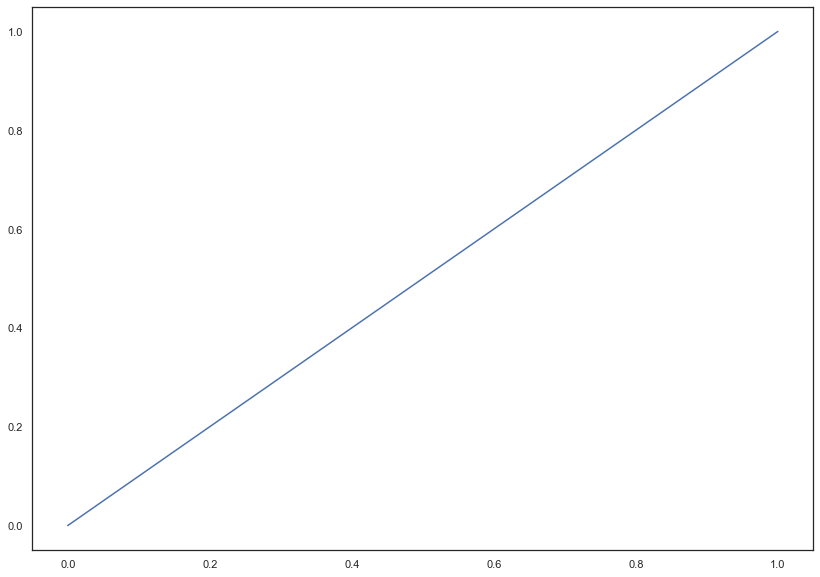

In [300]:


conf_CB = confusion_matrix(y_test, pred_CB)
print(conf_CB)

model_CB_roc = roc_auc_score(y_test,pred_CB)
print(model_CB_roc)
# check new auc score and compare it to the first model
fpr,tpr,_ = roc_curve(y_test, pred_CB)
auc=roc_auc_score(y_test,pred_CB)
plt.plot(fpr,tpr)
print(auc)

[[2545   83]
 [ 328  344]]
0.7401609045444661
0.7401609045444661


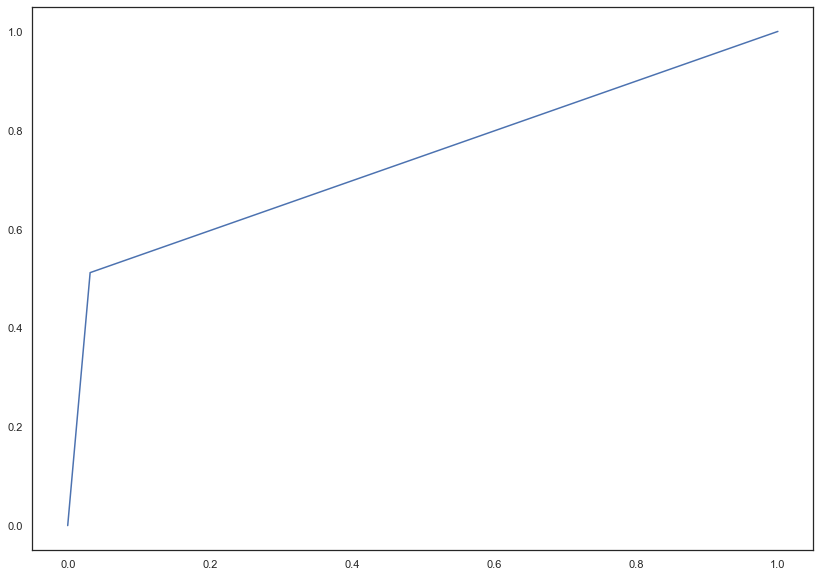

In [268]:


conf_CB = confusion_matrix(y_test, pred_CB)
print(conf_CB)

model_CB_roc = roc_auc_score(y_test,pred_CB)
print(model_CB_roc)
# check new auc score and compare it to the first model
fpr,tpr,_ = roc_curve(y_test, pred_CB)
auc=roc_auc_score(y_test,pred_CB)
plt.plot(fpr,tpr)
print(auc)

In [271]:
print(accuracy_score(y_test,pred_CB))
print(recall_score(y_test,pred_CB))
print(precision_score(y_test,pred_CB))
print(f1_score(y_test,pred_CB))
print(log_loss(y_test, pred_CB))

0.8754545454545455
0.5119047619047619
0.8056206088992974
0.6260236578707916
4.3016677166348485


In [282]:
print(accuracy_score(y_test,pred_RF))
print(recall_score(y_test,pred_RF))
print(precision_score(y_test,pred_RF))
print(f1_score(y_test,pred_RF))
print(log_loss(y_test, pred_RF))

0.8617276544691062
0.45440956651718983
0.76
0.5687558465855941
4.775780647692598


In [294]:
0.626 - 0.568

0.05800000000000005

In [56]:
# Shap to analyze factors that effect churn
# Install/import shap
!pip install shap
import shap

In [ ]:
shap_values = model8.get_feature_importance(Pool(X2_test, label=y_test,cat_features=categorical_features_indices),type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X2_test.iloc[3,:])

shap.summary_plot(shap_values, X2_test)
shap.summary_plot(shap_values, X2, plot_type="bar")

In [ ]:
# !pip install graphviz
# !pip install pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  max_depth=4,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#you will also need to download Graphviz (https://www.graphviz.org/download/)
#(and it has not worked immediatly, I have changed some parameters in Windows, but maybe Mac is ok... and restarted Jupyter Notebook after installation)